# import modules

In [1]:
%matplotlib inline
# %matplotlib widget

import numpy as np
from h5py import File as h5_file
import matplotlib.pyplot as plt
from matplotlib import ticker

import utilities
from utilities import turbo_w, plot2d

In [2]:
import matplotlib.colors as col
import matplotlib.cm as cm
def gen_cmap(N, cmap = 'hsv'):
    color_norm = col.Normalize(vmin = 0, vmax = N-1)
    scalar_map = cm.ScalarMappable(norm = color_norm, cmap = cmap)
    def map_index_to_rgb(index):
        return scalar_map.to_rgba(index)
    return map_index_to_rgb

In [3]:
from matplotlib import rcParams

rcParams['font.size'] = 7
rcParams['lines.linewidth'] = 0.5
rcParams['lines.markersize'] = 3
rcParams['axes.labelsize'] = 7
rcParams['axes.labelpad'] = 1
rcParams['axes.linewidth']= 0.7
rcParams['ytick.minor.width']= 0.5
rcParams['figure.titlesize']= 9
rcParams['legend.fontsize']= 7
rcParams['legend.frameon']= False
rcParams['legend.handletextpad']= 0.2
rcParams['legend.markerscale']= 1.2
rcParams['xtick.labelsize']= 6
rcParams['ytick.labelsize']= 6
rcParams['xtick.major.size']= 3
rcParams['ytick.major.size']= 3
rcParams['xtick.major.pad']= 3
rcParams['ytick.major.pad']= 3
rcParams['xtick.major.width']= 0.7
rcParams['ytick.major.width']= 0.7
rcParams['xtick.minor.size']= 1.7
rcParams['ytick.minor.size']= 1.7
rcParams['xtick.minor.pad']= 2.8
rcParams['ytick.minor.pad']= 2.8
rcParams['xtick.minor.width']= 0.6
rcParams['ytick.minor.width']= 0.6

rcParams['xtick.direction']='in'
rcParams['ytick.direction']='in'
rcParams['xtick.top']=True
rcParams['ytick.right']=True

In [4]:
color_B1 = 'C0'
color_D1 = 'C1'
color_D2 = 'C2'
color_B2 = 'C3'
color_B3 = 'C4'
color_background = 'grey'
marker_B1 = '<'
marker_D1 = 'o'
marker_D2 = 's'
marker_B2 = '>'
marker_B3 = '^'

In [5]:
mm = 1/25.4  # centimeters in inches
dpi = 300


elinewidth = 0.25
capsize = 1
capthick = 0.25

scale_RIXS = 1/15 # for calculated RIXS intensity

# Figure 1, energy map

In [6]:
Emap_data_LH = h5_file('data/RIXS_data/Edep_LH_2dSpectra_cofit.hdf', 'r')
Emap_data_LV = h5_file('data/RIXS_data/Edep_LV_2dSpectra_cofit.hdf', 'r')

In [7]:
Emap_fit_result= h5_file('data/RIXS_fits/Edep_cofits_result.hdf', 'r')

Text(-0.25, -0.31, '(c)')

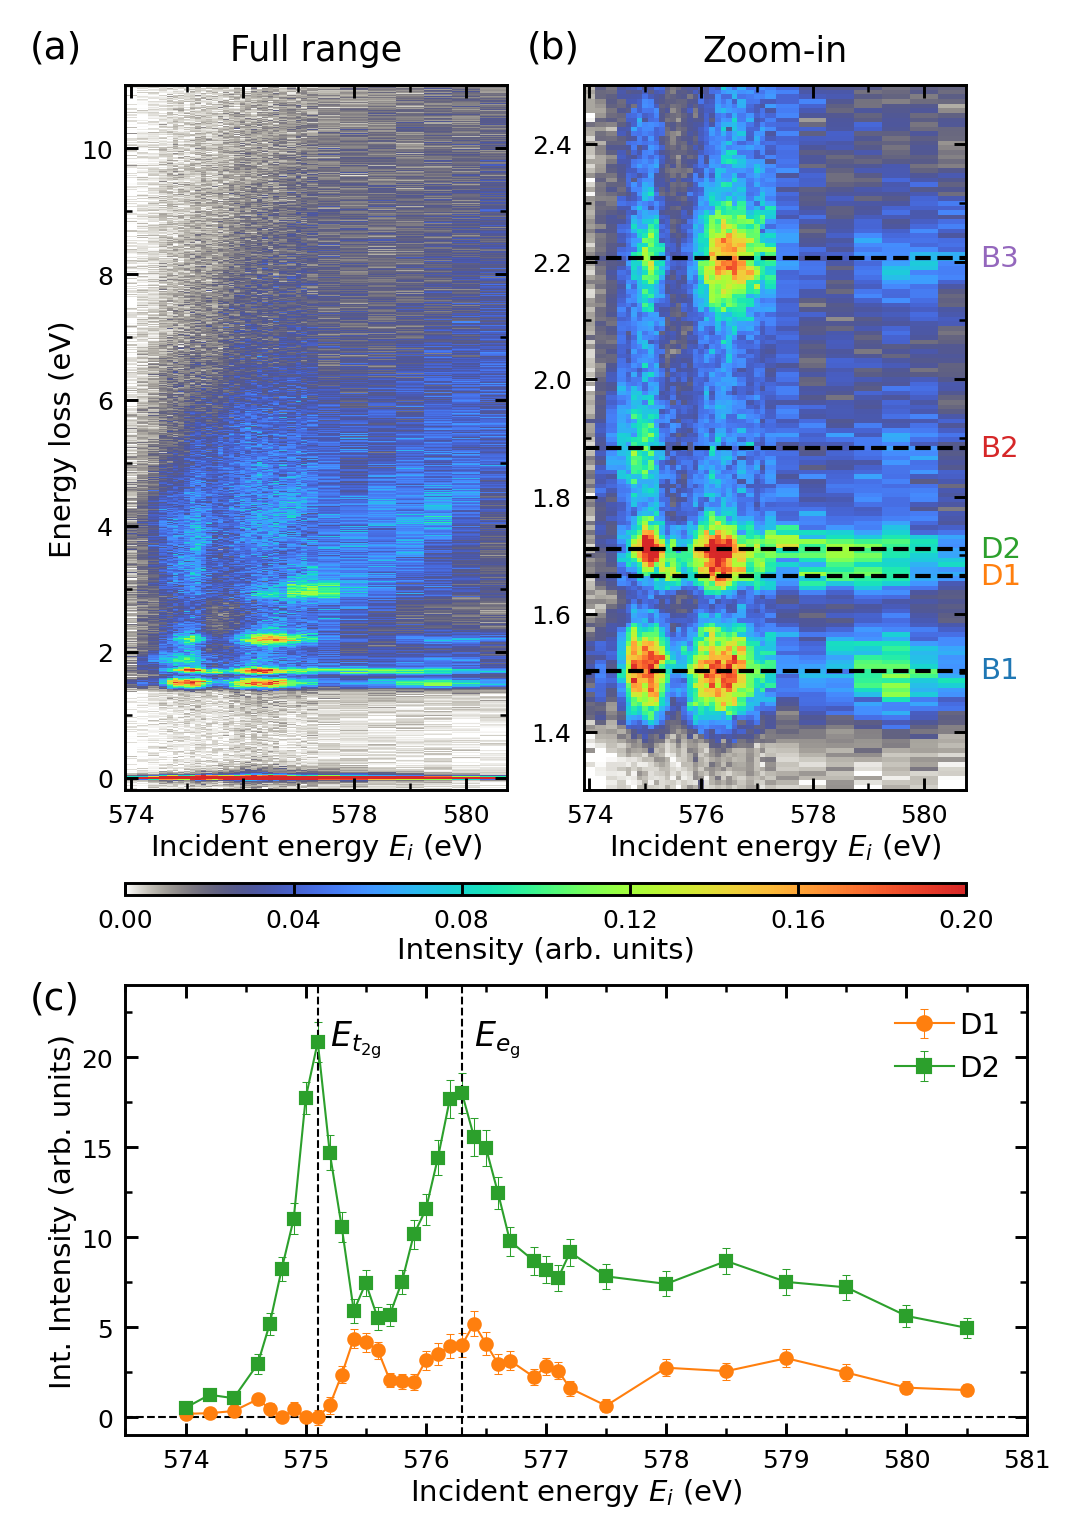

In [8]:
fig = plt.figure(dpi=dpi, figsize=(3.375, 5))
gs1 = fig.add_gridspec(nrows=1, ncols=2, wspace=0.2, top=0.95, left=0.1, right=0.93, bottom=0.48, width_ratios=[1, 1,],)
gs2 = fig.add_gridspec(nrows=1, ncols=1, left=0.1, right=0.99, top=0.35, bottom=0.05)
axs = [fig.add_subplot(gs) for gs in gs1] + [fig.add_subplot(gs) for gs in gs2]
cax = fig.add_axes([0.1, 0.41, 0.93-0.1, 0.008]) # axis for colorbar

colormap=turbo_w()

ims = [0,0]
ims[0] = plot2d(ax=axs[0], x=Emap_data_LH['Ei'][:], y=Emap_data_LH['eloss'][:], Int=Emap_data_LH['intensity'][:], colormap=colormap, rasterized=True)
ims[1] = plot2d(ax=axs[1], x=Emap_data_LH['Ei'][:], y=Emap_data_LH['eloss'][:], Int=Emap_data_LH['intensity'][:], colormap=colormap, rasterized=True)

ls='--'
markersize = 2.5
centers = [1.50379296, 1.66448942, 1.71124406, 1.88267224, 2.20645585]
labels = ['B1', 'D1', 'D2', 'B2', 'B3']
colors = ['C0', 'C1', 'C2', 'C3', 'C4', ]
for i, center in enumerate(centers):
    axs[1].axhline(y=center, ls=ls, color='k', lw=1)
    axs[1].text(x=581, y=center, s=labels[i], va='center', color=colors[i])
    
    
x = Emap_fit_result['LH']['D1_amplitude']['x'][:]
y = Emap_fit_result['LH']['D1_amplitude']['y'][:]
y_low = Emap_fit_result['LH']['D1_amplitude']['y_low'][:]
y_high = Emap_fit_result['LH']['D1_amplitude']['y_high'][:]
axs[2].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='D1', marker=marker_D1, color=color_D1, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
x = Emap_fit_result['LH']['D2_amplitude']['x'][:]
y = Emap_fit_result['LH']['D2_amplitude']['y'][:]
y_low = Emap_fit_result['LH']['D2_amplitude']['y_low'][:]
y_high = Emap_fit_result['LH']['D2_amplitude']['y_high'][:]
axs[2].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='D2', marker=marker_D2, color=color_D2, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
    
    
Eis = [575.1, 576.3]
labels = [r'$E_{t_{\rm 2g}}$', r'$E_{e_{\rm g}}$']
for i, Ei in enumerate(Eis):
    axs[2].axvline(x=Ei, ls='--', color='k')
    axs[2].text(x=Ei+0.1, y=21, s=labels[i], va='center', ha='left', fontsize=8)
    
axs[2].axhline(y=0, color='k', ls='--')    

# axis range and ticks
for ax in axs:
    ax.set_xlim(573.9, 580.75)
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

axs[0].set_ylim(-0.2,11)
axs[1].set_ylim(1.3,2.5)
axs[2].set_xlim(573.5, 581)
axs[2].set_ylim(-1, 24)

# axis label
for ax in axs:
    ax.set_xlabel('Incident energy $E_i$ (eV)')
axs[0].set_ylabel('Energy loss (eV)')
axs[2].set_ylabel('Int. Intensity (arb. units)')

# legend
axs[2].legend()

# title
axs[0].set_title(r'Full range',)
axs[1].set_title(r'Zoom-in',)


# colorbar
for im in ims[0:2]:
    im.set_clim(0, 0.2)
cbar = plt.colorbar(ims[0], cax=cax, orientation='horizontal')
cbar.set_ticks(np.arange(0, 0.21, 0.04))
cbar.set_label('Intensity (arb. units)')


# label
x = -0.25
y = 1.04
axs[0].text(x=x, y=y, s='(a)', fontdict=dict(fontsize=9), transform=axs[0].transAxes, color='k')
x = -0.15
axs[1].text(x=x, y=y, s='(b)', fontdict=dict(fontsize=9), transform=axs[1].transAxes, color='k')
x = -0.25
y = -0.31
axs[2].text(x=x, y=y, s='(c)', fontdict=dict(fontsize=9), transform=axs[0].transAxes, color='k')


# fig.savefig('energy_map.pdf', dpi=dpi)

# Figure 2, dispersion

In [9]:
thdep_2D_data = h5_file('data/RIXS_data/thdep_2dSpectra.hdf', 'r')
spectra_thdep_data = h5_file('data/RIXS_data/thdep_1dSpectra.hdf', 'r')
spectra_thdep_fits = h5_file('data/RIXS_fits/thdep_fits.hdf', 'r')
thdep_fit_result = h5_file('data/RIXS_fits/thdep_cofits_result.hdf', 'r')

Text(3.2, 0.38, '(e)')

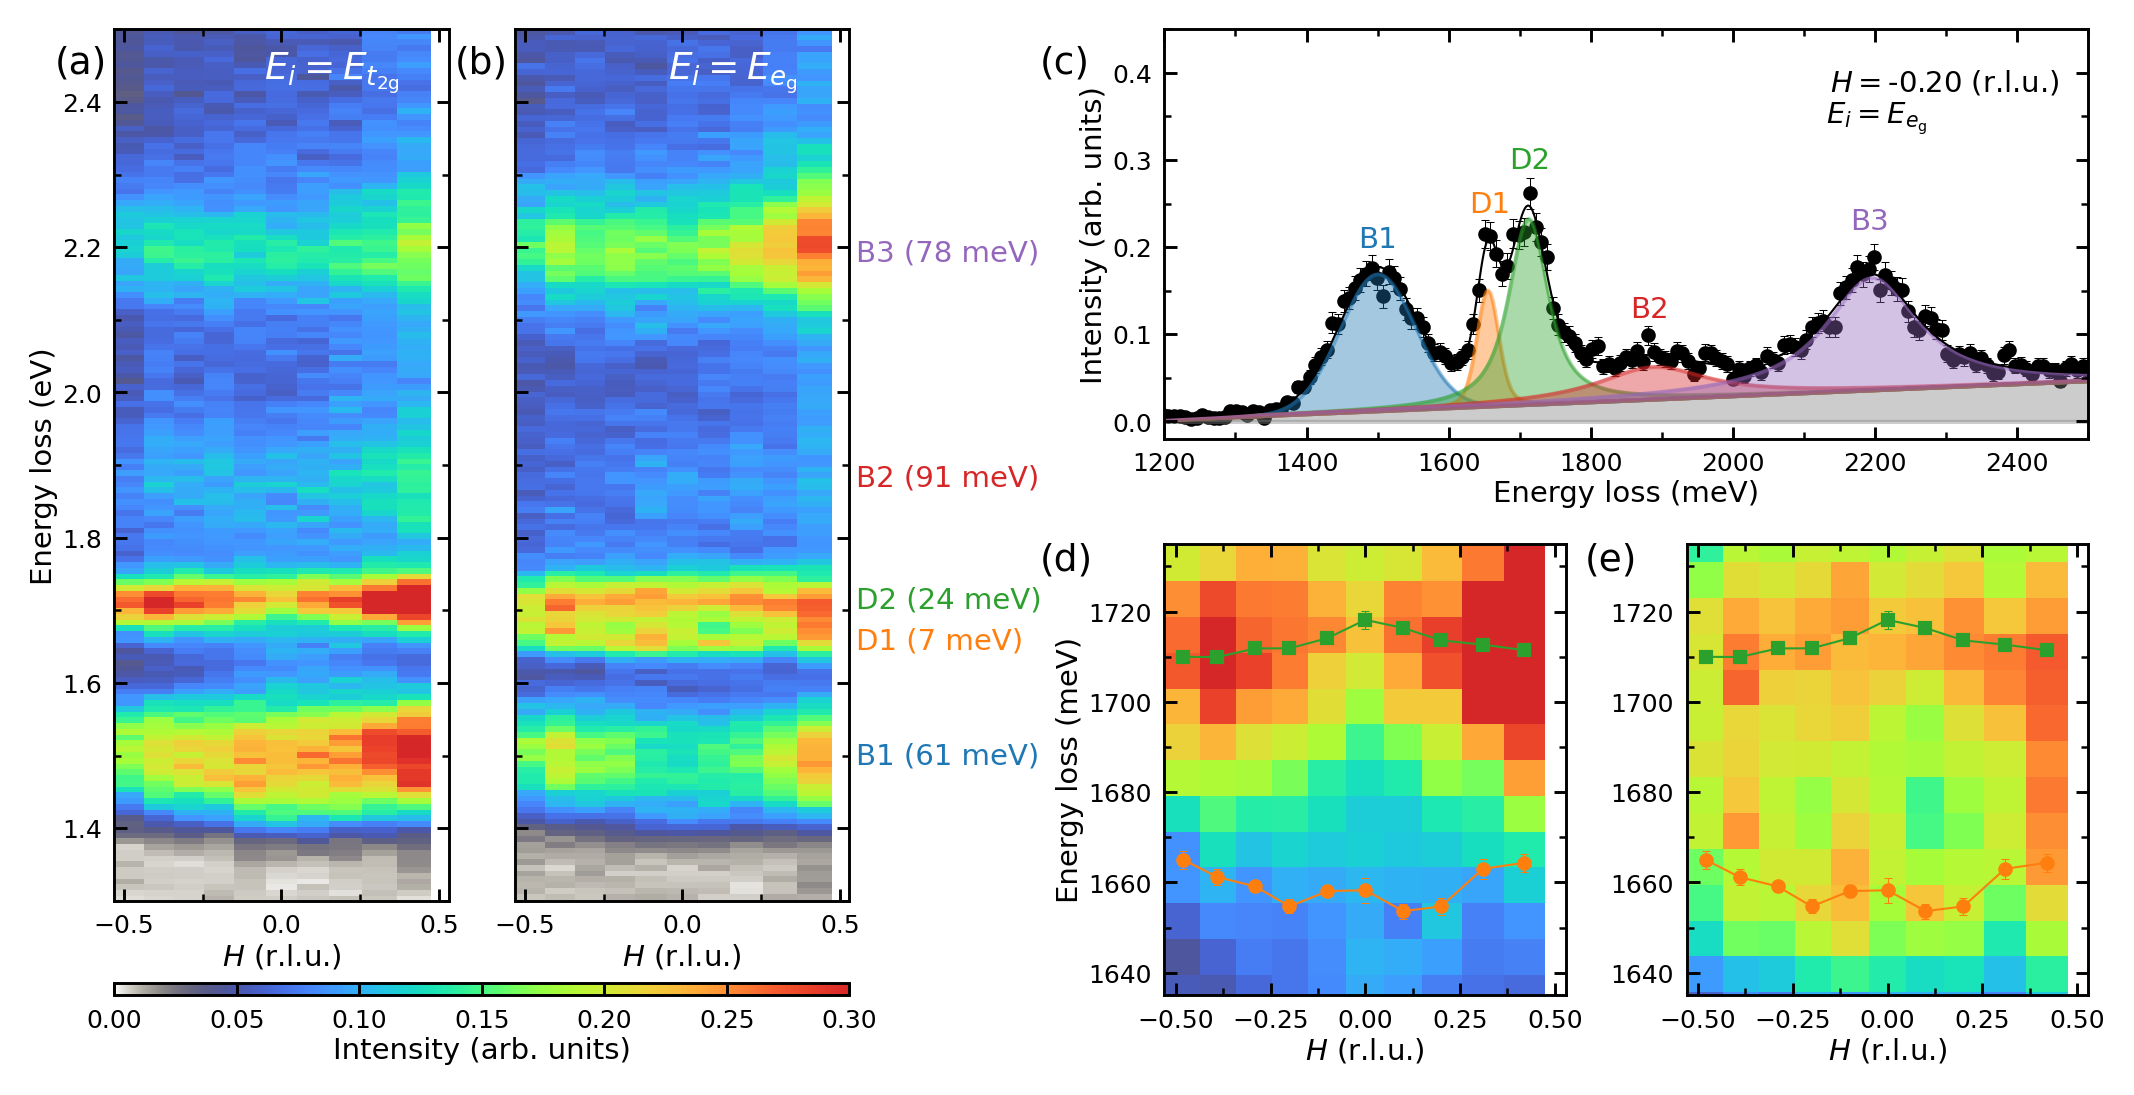

In [10]:
fig = plt.figure(dpi=dpi, figsize=(7, 3.5))
gs1 = fig.add_gridspec(nrows=1, ncols=2, wspace=0.2, top=0.99, left=0.05, right=0.4, bottom=0.16, width_ratios=[1, 1,],)
gs2 = fig.add_gridspec(nrows=1, ncols=1, left=0.55, right=0.99, top=0.99, bottom=0.6)
gs3 = fig.add_gridspec(nrows=1, ncols=2, wspace=0.3, left=0.55, right=0.99, top=0.5, bottom=0.07, width_ratios=[1, 1,],)
axs = [fig.add_subplot(gs) for gs in gs1] + [fig.add_subplot(gs) for gs in gs2] + [fig.add_subplot(gs) for gs in gs3]
cax = fig.add_axes([0.05, 0.07, 0.4-0.05, 0.012]) # axis for colorbar

colormap=turbo_w()

ims = [0,0,0,0]
ims[0] = plot2d(ax=axs[0], x=thdep_2D_data['H'][:], y=thdep_2D_data['E0']['eloss'][:], Int=thdep_2D_data['E0']['intensity'][:], colormap=colormap, rasterized=True)
ims[1] = plot2d(ax=axs[1], x=thdep_2D_data['H'][:], y=thdep_2D_data['E1']['eloss'][:], Int=thdep_2D_data['E1']['intensity'][:], colormap=colormap, rasterized=True)
ims[2] = plot2d(ax=axs[3], x=thdep_2D_data['H'][:], y=thdep_2D_data['E0']['eloss'][:]*1e3, Int=thdep_2D_data['E0']['intensity'][:], colormap=colormap, rasterized=True)
ims[3] = plot2d(ax=axs[4], x=thdep_2D_data['H'][:], y=thdep_2D_data['E1']['eloss'][:]*1e3, Int=thdep_2D_data['E1']['intensity'][:], colormap=colormap, rasterized=True)

centers = [1.5, 1.658, 1.714, 1.883, 2.192]
labels = ['B1', 'D1', 'D2', 'B2', 'B3']
HWHMs = [np.mean(np.sqrt(thdep_fit_result['fwhm']['B1']['y'][:]**2-30.5**2)/2),
         np.mean(thdep_fit_result['gamma']['D1']['y'][:]),
         np.mean(thdep_fit_result['gamma']['D2']['y'][:]),
         np.mean(thdep_fit_result['gamma']['B2']['y'][:]),
         np.mean(thdep_fit_result['gamma']['B3']['y'][:]),
        ]
colors = ['C0', 'C1', 'C2', 'C3', 'C4', ]
ys = [0.2, 0.24, 0.29, 0.12, 0.22]
for i, center in enumerate(centers):
    axs[1].text(x=0.55, y=center, s=labels[i]+' ({:.0f} meV)'.format(HWHMs[i]), va='center', color=colors[i])
    axs[2].text(x=center*1e3, y=ys[i], s=labels[i], ha='center', color=colors[i])



alpha = 0.4
select = 3
markersize = 2.5
H = spectra_thdep_data['H'][select]

x = spectra_thdep_data['E1']['spectra_H_{:.2f}_2pt_per_pixel'.format(H)]['eloss'][:]
y = spectra_thdep_data['E1']['spectra_H_{:.2f}_2pt_per_pixel'.format(H)]['intensity'][:]
yerr = spectra_thdep_data['E1']['spectra_H_{:.2f}_2pt_per_pixel'.format(H)]['error'][:]
    
axs[2].errorbar(x, y, yerr=yerr,marker='o', fillstyle='full', color='k', ls='',markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=1,zorder=0)

x = spectra_thdep_fits['E1']['fits_H_{:.2f}'.format(H)]['exciton']['x'][:]
y = spectra_thdep_fits['E1']['fits_H_{:.2f}'.format(H)]['exciton']['y'][:]
axs[2].plot(x, y,'-',color='k',zorder=2)

background = spectra_thdep_fits['E1']['fits_H_{:.2f}'.format(H)]['exciton']['bckg'][:]
axs[2].plot(x, background,'-',zorder=1, alpha=alpha, color=color_background,)
axs[2].fill_between(x, background, y2=0, alpha=alpha, color=color_background,)
y = spectra_thdep_fits['E1']['fits_H_{:.2f}'.format(H)]['exciton']['peak0'][:]
axs[2].plot(x, y+background,'-',color=color_B1,zorder=1, alpha=alpha)
axs[2].fill_between(x, y+background, y2=background, color=color_B1, alpha=alpha)
y = spectra_thdep_fits['E1']['fits_H_{:.2f}'.format(H)]['exciton']['peak1'][:]
axs[2].plot(x, y+background,'-',color=color_D1,zorder=1, alpha=alpha)
axs[2].fill_between(x, y+background, y2=background, color=color_D1, alpha=alpha)
y = spectra_thdep_fits['E1']['fits_H_{:.2f}'.format(H)]['exciton']['peak2'][:]
axs[2].plot(x, y+background,'-',color=color_D2,zorder=1, alpha=alpha)
axs[2].fill_between(x, y+background, y2=background, color=color_D2, alpha=alpha)
y = spectra_thdep_fits['E1']['fits_H_{:.2f}'.format(H)]['exciton']['peak3'][:]
axs[2].plot(x, y+background,'-',color=color_B2,zorder=1, alpha=alpha)
axs[2].fill_between(x, y+background, y2=background, color=color_B2, alpha=alpha)
y = spectra_thdep_fits['E1']['fits_H_{:.2f}'.format(H)]['exciton']['peak4'][:]
axs[2].plot(x, y+background,'-',color=color_B3,zorder=1, alpha=alpha)
axs[2].fill_between(x, y+background, y2=background, color=color_B3, alpha=alpha)

axs[2].text(x=0.72, y=0.85, s='$H=${:.2f} (r.l.u.)'.format(H), transform=axs[2].transAxes, color='k')
axs[2].text(x=0.716, y=0.77, s=r'$E_i=E_{e_{\rm g}}$', transform=axs[2].transAxes, color='k')


x = thdep_fit_result['center']['D1']['x'][:]
y = thdep_fit_result['center']['D1']['y'][:]
y_low = thdep_fit_result['center']['D1']['y_low'][:]
y_high = thdep_fit_result['center']['D1']['y_high'][:]
axs[3].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='D1', marker=marker_D1, color=color_D1, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
axs[4].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='D1', marker=marker_D1, color=color_D1, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
x = thdep_fit_result['center']['D2']['x'][:]
y = thdep_fit_result['center']['D2']['y'][:]
y_low = thdep_fit_result['center']['D2']['y_low'][:]
y_high = thdep_fit_result['center']['D2']['y_high'][:]
axs[3].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='D2', marker=marker_D2, color=color_D2, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
axs[4].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='D2', marker=marker_D2, color=color_D2, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)



# axis range and ticks
for ax in axs[0:2]:
    ax.set_xlim(-0.53, 0.53)
    ax.set_ylim(1.3,2.5)
axs[2].set_xlim(1200,2500)
axs[2].set_ylim(-0.02,0.45)
for ax in axs:
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
axs[1].set_yticklabels([])

for ax in axs[3:5]:
    ax.set_xlim(-0.53, 0.53)
axs[3].set_ylim(1635, 1735)
axs[4].set_ylim(1635, 1735)


# axis label
axs[0].set_ylabel('Energy loss (eV)')
axs[0].set_xlabel('$H$ (r.l.u.)')
axs[1].set_xlabel('$H$ (r.l.u.)')

axs[2].set_xlabel('Energy loss (meV)')
axs[2].set_ylabel('Intensity (arb. units)')

axs[3].set_ylabel('Energy loss (meV)')
axs[3].set_xlabel('$H$ (r.l.u.)')
axs[4].set_xlabel('$H$ (r.l.u.)')



# title
titles = [r'$E_i = E_{t_{\rm 2g}}$', r'$E_i = E_{e_{\rm g}}$']
for i, title in enumerate(titles):
    axs[i].text(x=0.65, y=0.95, s=title, va='center', ha='center', fontsize=9, transform=axs[i].transAxes, color='white')


# colorbar
for im in ims[0:2]:
    im.set_clim(0, 0.3)
cbar = plt.colorbar(ims[0], cax=cax, orientation='horizontal')
cbar.set_ticks(np.arange(0, 0.31, 0.05))
cbar.set_label('Intensity (arb. units)')

for im in ims[2:4]:
    im.set_clim(0, 0.3)

# label
x = -0.18
y = 0.95
axs[0].text(x=x, y=y, s='(a)', fontdict=dict(fontsize=9), transform=axs[0].transAxes, color='k')
axs[1].text(x=x, y=y, s='(b)', fontdict=dict(fontsize=9), transform=axs[1].transAxes, color='k')
x = 1.57
axs[2].text(x=x, y=y, s='(c)', fontdict=dict(fontsize=9), transform=axs[1].transAxes, color='k')
x = 1.57
y = 0.38
axs[3].text(x=x, y=y, s='(d)', fontdict=dict(fontsize=9), transform=axs[1].transAxes, color='k')
x = 3.2
y = 0.38
axs[4].text(x=x, y=y, s='(e)', fontdict=dict(fontsize=9), transform=axs[1].transAxes, color='k')

# fig.savefig('dispersion.pdf', dpi=dpi)

# Figure 3, T-dep

In [11]:
Tdep1_2D_data = h5_file('data/RIXS_data/Tdep1_2dSpectra.hdf', 'r')
Tdep2_2D_data = h5_file('data/RIXS_data/Tdep2_2dSpectra.hdf', 'r')
Tdep1_fit_result = h5_file('data/RIXS_fits/Tdep1_cofits_result.hdf', 'r')
Tdep2_fit_result = h5_file('data/RIXS_fits/Tdep2_cofits_result.hdf', 'r')

Text(-0.07, 0.92, '(f)')

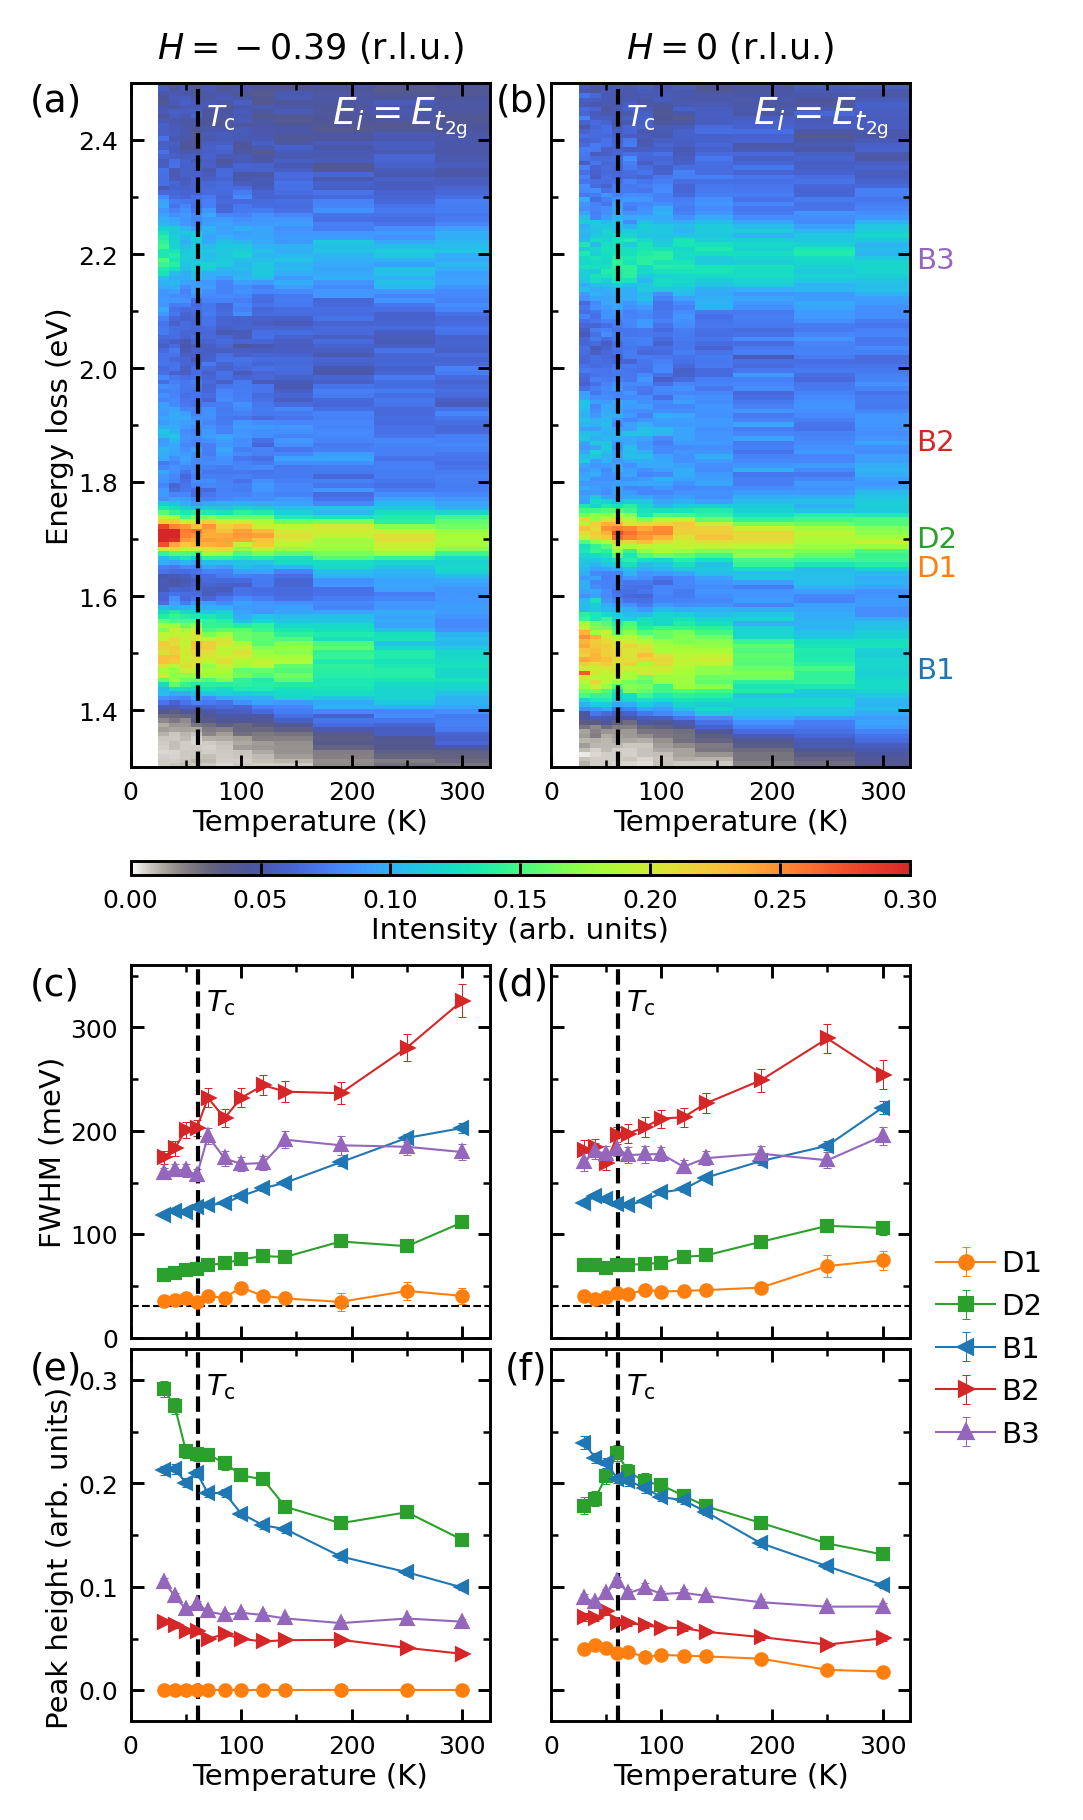

In [12]:
fig = plt.figure(dpi=dpi, figsize=(3.375, 6))
gs1 = fig.add_gridspec(nrows=1, ncols=2, wspace=0.17, top=0.95, left=0.1, right=0.87, bottom=0.57, width_ratios=[1, 1,],)
gs2 = fig.add_gridspec(nrows=2, ncols=2, wspace=0.17, top=0.46, left=0.1, right=0.87, bottom=0.04, width_ratios=[1, 1,], hspace=0.03)
axs = [fig.add_subplot(gs) for gs in gs1] + [fig.add_subplot(gs) for gs in gs2]
cax = fig.add_axes([0.1, 0.51, 0.87-0.1, 0.008]) # axis for colorbar

colormap=turbo_w()

ims = [0,0]
ims[0] = plot2d(ax=axs[0], x=Tdep1_2D_data['T'][:], y=Tdep1_2D_data['E0']['eloss'][:], Int=Tdep1_2D_data['E0']['intensity'][:], colormap=colormap, rasterized=True)
ims[1] = plot2d(ax=axs[1], x=Tdep2_2D_data['T'][:], y=Tdep2_2D_data['E0']['eloss'][:], Int=Tdep2_2D_data['E0']['intensity'][:], colormap=colormap, rasterized=True)

ls='--'
centers = [1.47, 1.65, 1.7, 1.87, 2.19]
labels = ['B1', 'D1', 'D2', 'B2', 'B3']
colors = ['C0', 'C1', 'C2', 'C3', 'C4', ]
for i, center in enumerate(centers):
    axs[1].text(x=330, y=center, s=labels[i], va='center', color=colors[i])
    

markersize = 2.5

x = Tdep1_fit_result['fwhm']['D1']['x'][:]
y = Tdep1_fit_result['fwhm']['D1']['y'][:]
y_low = Tdep1_fit_result['fwhm']['D1']['y_low'][:]
y_high = Tdep1_fit_result['fwhm']['D1']['y_high'][:]
axs[2].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='D1', marker=marker_D1, color=color_D1, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
x = Tdep1_fit_result['fwhm']['D2']['x'][:]
y = Tdep1_fit_result['fwhm']['D2']['y'][:]
y_low = Tdep1_fit_result['fwhm']['D2']['y_low'][:]
y_high = Tdep1_fit_result['fwhm']['D2']['y_high'][:]
axs[2].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='D2', marker=marker_D2, color=color_D2, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
x = Tdep1_fit_result['fwhm']['B1']['x'][:]
y = Tdep1_fit_result['fwhm']['B1']['y'][:]
y_low = Tdep1_fit_result['fwhm']['B1']['y_low'][:]
y_high = Tdep1_fit_result['fwhm']['B1']['y_high'][:]
axs[2].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='B1', marker=marker_B1, color=color_B1, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
x = Tdep1_fit_result['fwhm']['B2']['x'][:]
y = Tdep1_fit_result['fwhm']['B2']['y'][:]
y_low = Tdep1_fit_result['fwhm']['B2']['y_low'][:]
y_high = Tdep1_fit_result['fwhm']['B2']['y_high'][:]
axs[2].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='B2', marker=marker_B2, color=color_B2, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
x = Tdep1_fit_result['fwhm']['B3']['x'][:]
y = Tdep1_fit_result['fwhm']['B3']['y'][:]
y_low = Tdep1_fit_result['fwhm']['B3']['y_low'][:]
y_high = Tdep1_fit_result['fwhm']['B3']['y_high'][:]
axs[2].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='B3', marker=marker_B3, color=color_B3, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)


x = Tdep2_fit_result['fwhm']['D1']['x'][:]
y = Tdep2_fit_result['fwhm']['D1']['y'][:]
y_low = Tdep2_fit_result['fwhm']['D1']['y_low'][:]
y_high = Tdep2_fit_result['fwhm']['D1']['y_high'][:]
axs[3].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='D1', marker=marker_D1, color=color_D1, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
x = Tdep2_fit_result['fwhm']['D2']['x'][:]
y = Tdep2_fit_result['fwhm']['D2']['y'][:]
y_low = Tdep2_fit_result['fwhm']['D2']['y_low'][:]
y_high = Tdep2_fit_result['fwhm']['D2']['y_high'][:]
axs[3].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='D2', marker=marker_D2, color=color_D2, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
x = Tdep2_fit_result['fwhm']['B1']['x'][:]
y = Tdep2_fit_result['fwhm']['B1']['y'][:]
y_low = Tdep2_fit_result['fwhm']['B1']['y_low'][:]
y_high = Tdep2_fit_result['fwhm']['B1']['y_high'][:]
axs[3].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='B1', marker=marker_B1, color=color_B1, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
x = Tdep2_fit_result['fwhm']['B2']['x'][:]
y = Tdep2_fit_result['fwhm']['B2']['y'][:]
y_low = Tdep2_fit_result['fwhm']['B2']['y_low'][:]
y_high = Tdep2_fit_result['fwhm']['B2']['y_high'][:]
axs[3].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='B2', marker=marker_B2, color=color_B2, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
x = Tdep2_fit_result['fwhm']['B3']['x'][:]
y = Tdep2_fit_result['fwhm']['B3']['y'][:]
y_low = Tdep2_fit_result['fwhm']['B3']['y_low'][:]
y_high = Tdep2_fit_result['fwhm']['B3']['y_high'][:]
axs[3].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='B3', marker=marker_B3, color=color_B3, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)


x = Tdep1_fit_result['height_E0']['D1']['x'][:]
y = Tdep1_fit_result['height_E0']['D1']['y'][:]
y_low = Tdep1_fit_result['height_E0']['D1']['y_low'][:]
y_high = Tdep1_fit_result['height_E0']['D1']['y_high'][:]
axs[4].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='D1', marker=marker_D1, color=color_D1, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
x = Tdep1_fit_result['height_E0']['D2']['x'][:]
y = Tdep1_fit_result['height_E0']['D2']['y'][:]
y_low = Tdep1_fit_result['height_E0']['D2']['y_low'][:]
y_high = Tdep1_fit_result['height_E0']['D2']['y_high'][:]
axs[4].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='D2', marker=marker_D2, color=color_D2, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
x = Tdep1_fit_result['height_E0']['B1']['x'][:]
y = Tdep1_fit_result['height_E0']['B1']['y'][:]
y_low = Tdep1_fit_result['height_E0']['B1']['y_low'][:]
y_high = Tdep1_fit_result['height_E0']['B1']['y_high'][:]
axs[4].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='B1', marker=marker_B1, color=color_B1, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
x = Tdep1_fit_result['height_E0']['B2']['x'][:]
y = Tdep1_fit_result['height_E0']['B2']['y'][:]
y_low = Tdep1_fit_result['height_E0']['B2']['y_low'][:]
y_high = Tdep1_fit_result['height_E0']['B2']['y_high'][:]
axs[4].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='B2', marker=marker_B2, color=color_B2, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
x = Tdep1_fit_result['height_E0']['B3']['x'][:]
y = Tdep1_fit_result['height_E0']['B3']['y'][:]
y_low = Tdep1_fit_result['height_E0']['B3']['y_low'][:]
y_high = Tdep1_fit_result['height_E0']['B3']['y_high'][:]
axs[4].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='B3', marker=marker_B3, color=color_B3, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)


x = Tdep2_fit_result['height_E0']['D1']['x'][:]
y = Tdep2_fit_result['height_E0']['D1']['y'][:]
y_low = Tdep2_fit_result['height_E0']['D1']['y_low'][:]
y_high = Tdep2_fit_result['height_E0']['D1']['y_high'][:]
axs[5].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='D1', marker=marker_D1, color=color_D1, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
x = Tdep2_fit_result['height_E0']['D2']['x'][:]
y = Tdep2_fit_result['height_E0']['D2']['y'][:]
y_low = Tdep2_fit_result['height_E0']['D2']['y_low'][:]
y_high = Tdep2_fit_result['height_E0']['D2']['y_high'][:]
axs[5].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='D2', marker=marker_D2, color=color_D2, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
x = Tdep2_fit_result['height_E0']['B1']['x'][:]
y = Tdep2_fit_result['height_E0']['B1']['y'][:]
y_low = Tdep2_fit_result['height_E0']['B1']['y_low'][:]
y_high = Tdep2_fit_result['height_E0']['B1']['y_high'][:]
axs[5].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='B1', marker=marker_B1, color=color_B1, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
x = Tdep2_fit_result['height_E0']['B2']['x'][:]
y = Tdep2_fit_result['height_E0']['B2']['y'][:]
y_low = Tdep2_fit_result['height_E0']['B2']['y_low'][:]
y_high = Tdep2_fit_result['height_E0']['B2']['y_high'][:]
axs[5].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='B2', marker=marker_B2, color=color_B2, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
x = Tdep2_fit_result['height_E0']['B3']['x'][:]
y = Tdep2_fit_result['height_E0']['B3']['y'][:]
y_low = Tdep2_fit_result['height_E0']['B3']['y_low'][:]
y_high = Tdep2_fit_result['height_E0']['B3']['y_high'][:]
axs[5].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='B3', marker=marker_B3, color=color_B3, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)



# axis range and ticks
for ax in axs:
    ax.set_xlim(0,325)
    ax.axvline(x=61, lw=1, ls='--', color='k')
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    
for ax in axs[0:2]:
    ax.set_ylim(1.3,2.5)
    
for ax in axs[2:4]:
    ax.set_ylim(0,360)
    ax.axhline(y=30.5, color='k', ls='--')
    
for ax in axs[4:6]:
    ax.set_ylim(-0.03,0.33)

for ax in axs[1::2]:
    ax.set_yticklabels([])
    
for ax in axs[2:4]:
    ax.set_xticklabels([])

# legend
axs[5].legend(loc='center left', bbox_to_anchor=(1, 1))

# axis label
axs[0].set_xlabel('Temperature (K)')
axs[1].set_xlabel('Temperature (K)')
axs[4].set_xlabel('Temperature (K)')
axs[5].set_xlabel('Temperature (K)')
axs[0].set_ylabel('Energy loss (eV)')
axs[2].set_ylabel('FWHM (meV)')
axs[4].set_ylabel('Peak height (arb. units)', y=0.44)


# title
axs[0].set_title('$H=-0.39$ (r.l.u.)',)
axs[1].set_title('$H=0$ (r.l.u.)',)

for ax in axs[0:2]:
    ax.text(x=0.75, y=0.95, s=r'$E_i = E_{t_{\rm 2g}}$', va='center', ha='center', fontsize=9, transform=ax.transAxes, color='white')
for ax in axs[0:2]:
    ax.text(x=0.25, y=0.95, s=r'$T_{\rm c}$', va='center', ha='center', transform=ax.transAxes, color='white')
for ax in axs[2:]:
    ax.text(x=0.25, y=0.9, s=r'$T_{\rm c}$', va='center', ha='center', transform=ax.transAxes, color='k')


# colorbar
for im in ims[0:2]:
    im.set_clim(0, 0.3)
cbar = plt.colorbar(ims[0], cax=cax, orientation='horizontal')
cbar.set_ticks(np.arange(0, 0.31, 0.05))
cbar.set_label('Intensity (arb. units)')


# label
x = -0.28
y = 0.96
axs[0].text(x=x, y=y, s='(a)', fontdict=dict(fontsize=9), transform=axs[0].transAxes, color='k')
x = -0.08
axs[1].text(x=x, y=y, s='(b)', fontdict=dict(fontsize=9), transform=axs[1].transAxes, color='k', ha='center')
x = -0.28
y = 0.92
axs[2].text(x=x, y=y, s='(c)', fontdict=dict(fontsize=9), transform=axs[2].transAxes, color='k')
x = -0.08
axs[3].text(x=x, y=y, s='(d)', fontdict=dict(fontsize=9), transform=axs[3].transAxes, color='k', ha='center')
x = -0.28
y = 0.92
axs[4].text(x=x, y=y, s='(e)', fontdict=dict(fontsize=9), transform=axs[4].transAxes, color='k')
x = -0.07
axs[5].text(x=x, y=y, s='(f)', fontdict=dict(fontsize=9), transform=axs[5].transAxes, color='k', ha='center')

# fig.savefig('Tdep.pdf', dpi=dpi)

# Figure 4, AIM

In [13]:
AIM_Emap = h5_file('data/edrixs/AIM_RIXS_Edep_LH.hdf', 'r')
AIM_rixs_analysis = h5_file('data/edrixs/AIM_RIXS_analysis.hdf', 'r')

Text(2.4, 0.23, '(e)')

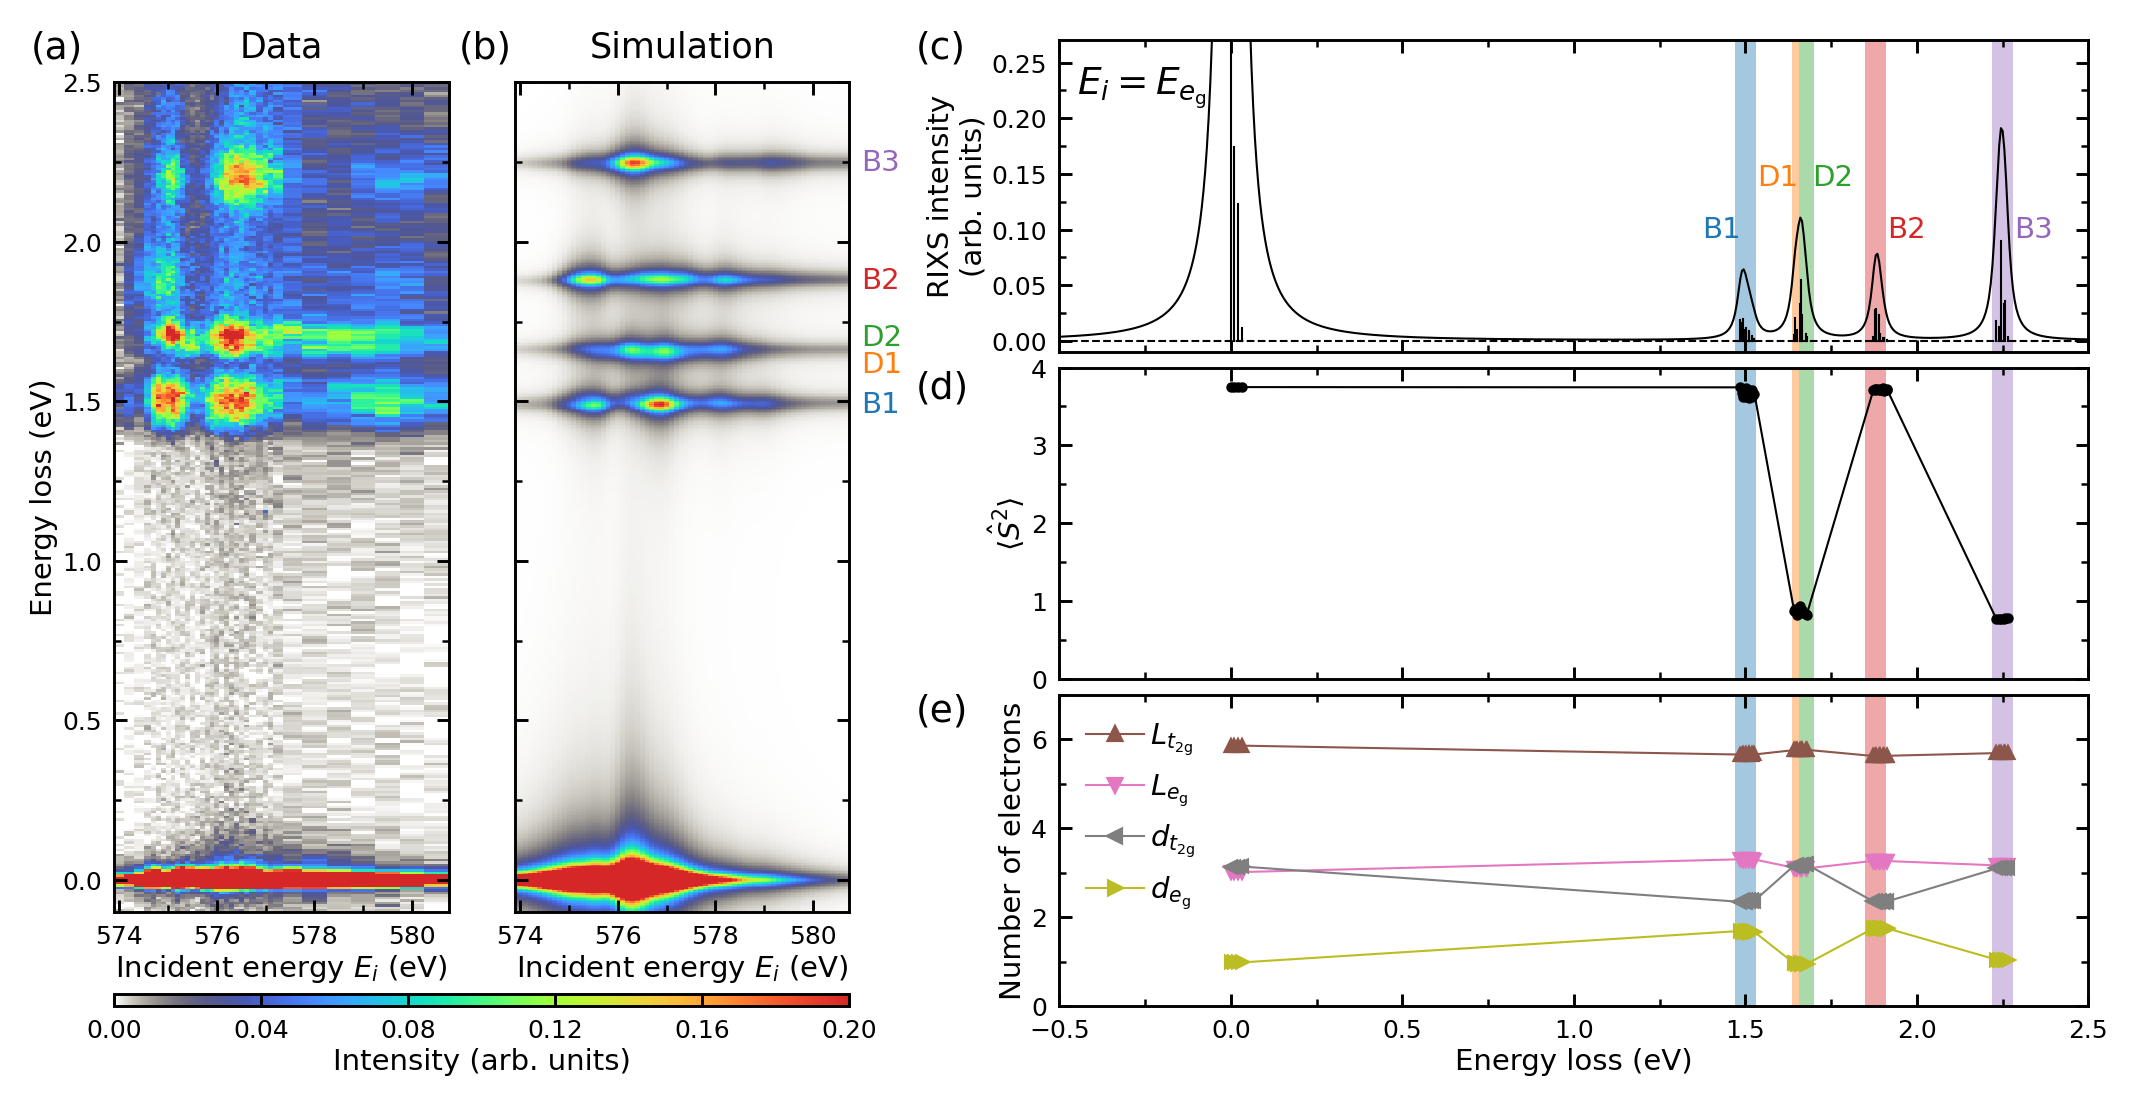

In [14]:
fig = plt.figure(dpi=dpi, figsize=(7, 3.5))
gs1 = fig.add_gridspec(nrows=1, ncols=2, wspace=0.2, top=0.95, left=0.05, right=0.4, bottom=0.16, width_ratios=[1, 1,],)
gs2 = fig.add_gridspec(nrows=3, ncols=1, left=0.5, right=0.99, top=0.99, bottom=0.07, height_ratios=[1, 1, 1], hspace=0.05)
axs = [fig.add_subplot(gs) for gs in gs1] + [fig.add_subplot(gs) for gs in gs2]
cax = fig.add_axes([0.05, 0.07, 0.4-0.05, 0.012]) # axis for colorbar

colormap=turbo_w()

ims = [0,0]
ims[0] = plot2d(ax=axs[0], x=Emap_data_LH['Ei'][:], y=Emap_data_LH['eloss'][:], Int=Emap_data_LH['intensity'][:], colormap=colormap, rasterized=True)
ims[1] = plot2d(ax=axs[1], x=AIM_Emap['Ei'][:], y=AIM_Emap['eloss'][:], Int=AIM_Emap['intensity'][:]*scale_RIXS, colormap=colormap, rasterized=True)


ls='--'
labels = ['B1', 'D1', 'D2', 'B2', 'B3']
colors = ['C0', 'C1', 'C2', 'C3', 'C4', ]
ys = [0.093, 0.14, 0.14, 0.093, 0.093]
centers = [1.49, 1.615, 1.70, 1.88, 2.25]
for i, center in enumerate(centers):
    axs[1].text(x=581, y=center, s=labels[i], va='center', color=colors[i])
centers = [1.43, 1.595, 1.755, 1.97, 2.34]
for i, center in enumerate(centers):
    axs[2].text(x=center, y=ys[i], s=labels[i], ha='center', color=colors[i])


end = 44
evals = AIM_rixs_analysis['rixs_ana_results']['evals'][:end]
S2_val = AIM_rixs_analysis['rixs_ana_results']['S2_all_val'][:end]
d_eg = AIM_rixs_analysis['rixs_ana_results']['d_eg'][:end]
d_t2g = AIM_rixs_analysis['rixs_ana_results']['d_t2g'][:end]
L_eg = AIM_rixs_analysis['rixs_ana_results']['L_eg'][:end]
L_t2g = AIM_rixs_analysis['rixs_ana_results']['L_t2g'][:end]


axs[2].plot(AIM_rixs_analysis['eloss'][:], AIM_rixs_analysis['rixs'][0]*scale_RIXS, color='k')
axs[2].axhline(y=0, color='k', ls='--')

for E, h in zip(evals, AIM_rixs_analysis['rixs_poles'][0]):
    axs[2].plot([E, E], [0, h*scale_RIXS], '-', color='k', lw=0.5)

axs[3].plot(evals, S2_val, '.-', color='k')


markersize = 2.5
axs[4].plot(evals, L_t2g, '^-', color='C5', markersize=markersize, label=r'$L_{t_{\rm 2g}}$')
axs[4].plot(evals, L_eg, 'v-', color='C6', markersize=markersize, label=r'$L_{e_{\rm g}}$')
axs[4].plot(evals, d_t2g, '<-', color='C7', markersize=markersize, label=r'$d_{t_{\rm 2g}}$')
axs[4].plot(evals, d_eg, '>-', color='C8', markersize=markersize, label=r'$d_{e_{\rm g}}$')

axs[4].set_xlabel('Energy loss (eV)')
   


# axis range and ticks
for ax in axs:
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
for ax in axs[0:2]:
    ax.set_xlim(573.9, 580.75)
    ax.set_ylim(-0.1, 2.5)
axs[1].set_yticklabels([])
for ax in axs[2:4]:
    ax.set_xticklabels([])

for ax in axs[2:]:
    ax.set_xlim(-0.5, 2.5)
axs[2].set_ylim(-0.01, 0.27)
axs[3].set_ylim(0,4)
axs[4].set_ylim(0,7)

alpha = 0.4
for ax in axs[2:]:
    ax.fill_betweenx(ax.get_ylim(), x1=1.47, x2=1.53, facecolor=color_B1, edgecolor='none', alpha=alpha, )
    ax.fill_betweenx(ax.get_ylim(), x1=1.85, x2=1.91, facecolor=color_B2, edgecolor='none', alpha=alpha, )
    ax.fill_betweenx(ax.get_ylim(), x1=2.22, x2=2.28, facecolor=color_B3, edgecolor='none', alpha=alpha, )
    ax.fill_betweenx(ax.get_ylim(), x1=1.637, x2=1.655, facecolor=color_D1, edgecolor='none', alpha=alpha, )
    ax.fill_betweenx(ax.get_ylim(), x1=1.655, x2=1.7, facecolor=color_D2, edgecolor='none', alpha=alpha, )
    
    

# axis label
for ax in axs[0:2]:
    ax.set_xlabel('Incident energy $E_i$ (eV)')
axs[4].set_xlabel('Energy loss (eV)')
axs[0].set_ylabel('Energy loss (eV)')
axs[2].set_ylabel('RIXS intensity\n(arb. units)')
axs[3].set_ylabel(r'$\langle \hat{S}^2 \rangle$')
axs[4].set_ylabel('Number of electrons')


# legend
axs[4].legend()

# title
axs[0].set_title('Data',)
axs[1].set_title('Simulation',)
axs[2].text(x=0.08, y=0.85, s=r'$E_i = E_{e_{\rm g}}$', va='center', ha='center', fontsize=9, transform=axs[2].transAxes, color='k')


# colorbar
for im in ims:
    im.set_clim(0, 0.2)
cbar = plt.colorbar(ims[0], cax=cax, orientation='horizontal')
cbar.set_ticks(np.arange(0, 0.21, 0.04))
cbar.set_label('Intensity (arb. units)')


# label
x = -0.25
y = 1.03
axs[0].text(x=x, y=y, s='(a)', fontdict=dict(fontsize=9), transform=axs[0].transAxes, color='k')
x = -0.17
axs[1].text(x=x, y=y, s='(b)', fontdict=dict(fontsize=9), transform=axs[1].transAxes, color='k')
x = 2.4
axs[2].text(x=x, y=y, s='(c)', fontdict=dict(fontsize=9), transform=axs[0].transAxes, color='k')
y = 0.62
axs[3].text(x=x, y=y, s='(d)', fontdict=dict(fontsize=9), transform=axs[0].transAxes, color='k')
y = 0.23
axs[4].text(x=x, y=y, s='(e)', fontdict=dict(fontsize=9), transform=axs[0].transAxes, color='k')



# fig.savefig('ED.pdf', dpi=dpi)

# SI Figure 1, LV energy map

Text(-0.25, -0.31, '(c)')

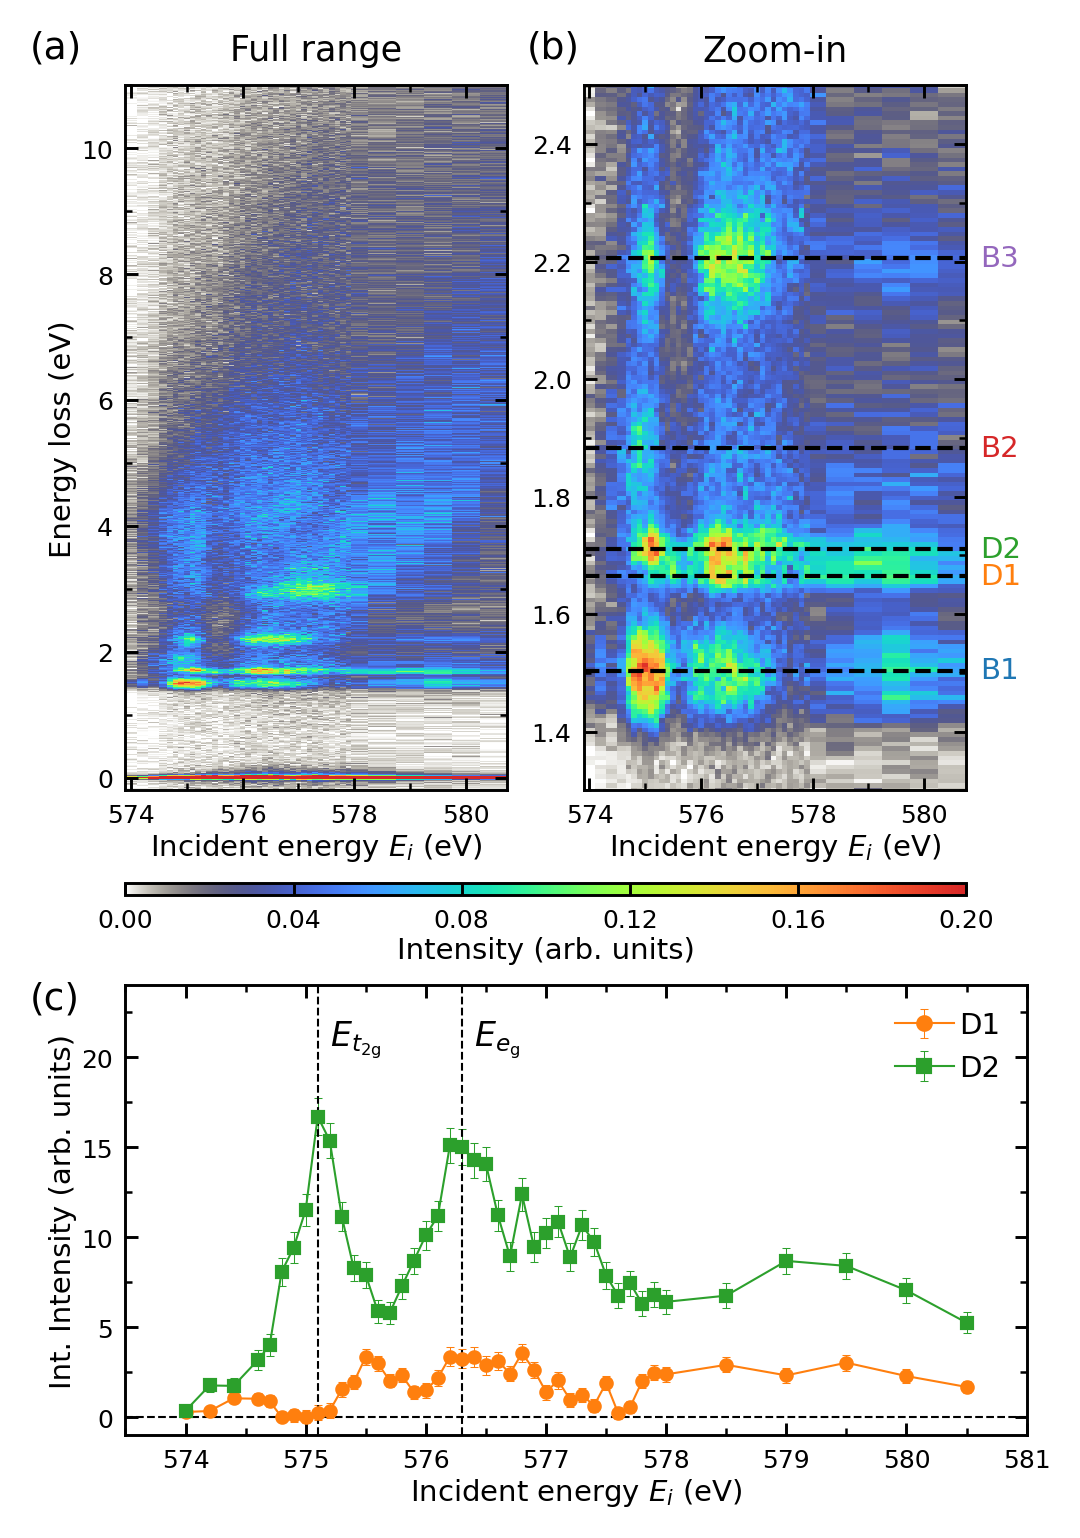

In [15]:
fig = plt.figure(dpi=dpi, figsize=(3.375, 5))
gs1 = fig.add_gridspec(nrows=1, ncols=2, wspace=0.2, top=0.95, left=0.1, right=0.93, bottom=0.48, width_ratios=[1, 1,],)
gs2 = fig.add_gridspec(nrows=1, ncols=1, left=0.1, right=0.99, top=0.35, bottom=0.05)
axs = [fig.add_subplot(gs) for gs in gs1] + [fig.add_subplot(gs) for gs in gs2]
cax = fig.add_axes([0.1, 0.41, 0.93-0.1, 0.008]) # axis for colorbar

colormap=turbo_w()

ims = [0,0]
ims[0] = plot2d(ax=axs[0], x=Emap_data_LV['Ei'][:], y=Emap_data_LV['eloss'][:], Int=Emap_data_LV['intensity'][:], colormap=colormap, rasterized=True)
ims[1] = plot2d(ax=axs[1], x=Emap_data_LV['Ei'][:], y=Emap_data_LV['eloss'][:], Int=Emap_data_LV['intensity'][:], colormap=colormap, rasterized=True)

ls='--'
centers = [1.50379296, 1.66448942, 1.71124406, 1.88267224, 2.20645585]
labels = ['B1', 'D1', 'D2', 'B2', 'B3']
colors = ['C0', 'C1', 'C2', 'C3', 'C4', ]
for i, center in enumerate(centers):
    axs[1].axhline(y=center, ls=ls, lw=1, color='k')
    axs[1].text(x=581, y=center, s=labels[i], va='center', color=colors[i])
    

markersize = 2.5

x = Emap_fit_result['LV']['D1_amplitude']['x'][:]
y = Emap_fit_result['LV']['D1_amplitude']['y'][:]
y_low = Emap_fit_result['LV']['D1_amplitude']['y_low'][:]
y_high = Emap_fit_result['LV']['D1_amplitude']['y_high'][:]
axs[2].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='D1', marker=marker_D1, color=color_D1, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
x = Emap_fit_result['LV']['D2_amplitude']['x'][:]
y = Emap_fit_result['LV']['D2_amplitude']['y'][:]
y_low = Emap_fit_result['LV']['D2_amplitude']['y_low'][:]
y_high = Emap_fit_result['LV']['D2_amplitude']['y_high'][:]
axs[2].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='D2', marker=marker_D2, color=color_D2, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
    
    
Eis = [575.1, 576.3]
labels = [r'$E_{t_{\rm 2g}}$', r'$E_{e_{\rm g}}$']
for i, Ei in enumerate(Eis):
    axs[2].axvline(x=Ei, ls='--', color='k')
    axs[2].text(x=Ei+0.1, y=21, s=labels[i], va='center', ha='left', fontsize=8)
    
axs[2].axhline(y=0, color='k', ls='--')    

# axis range and ticks
for ax in axs:
    ax.set_xlim(573.9, 580.75)
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

axs[0].set_ylim(-0.2,11)
axs[1].set_ylim(1.3,2.5)
axs[2].set_xlim(573.5, 581)
axs[2].set_ylim(-1, 24)

# axis label
for ax in axs:
    ax.set_xlabel('Incident energy $E_i$ (eV)')
axs[0].set_ylabel('Energy loss (eV)')
axs[2].set_ylabel('Int. Intensity (arb. units)')

# legend
axs[2].legend()

# title
axs[0].set_title(r'Full range',)
axs[1].set_title(r'Zoom-in',)


# colorbar
for im in ims[0:2]:
    im.set_clim(0, 0.2)
cbar = plt.colorbar(ims[0], cax=cax, orientation='horizontal')
cbar.set_ticks(np.arange(0, 0.21, 0.04))
cbar.set_label('Intensity (arb. units)')


# label
x = -0.25
y = 1.04
axs[0].text(x=x, y=y, s='(a)', fontdict=dict(fontsize=9), transform=axs[0].transAxes, color='k')
x = -0.15
axs[1].text(x=x, y=y, s='(b)', fontdict=dict(fontsize=9), transform=axs[1].transAxes, color='k')
x = -0.25
y = -0.31
axs[2].text(x=x, y=y, s='(c)', fontdict=dict(fontsize=9), transform=axs[0].transAxes, color='k')


# fig.savefig('SI_energy_map_LV.pdf', dpi=dpi)

# SI Figure 2, XAS

In [16]:
XAS_data = h5_file('data/XAS_data/XAS.hdf')

Text(0, 0.5, 'XAS (arb. units)')

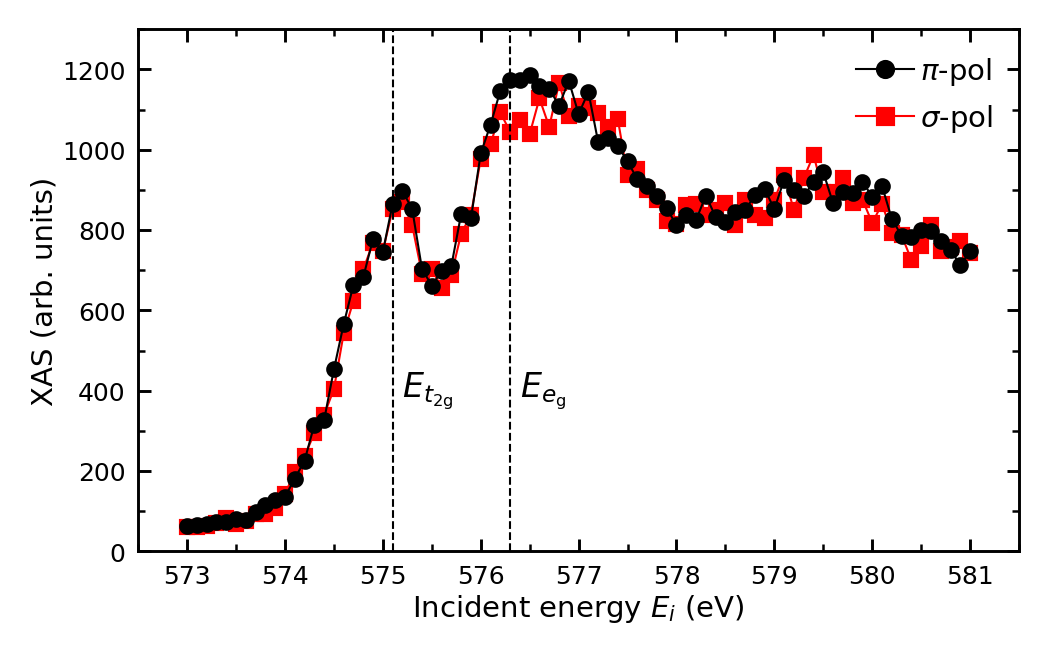

In [17]:
fig, ax = plt.subplots(1, 1, dpi=dpi, figsize=(3.375, 2), gridspec_kw=dict(wspace=0.08, top=0.99, left=0.11, bottom=0.12,right=0.98))


color_LH = 'k'
color_LV = 'r'


x = XAS_data['LH']['Ei'][:]
y = XAS_data['LH']['xas'][:]
ax.plot(x, y, 'o-', label='$\pi$-pol', color=color_LH, zorder=1)

x = XAS_data['LV']['Ei'][:]
y = XAS_data['LV']['xas'][:]

ax.plot(x, y, 's-', label='$\sigma$-pol', color=color_LV, zorder=0)


# axis range and ticks
ax.set_xlim(572.5, 581.5)
ax.set_ylim(0, 1300)
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))


# legend
ax.legend()


Eis = [575.1, 576.3]
labels = [r'$E_{t_{\rm 2g}}$', r'$E_{e_{\rm g}}$']
for i, Ei in enumerate(Eis):
    ax.axvline(x=Ei, ls=ls, color='k')
    ax.text(x=Ei+0.1, y=400, s=labels[i], va='center', ha='left', fontsize=8)


# axis label
ax.set_xlabel('Incident energy $E_i$ (eV)')
ax.set_ylabel('XAS (arb. units)')


# fig.savefig('SI_XAS.pdf', dpi=dpi)

# SI Figure 3, T-dep with E = 576.3 eV

Text(-0.08, 0.92, '(d)')

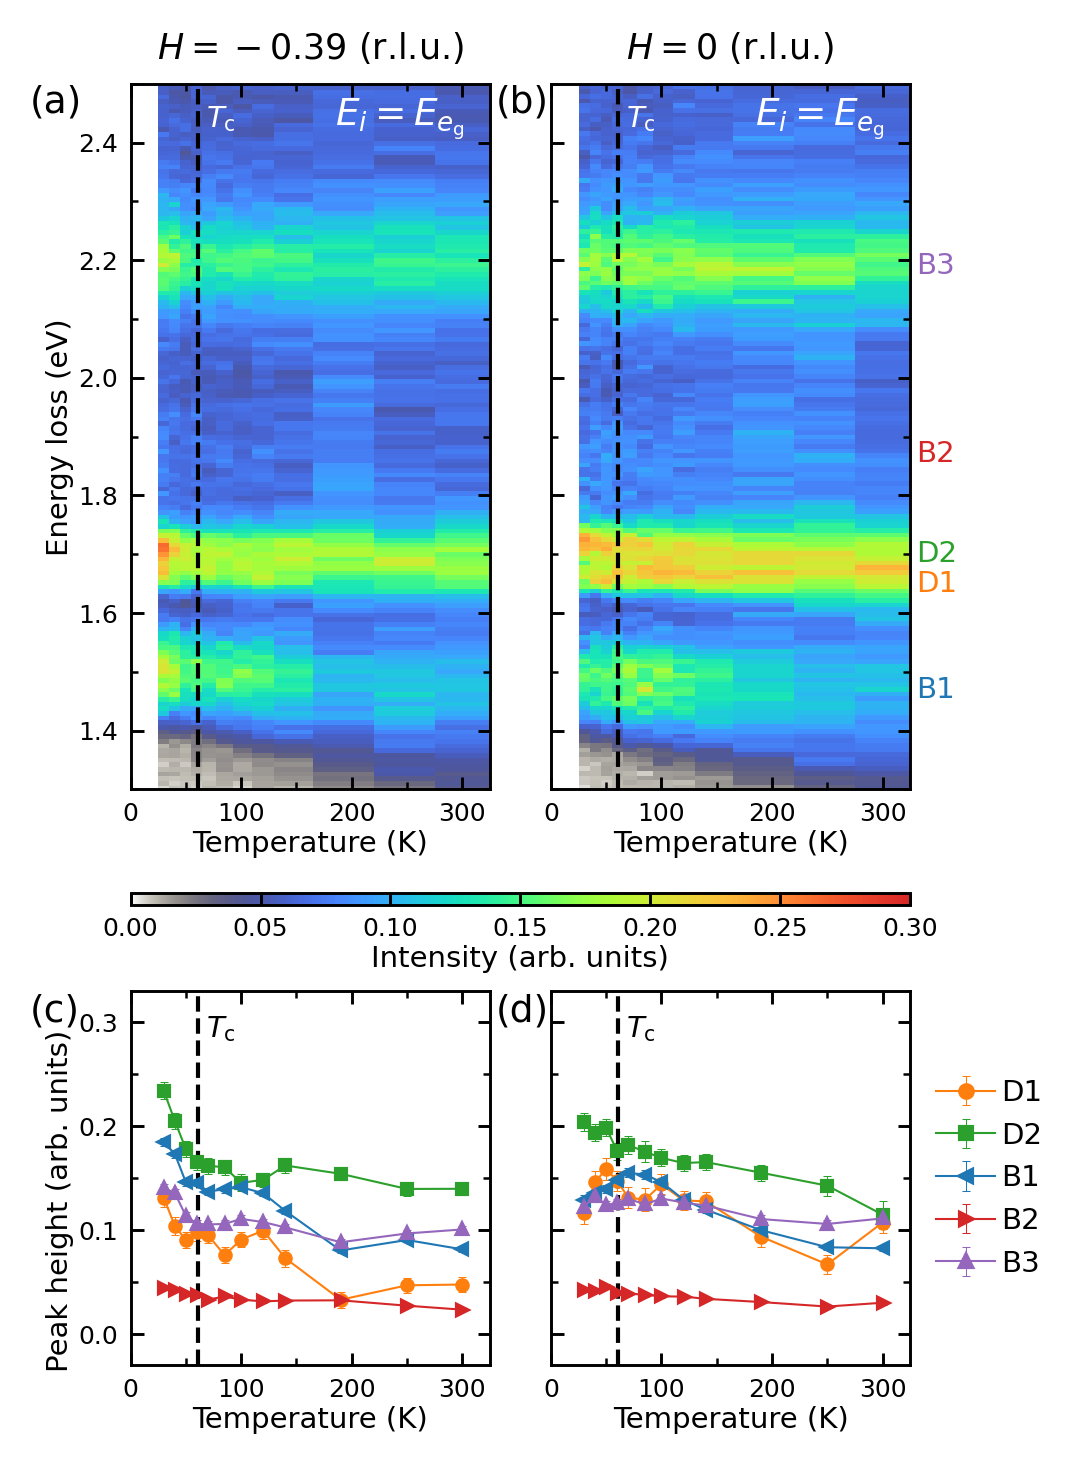

In [18]:
fig = plt.figure(dpi=dpi, figsize=(3.375, 4.8))
gs1 = fig.add_gridspec(nrows=1, ncols=2, wspace=0.17, top=0.94, left=0.1, right=0.87, bottom=0.45, width_ratios=[1, 1,],)
gs2 = fig.add_gridspec(nrows=1, ncols=2, wspace=0.17, top=0.31, left=0.1, right=0.87, bottom=0.05, width_ratios=[1, 1,], hspace=0.03)
axs = [fig.add_subplot(gs) for gs in gs1] + [fig.add_subplot(gs) for gs in gs2]
cax = fig.add_axes([0.1, 0.37, 0.87-0.1, 0.008]) # axis for colorbar

colormap=turbo_w()

ims = [0,0]
ims[0] = plot2d(ax=axs[0], x=Tdep1_2D_data['T'][:], y=Tdep1_2D_data['E1']['eloss'][:], Int=Tdep1_2D_data['E1']['intensity'][:], colormap=colormap, rasterized=True)
ims[1] = plot2d(ax=axs[1], x=Tdep2_2D_data['T'][:], y=Tdep2_2D_data['E1']['eloss'][:], Int=Tdep2_2D_data['E1']['intensity'][:], colormap=colormap, rasterized=True)

ls='--'
markersize = 2.5
centers = [1.47, 1.65, 1.7, 1.87, 2.19]
labels = ['B1', 'D1', 'D2', 'B2', 'B3']
colors = ['C0', 'C1', 'C2', 'C3', 'C4', ]
for i, center in enumerate(centers):
    axs[1].text(x=330, y=center, s=labels[i], va='center', color=colors[i])


x = Tdep1_fit_result['height_E1']['D1']['x'][:]
y = Tdep1_fit_result['height_E1']['D1']['y'][:]
y_low = Tdep1_fit_result['height_E1']['D1']['y_low'][:]
y_high = Tdep1_fit_result['height_E1']['D1']['y_high'][:]
axs[2].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='D1', marker=marker_D1, color=color_D1, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
x = Tdep1_fit_result['height_E1']['D2']['x'][:]
y = Tdep1_fit_result['height_E1']['D2']['y'][:]
y_low = Tdep1_fit_result['height_E1']['D2']['y_low'][:]
y_high = Tdep1_fit_result['height_E1']['D2']['y_high'][:]
axs[2].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='D2', marker=marker_D2, color=color_D2, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
x = Tdep1_fit_result['height_E1']['B1']['x'][:]
y = Tdep1_fit_result['height_E1']['B1']['y'][:]
y_low = Tdep1_fit_result['height_E1']['B1']['y_low'][:]
y_high = Tdep1_fit_result['height_E1']['B1']['y_high'][:]
axs[2].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='B1', marker=marker_B1, color=color_B1, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
x = Tdep1_fit_result['height_E1']['B2']['x'][:]
y = Tdep1_fit_result['height_E1']['B2']['y'][:]
y_low = Tdep1_fit_result['height_E1']['B2']['y_low'][:]
y_high = Tdep1_fit_result['height_E1']['B2']['y_high'][:]
axs[2].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='B2', marker=marker_B2, color=color_B2, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
x = Tdep1_fit_result['height_E1']['B3']['x'][:]
y = Tdep1_fit_result['height_E1']['B3']['y'][:]
y_low = Tdep1_fit_result['height_E1']['B3']['y_low'][:]
y_high = Tdep1_fit_result['height_E1']['B3']['y_high'][:]
axs[2].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='B3', marker=marker_B3, color=color_B3, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)


x = Tdep2_fit_result['height_E1']['D1']['x'][:]
y = Tdep2_fit_result['height_E1']['D1']['y'][:]
y_low = Tdep2_fit_result['height_E1']['D1']['y_low'][:]
y_high = Tdep2_fit_result['height_E1']['D1']['y_high'][:]
axs[3].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='D1', marker=marker_D1, color=color_D1, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
x = Tdep2_fit_result['height_E1']['D2']['x'][:]
y = Tdep2_fit_result['height_E1']['D2']['y'][:]
y_low = Tdep2_fit_result['height_E1']['D2']['y_low'][:]
y_high = Tdep2_fit_result['height_E1']['D2']['y_high'][:]
axs[3].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='D2', marker=marker_D2, color=color_D2, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
x = Tdep2_fit_result['height_E1']['B1']['x'][:]
y = Tdep2_fit_result['height_E1']['B1']['y'][:]
y_low = Tdep2_fit_result['height_E1']['B1']['y_low'][:]
y_high = Tdep2_fit_result['height_E1']['B1']['y_high'][:]
axs[3].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='B1', marker=marker_B1, color=color_B1, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
x = Tdep2_fit_result['height_E1']['B2']['x'][:]
y = Tdep2_fit_result['height_E1']['B2']['y'][:]
y_low = Tdep2_fit_result['height_E1']['B2']['y_low'][:]
y_high = Tdep2_fit_result['height_E1']['B2']['y_high'][:]
axs[3].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='B2', marker=marker_B2, color=color_B2, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
x = Tdep2_fit_result['height_E1']['B3']['x'][:]
y = Tdep2_fit_result['height_E1']['B3']['y'][:]
y_low = Tdep2_fit_result['height_E1']['B3']['y_low'][:]
y_high = Tdep2_fit_result['height_E1']['B3']['y_high'][:]
axs[3].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='B3', marker=marker_B3, color=color_B3, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)



# axis range and ticks
for ax in axs:
    ax.set_xlim(0,325)
    ax.axvline(x=61, lw=1, ls='--', color='k')
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    
for ax in axs[0:2]:
    ax.set_ylim(1.3,2.5)
    
    
for ax in axs[2:4]:
    ax.set_ylim(-0.03,0.33)

for ax in axs[1::2]:
    ax.set_yticklabels([])


# legend
axs[3].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# axis label
axs[0].set_xlabel('Temperature (K)')
axs[1].set_xlabel('Temperature (K)')
axs[2].set_xlabel('Temperature (K)')
axs[3].set_xlabel('Temperature (K)')
axs[0].set_ylabel('Energy loss (eV)')
axs[2].set_ylabel('Peak height (arb. units)', y=0.44)



# title
axs[0].set_title('$H=-0.39$ (r.l.u.)',)
axs[1].set_title('$H=0$ (r.l.u.)',)

for ax in axs[0:2]:
    ax.text(x=0.75, y=0.95, s=r'$E_i = E_{e_{\rm g}}$', va='center', ha='center', fontsize=9, transform=ax.transAxes, color='white')
for ax in axs[0:2]:
    ax.text(x=0.25, y=0.95, s=r'$T_{\rm c}$', va='center', ha='center', transform=ax.transAxes, color='white')
for ax in axs[2:]:
    ax.text(x=0.25, y=0.9, s=r'$T_{\rm c}$', va='center', ha='center', transform=ax.transAxes, color='k')


# colorbar
for im in ims[0:2]:
    im.set_clim(0, 0.3)
cbar = plt.colorbar(ims[0], cax=cax, orientation='horizontal')
cbar.set_ticks(np.arange(0, 0.31, 0.05))
cbar.set_label('Intensity (arb. units)')


# label
x = -0.28
y = 0.96
axs[0].text(x=x, y=y, s='(a)', fontdict=dict(fontsize=9), transform=axs[0].transAxes, color='k')
x = -0.08
axs[1].text(x=x, y=y, s='(b)', fontdict=dict(fontsize=9), transform=axs[1].transAxes, color='k', ha='center')
x = -0.28
y = 0.92
axs[2].text(x=x, y=y, s='(c)', fontdict=dict(fontsize=9), transform=axs[2].transAxes, color='k')
x = -0.08
axs[3].text(x=x, y=y, s='(d)', fontdict=dict(fontsize=9), transform=axs[3].transAxes, color='k', ha='center')


# fig.savefig('SI_Tdep.pdf', dpi=dpi)

# SI Figure 4, fits of energy map, LH

In [19]:
spectra_Edep_LH_data = h5_file('data/RIXS_data/Edep_LH_1dSpectra_cofit.hdf', 'r')
spectra_Edep_LH_fits = h5_file('data/RIXS_fits/Edep_LH_cofits.hdf', 'r')

Text(-0.12, 0.99, '(b)')

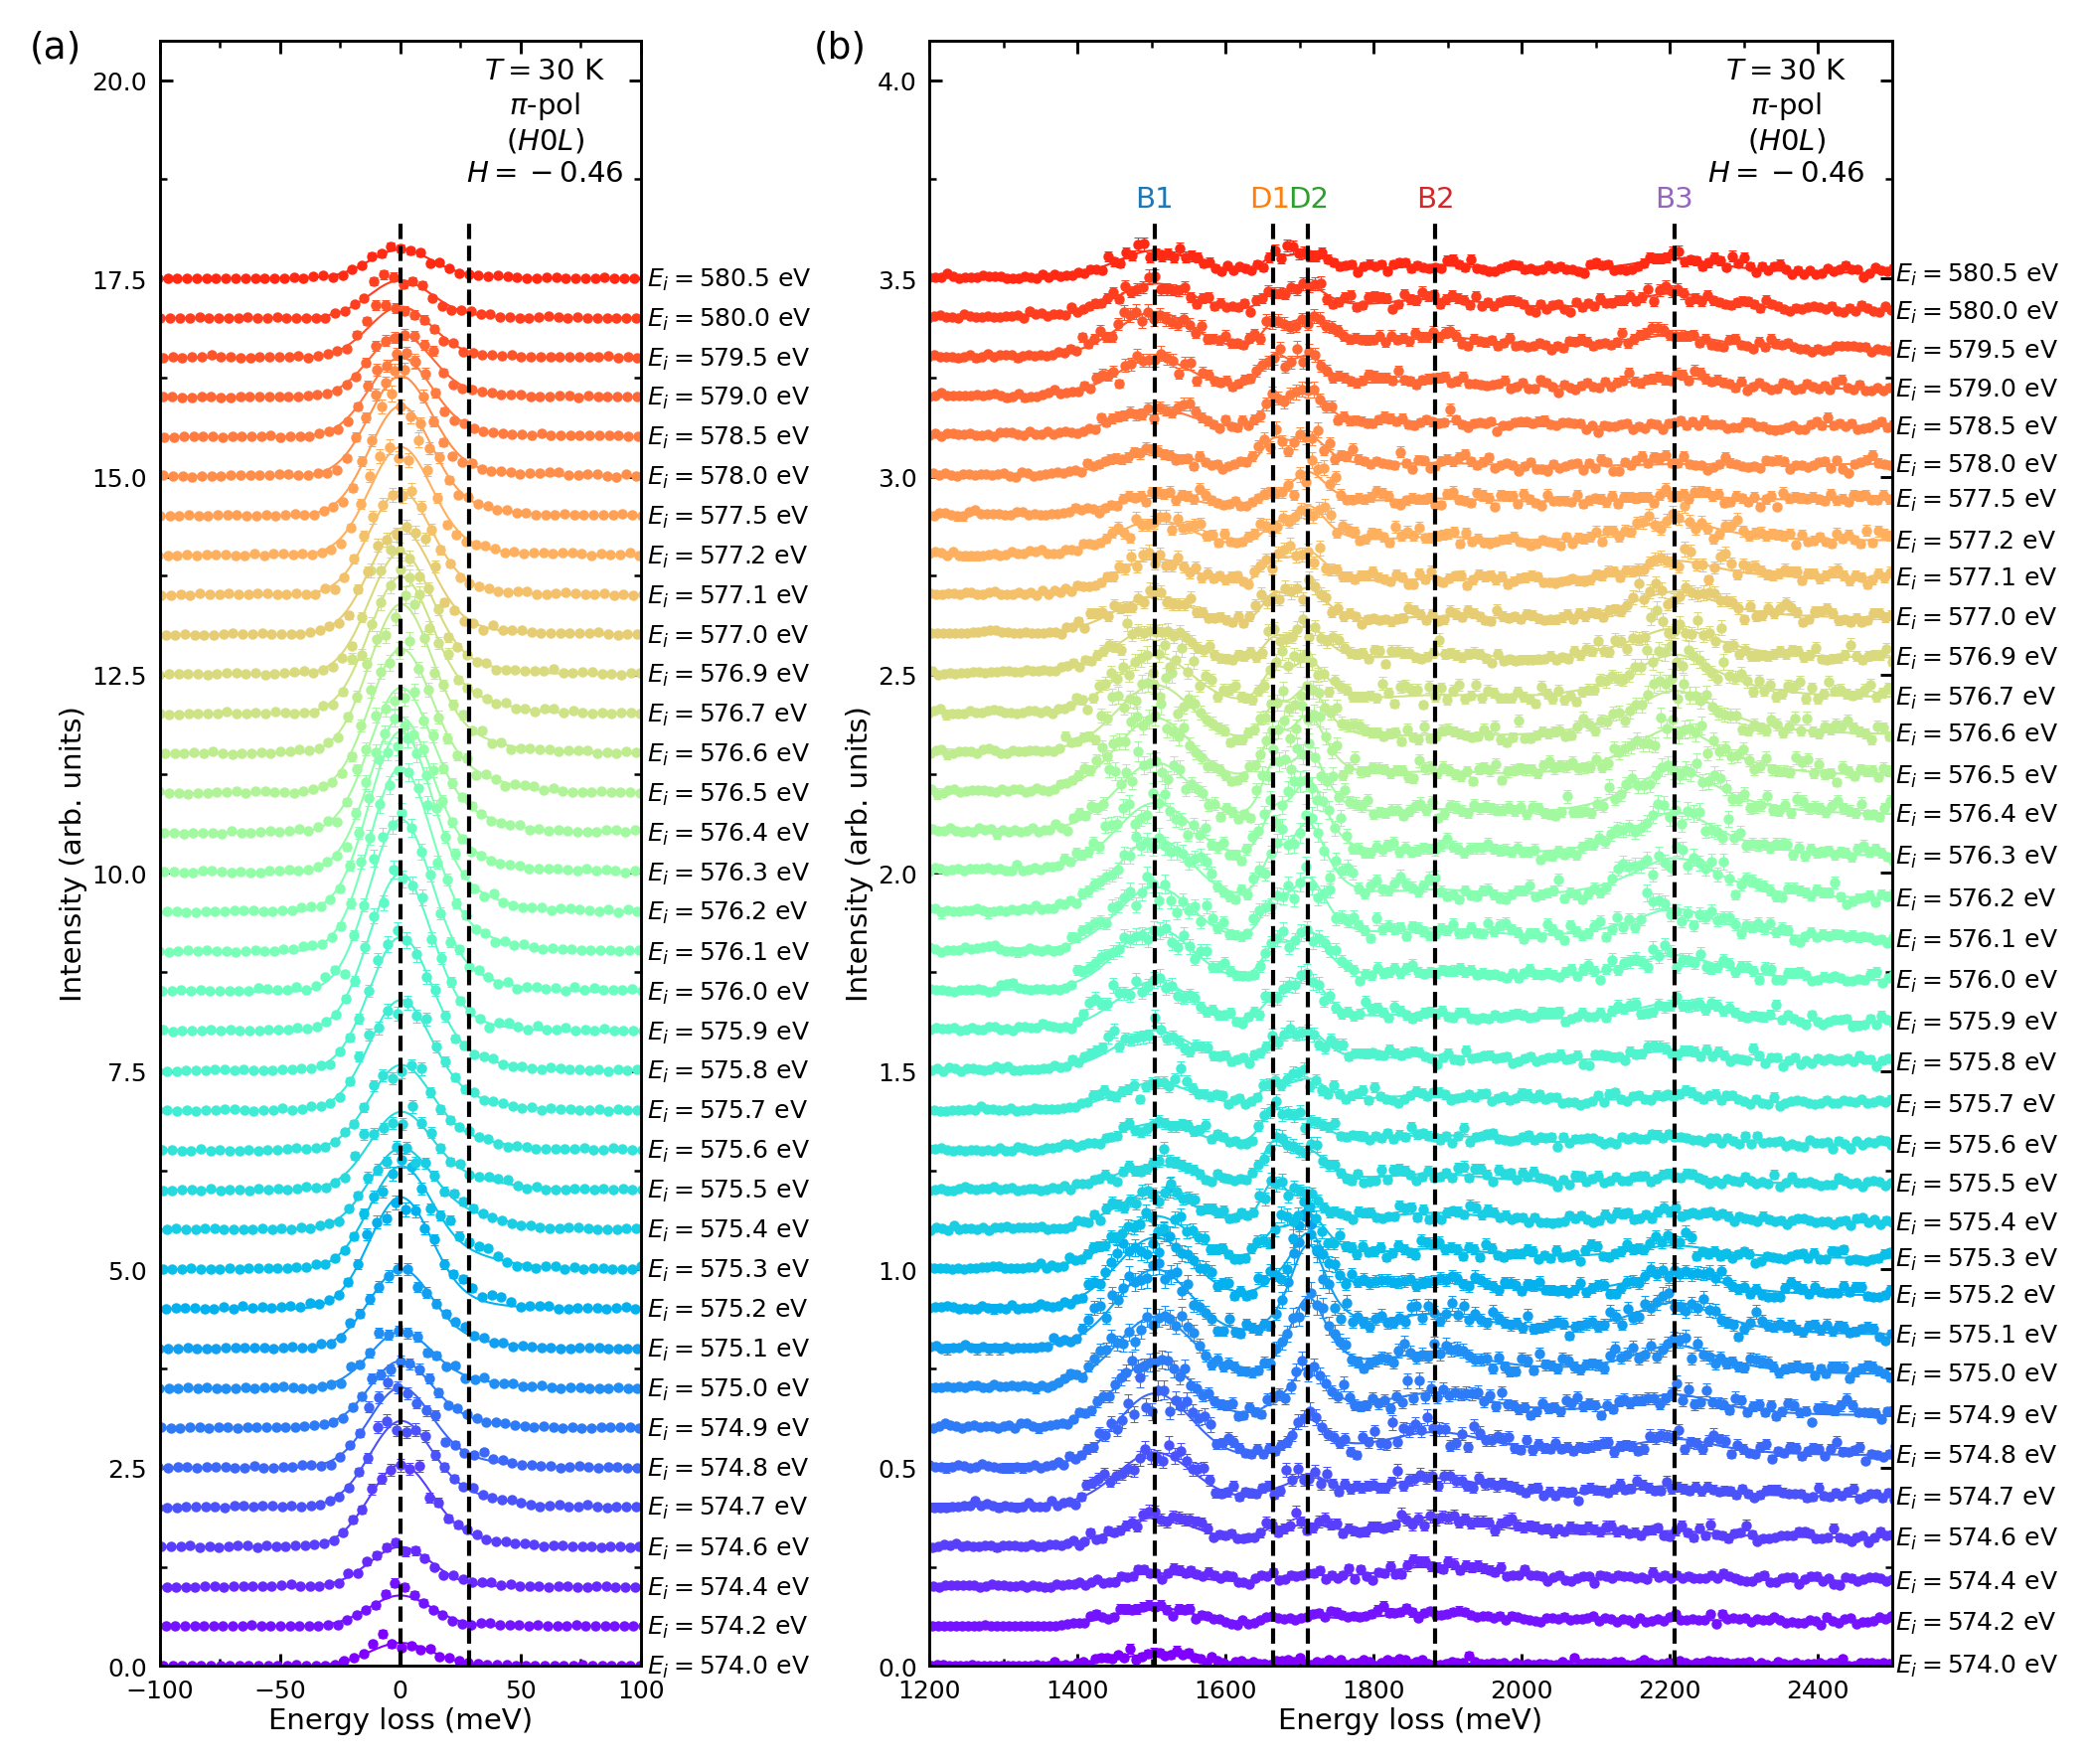

In [20]:
fig, axs = plt.subplots(1, 2, dpi=dpi, figsize=(7, 5.8), 
                        gridspec_kw=dict(wspace=0.4, left=0.07, right=0.9, bottom=0.05, top=0.99, width_ratios=[1, 2],)
                       )

markersize = 1.5
alpha = 1
cmap = gen_cmap(38, cmap='rainbow')

yshift = 0.5
Es = spectra_Edep_LH_data['Ei'][:]
for i, E in enumerate(Es):
    x = spectra_Edep_LH_data['spectra_Ei_{:.1f}eV_4pt_per_pixel'.format(E)]['eloss'][:]
    y = spectra_Edep_LH_data['spectra_Ei_{:.1f}eV_4pt_per_pixel'.format(E)]['intensity'][:]
    yerr = spectra_Edep_LH_data['spectra_Ei_{:.1f}eV_4pt_per_pixel'.format(E)]['error'][:]
        
    axs[0].errorbar(x, y+yshift*i, yerr=yerr,marker='o', color=cmap(i), ls='',markersize=markersize,
                    elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)
      
    # plot the fit results
    x = spectra_Edep_LH_fits['fits_Ei{:.1f}'.format(E)]['elastic']['x'][:]
    y = spectra_Edep_LH_fits['fits_Ei{:.1f}'.format(E)]['elastic']['y'][:]
    axs[0].plot(x, y+yshift*i,'-',color=cmap(i))
    

    # label
    axs[0].text(102.5, y[np.where(x>100)][0]-0.1+yshift*i, s='$E_i=${:.1f} eV'.format(E), fontsize=6, color='k')

yshift = 0.1
Es = spectra_Edep_LH_data['Ei'][:]
for i, E in enumerate(Es):
    x = spectra_Edep_LH_data['spectra_Ei_{:.1f}eV_2pt_per_pixel'.format(E)]['eloss'][:]
    y = spectra_Edep_LH_data['spectra_Ei_{:.1f}eV_2pt_per_pixel'.format(E)]['intensity'][:]
    yerr = spectra_Edep_LH_data['spectra_Ei_{:.1f}eV_2pt_per_pixel'.format(E)]['error'][:]
        
    axs[1].errorbar(x, y+yshift*i, yerr=yerr,marker='o', color=cmap(i), ls='',markersize=markersize,
                    elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)
      
    # plot the fit results
    x = spectra_Edep_LH_fits['fits_Ei{:.1f}'.format(E)]['exciton']['x'][:]
    y = spectra_Edep_LH_fits['fits_Ei{:.1f}'.format(E)]['exciton']['y'][:]
    axs[1].plot(x, y+yshift*i,'-',color=cmap(i))
    
    # label
    axs[1].text(2505, y[np.where(x>2500)][0]-0.02+yshift*i, s='$E_i=${:.1f} eV'.format(E), fontsize=6, color='k')

    
ls='--'
centers = [0, 28.6740482]
for i, center in enumerate(centers):
    axs[0].axvline(x=center, ymax=0.89, ls=ls, lw=1, color='k', zorder=3)
    
centers = [1503.79296, 1664.48942, 1711.24406, 1882.67224, 2206.45585]
centers_label = [1503, 1660, 1712, 1883, 2206]
labels = ['B1', 'D1', 'D2', 'B2', 'B3']
colors = ['C0', 'C1', 'C2', 'C3', 'C4', ]
for i, center in enumerate(centers):
    axs[1].axvline(x=center, ymax=0.89, ls=ls, lw=1, color='k', zorder=3)
    axs[1].text(x=centers_label[i], y=3.7, s=labels[i], va='center', ha='center', color=colors[i])
    
    
x = 0.8
y = 0.95
axs[0].text(x, y, s='$T= 30$ K\n$\pi$-pol\n($H0L$)\n$H={:.2f}$'.format(spectra_Edep_LH_data['H'][0]), transform=axs[0].transAxes, color='k', va='center',ha='center')
x = 0.89
y = 0.95
axs[1].text(x, y, s='$T= 30$ K\n$\pi$-pol\n($H0L$)\n$H={:.2f}$'.format(spectra_Edep_LH_data['H'][0]), transform=axs[1].transAxes, color='k', va='center',ha='center')


for ax in axs:
    ax.set_xlabel('Energy loss (meV)')
    ax.set_ylabel('Intensity (arb. units)')
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

# axis range
axs[0].set_ylim(0,20.5)
axs[0].set_xlim(-100,100)
axs[1].set_ylim(0,20.5/5)
axs[1].set_xlim(1200,2500)

# label
x = -0.27
y = 0.99
axs[0].text(x=x, y=y, s='(a)', fontdict=dict(fontsize=9), transform=axs[0].transAxes, color='k')
x = -0.12
axs[1].text(x=x, y=y, s='(b)', fontdict=dict(fontsize=9), transform=axs[1].transAxes, color='k')

# fig.savefig('SI_energy_map_LH_fits.pdf', dpi=dpi)

# SI Figure 5, fits of energy map, LV

In [21]:
spectra_Edep_LV_data = h5_file('data/RIXS_data/Edep_LV_1dSpectra_cofit.hdf', 'r')
spectra_Edep_LV_fits = h5_file('data/RIXS_fits/Edep_LV_cofits.hdf', 'r')

Text(-0.12, 0.99, '(b)')

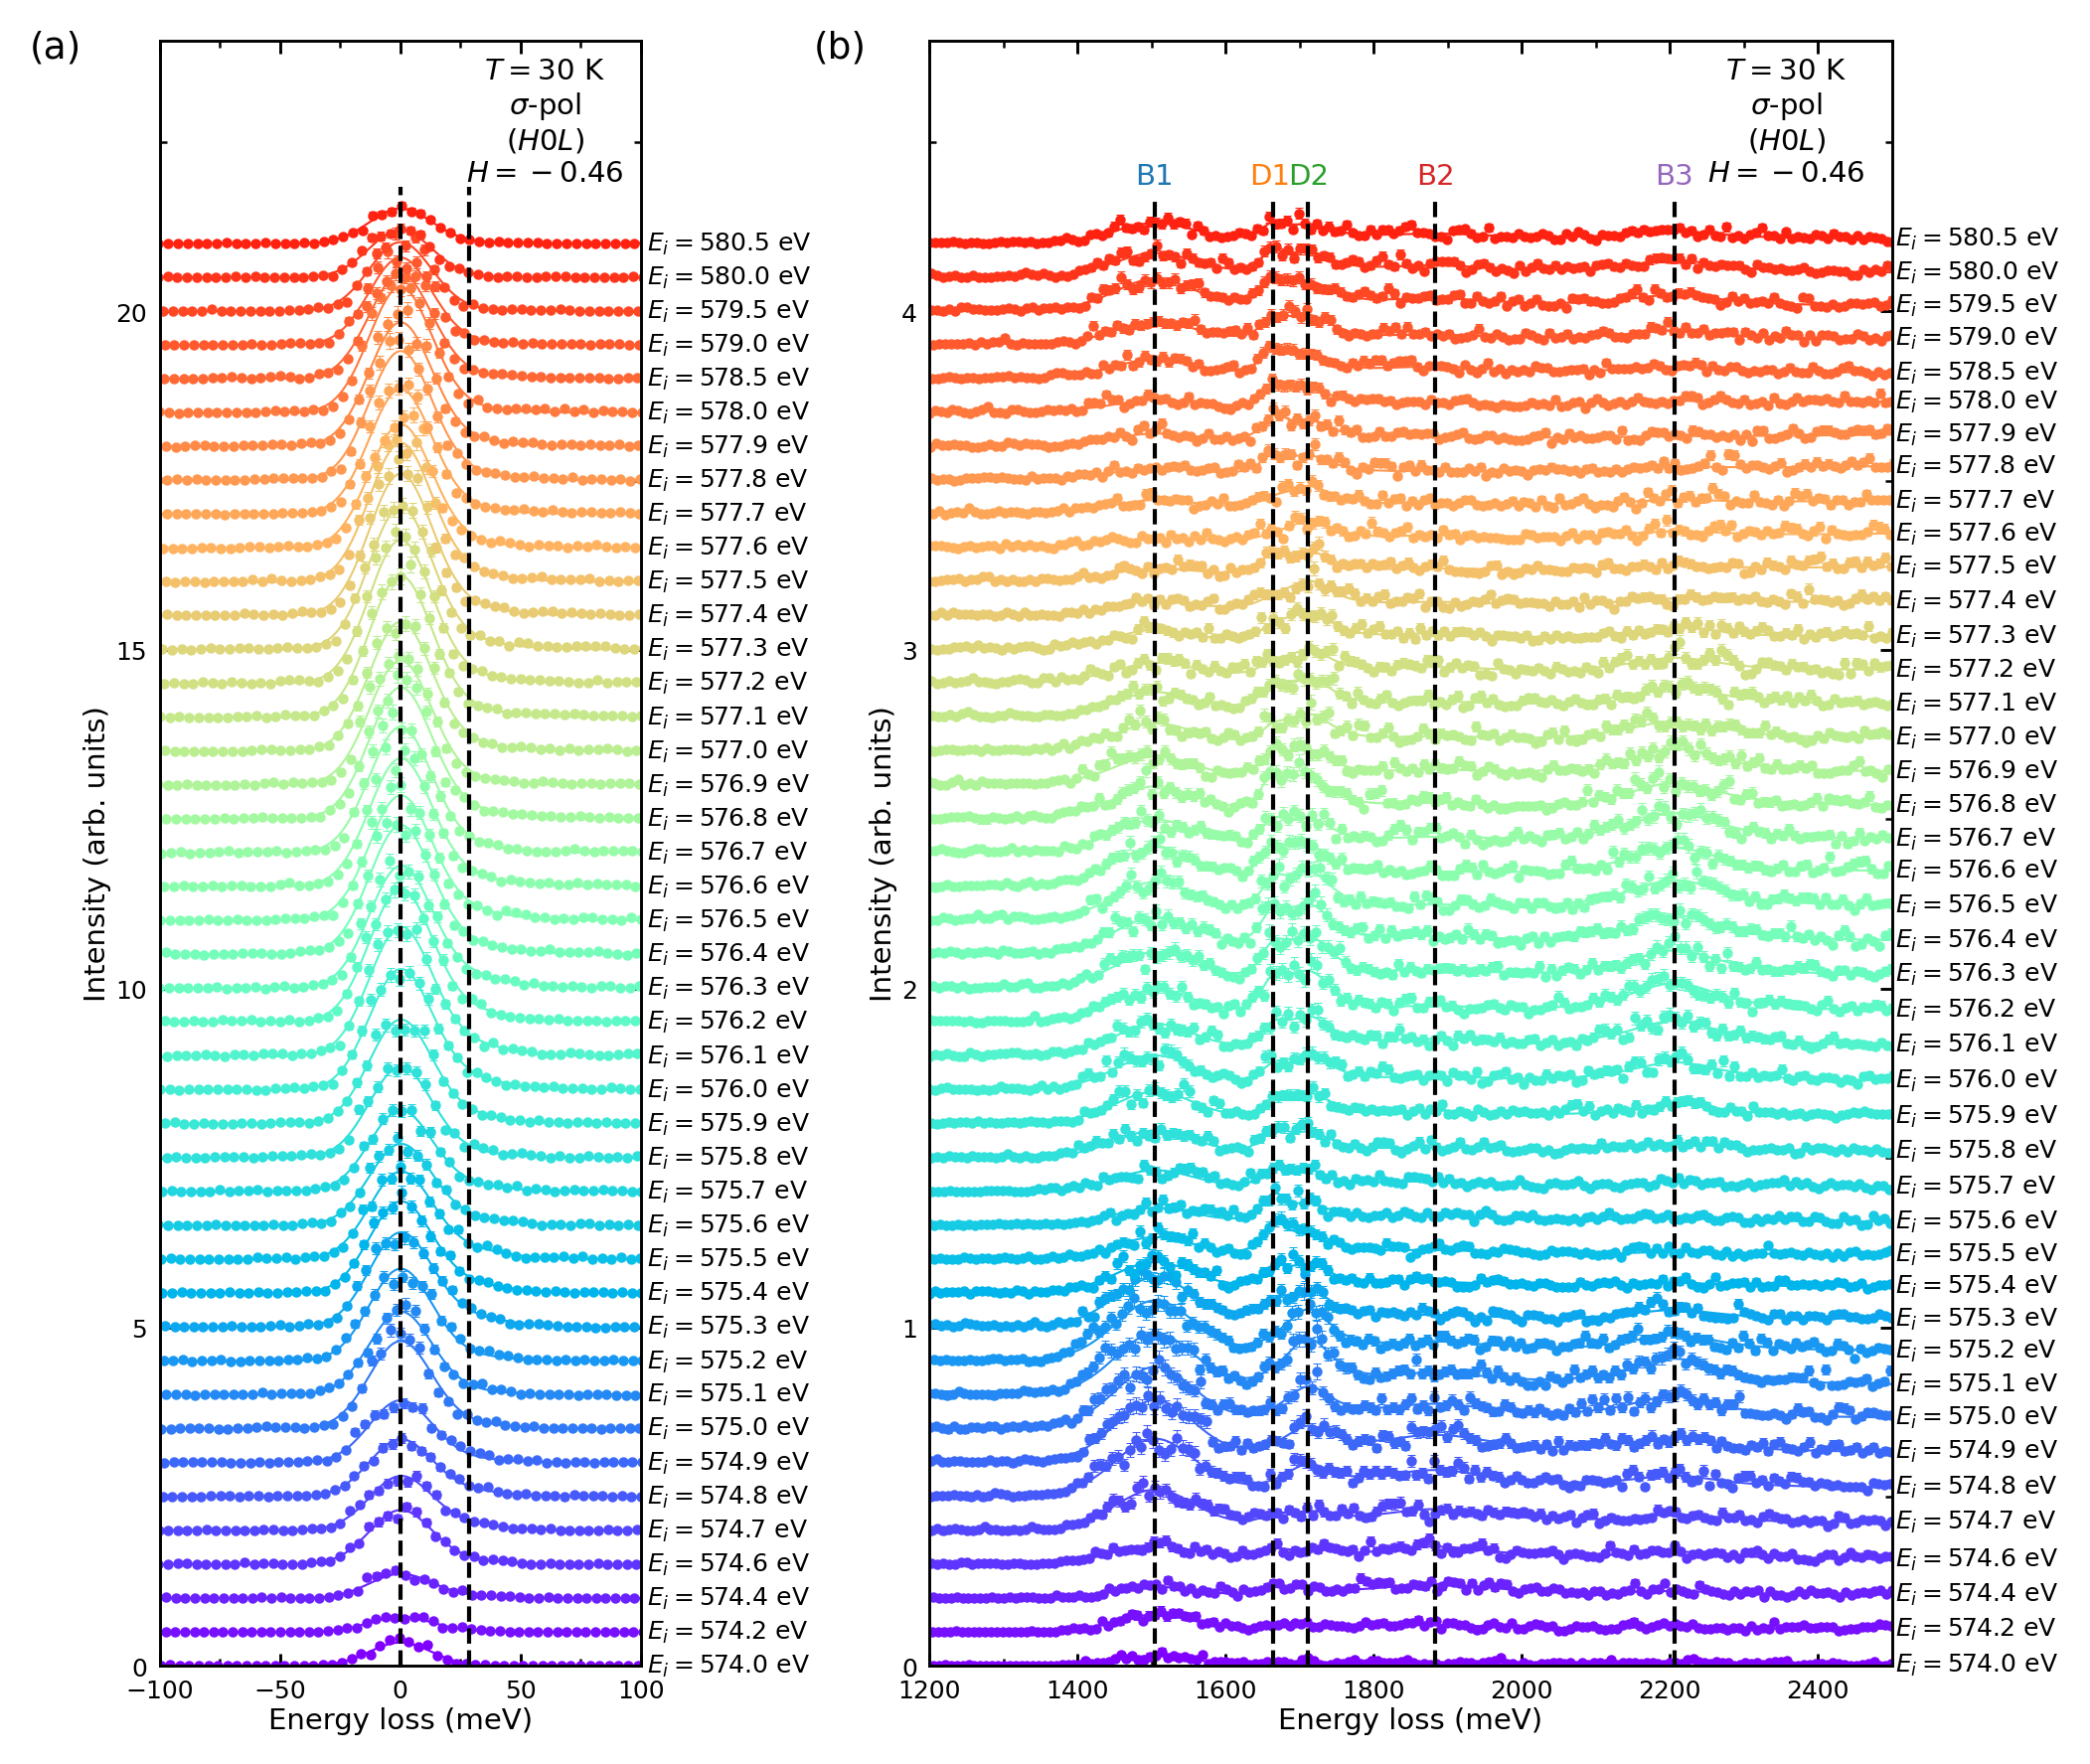

In [22]:
fig, axs = plt.subplots(1, 2, dpi=dpi, figsize=(7, 5.8), 
                        gridspec_kw=dict(wspace=0.4, left=0.07, right=0.9, bottom=0.05, top=0.99, width_ratios=[1, 2],)
                       )

markersize = 1.5
alpha = 1
cmap = gen_cmap(45, cmap='rainbow')

yshift = 0.5
Es = spectra_Edep_LV_data['Ei'][:]
for i, E in enumerate(Es):
    x = spectra_Edep_LV_data['spectra_Ei_{:.1f}eV_4pt_per_pixel'.format(E)]['eloss'][:]
    y = spectra_Edep_LV_data['spectra_Ei_{:.1f}eV_4pt_per_pixel'.format(E)]['intensity'][:]
    yerr = spectra_Edep_LV_data['spectra_Ei_{:.1f}eV_4pt_per_pixel'.format(E)]['error'][:]
        
    axs[0].errorbar(x, y+yshift*i, yerr=yerr,marker='o', color=cmap(i), ls='',markersize=markersize,
                    elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)
      
    # plot the fit results
    x = spectra_Edep_LV_fits['fits_Ei{:.1f}'.format(E)]['elastic']['x'][:]
    y = spectra_Edep_LV_fits['fits_Ei{:.1f}'.format(E)]['elastic']['y'][:]
    axs[0].plot(x, y+yshift*i,'-',color=cmap(i))
    

    # label
    axs[0].text(102.5, y[np.where(x>100)][0]-0.1+yshift*i, s='$E_i=${:.1f} eV'.format(E), fontsize=6, color='k')

yshift = 0.1
Es = spectra_Edep_LV_data['Ei'][:]
for i, E in enumerate(Es):
    x = spectra_Edep_LV_data['spectra_Ei_{:.1f}eV_2pt_per_pixel'.format(E)]['eloss'][:]
    y = spectra_Edep_LV_data['spectra_Ei_{:.1f}eV_2pt_per_pixel'.format(E)]['intensity'][:]
    yerr = spectra_Edep_LV_data['spectra_Ei_{:.1f}eV_2pt_per_pixel'.format(E)]['error'][:]
        
    axs[1].errorbar(x, y+yshift*i, yerr=yerr,marker='o', color=cmap(i), ls='',markersize=markersize,
                    elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)
      
    # plot the fit results
    x = spectra_Edep_LV_fits['fits_Ei{:.1f}'.format(E)]['exciton']['x'][:]
    y = spectra_Edep_LV_fits['fits_Ei{:.1f}'.format(E)]['exciton']['y'][:]
    axs[1].plot(x, y+yshift*i,'-',color=cmap(i))
    
    # label
    axs[1].text(2505, y[np.where(x>2500)][0]-0.02+yshift*i, s='$E_i=${:.1f} eV'.format(E), fontsize=6, color='k')

    
ls='--'
centers = [0, 28.6740482]
for i, center in enumerate(centers):
    axs[0].axvline(x=center, ls=ls, ymax=0.91, lw=1, color='k', zorder=3)
    
centers = [1503.79296, 1664.48942, 1711.24406, 1882.67224, 2206.45585]
centers_label = [1503, 1660, 1712, 1883, 2206]
labels = ['B1', 'D1', 'D2', 'B2', 'B3']
colors = ['C0', 'C1', 'C2', 'C3', 'C4', ]
for i, center in enumerate(centers):
    axs[1].axvline(x=center, ls=ls, ymax=0.902, lw=1, color='k', zorder=3)
    axs[1].text(x=centers_label[i], y=4.4, s=labels[i], va='center', ha='center', color=colors[i])
    
    
x = 0.8
y = 0.95
axs[0].text(x, y, s='$T= 30$ K\n$\sigma$-pol\n($H0L$)\n$H={:.2f}$'.format(spectra_Edep_LV_data['H'][0]), transform=axs[0].transAxes, color='k', va='center',ha='center')
x = 0.89
y = 0.95
axs[1].text(x, y, s='$T= 30$ K\n$\sigma$-pol\n($H0L$)\n$H={:.2f}$'.format(spectra_Edep_LV_data['H'][0]), transform=axs[1].transAxes, color='k', va='center',ha='center')


for ax in axs:
    ax.set_xlabel('Energy loss (meV)')
    ax.set_ylabel('Intensity (arb. units)')
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

# axis range
axs[0].set_ylim(0,24)
axs[0].set_xlim(-100,100)
axs[1].set_ylim(0,24/5)
axs[1].set_xlim(1200,2500)

# label
x = -0.27
y = 0.99
axs[0].text(x=x, y=y, s='(a)', fontdict=dict(fontsize=9), transform=axs[0].transAxes, color='k')
x = -0.12
axs[1].text(x=x, y=y, s='(b)', fontdict=dict(fontsize=9), transform=axs[1].transAxes, color='k')

# fig.savefig('SI_energy_map_LV_fits.pdf', dpi=dpi)

# SI Figure 6, fits of dispersion, elastic lines

Text(-0.14, 0.99, '(b)')

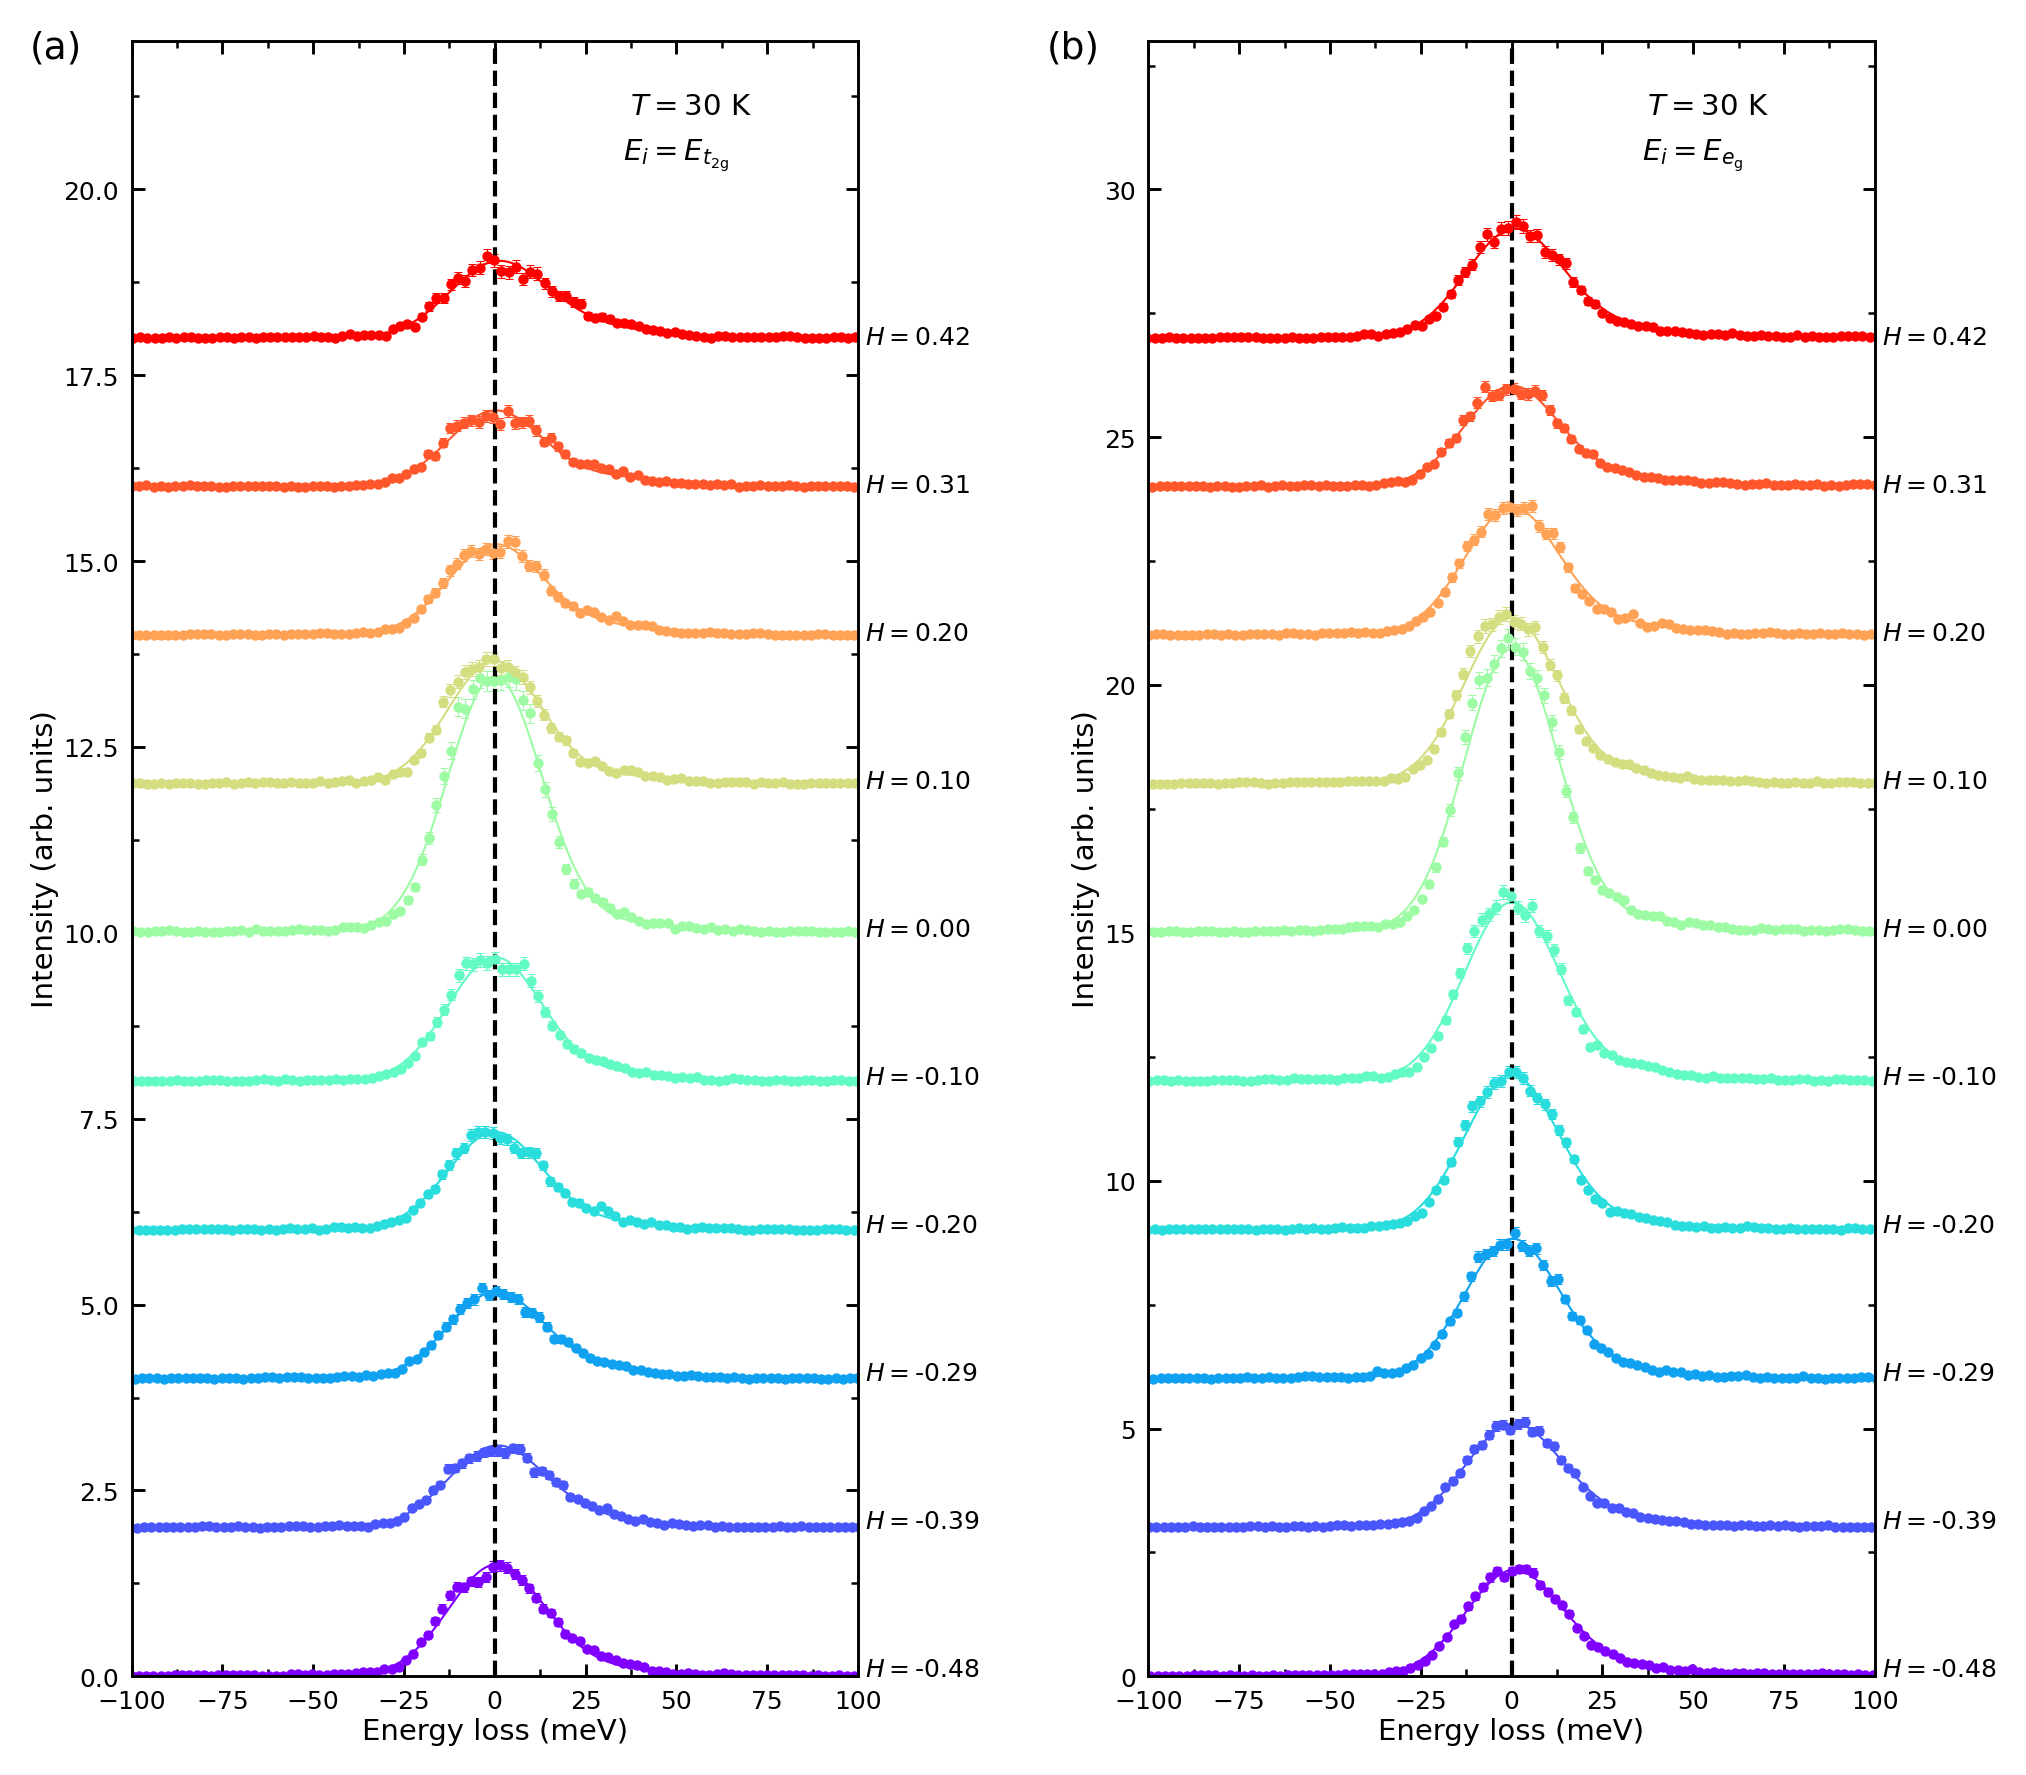

In [23]:
fig, axs = plt.subplots(1, 2, dpi=dpi, figsize=(7, 5.8), 
                        gridspec_kw=dict(wspace=0.4, left=0.07, right=0.9, bottom=0.05, top=0.99, width_ratios=[1, 1],)
                       )

markersize = 1.5
alpha = 1
cmap = gen_cmap(10, cmap='rainbow')

yshift = 2
Hs = spectra_thdep_data['H'][:]
for i, H in enumerate(Hs):
    x = spectra_thdep_data['E0']['spectra_H_{:.2f}_8pt_per_pixel'.format(H)]['eloss'][:]
    y = spectra_thdep_data['E0']['spectra_H_{:.2f}_8pt_per_pixel'.format(H)]['intensity'][:]
    yerr = spectra_thdep_data['E0']['spectra_H_{:.2f}_8pt_per_pixel'.format(H)]['error'][:]
        
    axs[0].errorbar(x, y+yshift*i, yerr=yerr,marker='o', color=cmap(i), ls='',markersize=markersize,
                    elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
      
    # plot the fit results
    x = spectra_thdep_fits['E0']['fits_H_{:.2f}'.format(H)]['elastic']['x'][:]
    y = spectra_thdep_fits['E0']['fits_H_{:.2f}'.format(H)]['elastic']['y'][:]
    axs[0].plot(x, y+yshift*i,'-',color=cmap(i))
     
    # label
    axs[0].text(1.01, 0+0.0905*i, s='$H=${:.2f}'.format(H), fontsize=6, transform=axs[0].transAxes, color='k')

yshift = 3
Hs = spectra_thdep_data['H'][:]
for i, H in enumerate(Hs):
    x = spectra_thdep_data['E1']['spectra_H_{:.2f}_8pt_per_pixel'.format(H)]['eloss'][:]
    y = spectra_thdep_data['E1']['spectra_H_{:.2f}_8pt_per_pixel'.format(H)]['intensity'][:]
    yerr = spectra_thdep_data['E1']['spectra_H_{:.2f}_8pt_per_pixel'.format(H)]['error'][:]
        
    axs[1].errorbar(x, y+yshift*i, yerr=yerr,marker='o', color=cmap(i), ls='',markersize=markersize,
                    elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)
      
    # plot the fit results
    x = spectra_thdep_fits['E1']['fits_H_{:.2f}'.format(H)]['elastic']['x'][:]
    y = spectra_thdep_fits['E1']['fits_H_{:.2f}'.format(H)]['elastic']['y'][:]
    axs[1].plot(x, y+yshift*i,'-',color=cmap(i))
    
     
    # label
    axs[1].text(1.01, 0+0.0905*i, s='$H=${:.2f}'.format(H), fontsize=6, transform=axs[1].transAxes, color='k')
    
    
x = 0.77
y = 0.96
axs[0].text(x, y, s='$T= 30$ K', transform=axs[0].transAxes, color='k', va='center',ha='center')
x = 0.75
y = 0.93
axs[0].text(x, y, s=r'$E_i = E_{t_{\rm 2g}}$', transform=axs[0].transAxes, color='k', va='center',ha='center')
x = 0.77
y = 0.96
axs[1].text(x, y, s='$T= 30$ K', transform=axs[1].transAxes, color='k', va='center',ha='center')
x = 0.75
y = 0.93
axs[1].text(x, y, s=r'$E_i = E_{e_{\rm g}}$', transform=axs[1].transAxes, color='k', va='center',ha='center')


# axis label
for ax in axs:
    ax.set_xlabel('Energy loss (meV)')
    ax.set_ylabel('Intensity (arb. units)')
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

# axis range
for ax in axs:
    ax.set_xlim(-100,100)
    ax.axvline(x=0, lw=1, color='k', ls='--')
    
axs[0].set_ylim(0,22)
axs[1].set_ylim(0,33)



# label
x = -0.14
y = 0.99
axs[0].text(x=x, y=y, s='(a)', fontdict=dict(fontsize=9), transform=axs[0].transAxes, color='k')
axs[1].text(x=x, y=y, s='(b)', fontdict=dict(fontsize=9), transform=axs[1].transAxes, color='k')


# fig.savefig('SI_dispersion_elastic_fits.pdf', dpi=dpi)

# SI Figure 7, fits of dispersion, E = 575.1 eV

(-0.02, 0.48)

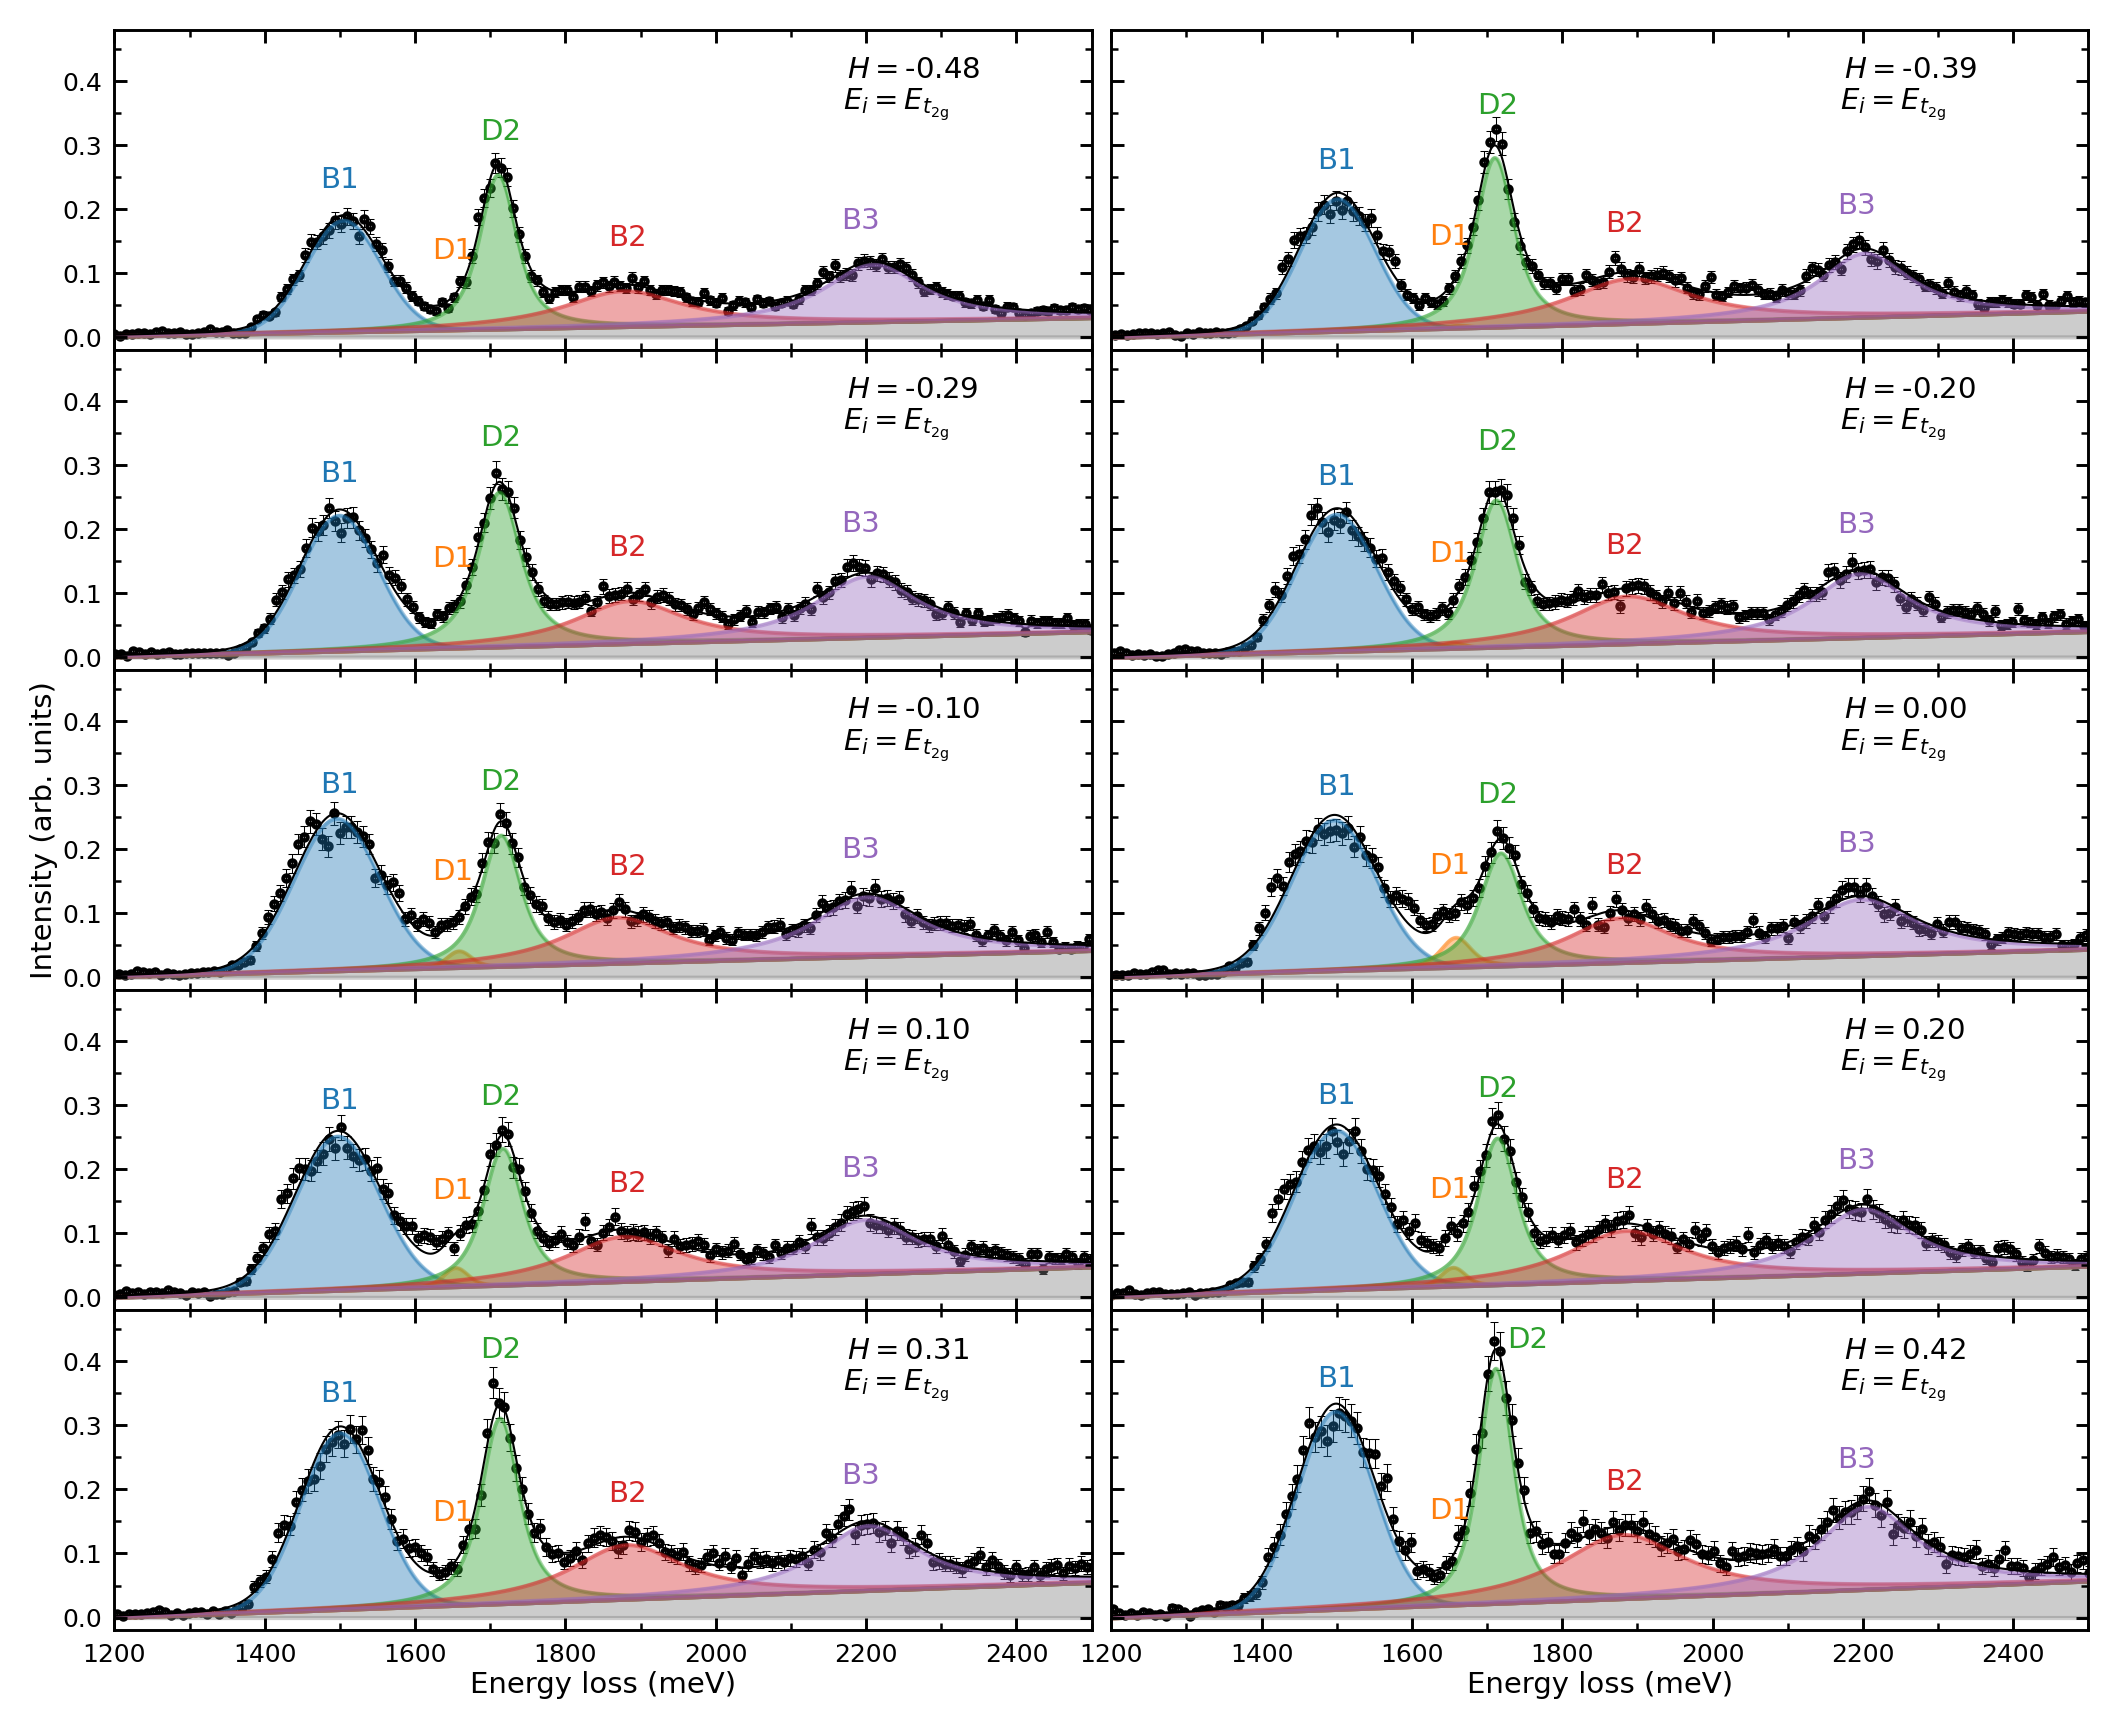

In [24]:
fig, axs = plt.subplots(5, 2, dpi=dpi, figsize=(7,5.8), sharex=True, sharey=True,
                        gridspec_kw=dict(wspace=0.02, hspace=0, left=0.05, right=0.99, bottom=0.07, top=0.99,)
                       )

markersize = 1.5
alpha = 0.4

Hs = spectra_thdep_data['H'][:]
for i, H in enumerate(Hs):
    figIndex0 = i // 2
    figIndex1 = i % 2
    
    x = spectra_thdep_data['E0']['spectra_H_{:.2f}_2pt_per_pixel'.format(H)]['eloss'][:]
    y = spectra_thdep_data['E0']['spectra_H_{:.2f}_2pt_per_pixel'.format(H)]['intensity'][:]
    yerr = spectra_thdep_data['E0']['spectra_H_{:.2f}_2pt_per_pixel'.format(H)]['error'][:]
    
    axs[figIndex0,figIndex1].errorbar(x, y, yerr=yerr,marker='o', fillstyle='none', color='k', ls='',markersize=markersize,
                                      elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=1,zorder=0)
      
    # plot the fit results
    x = spectra_thdep_fits['E0']['fits_H_{:.2f}'.format(H)]['exciton']['x'][:]
    y = spectra_thdep_fits['E0']['fits_H_{:.2f}'.format(H)]['exciton']['y'][:]
    axs[figIndex0,figIndex1].plot(x, y,'-',color='k',zorder=2)
    
    background = spectra_thdep_fits['E0']['fits_H_{:.2f}'.format(H)]['exciton']['bckg'][:]
    axs[figIndex0,figIndex1].plot(x, background,'-',zorder=1, alpha=alpha, color=color_background,)
    axs[figIndex0,figIndex1].fill_between(x, background, y2=0, alpha=alpha, color=color_background,)
    y = spectra_thdep_fits['E0']['fits_H_{:.2f}'.format(H)]['exciton']['peak0'][:]
    axs[figIndex0,figIndex1].plot(x, y+background,'-',color=color_B1,zorder=1, alpha=alpha)
    axs[figIndex0,figIndex1].fill_between(x, y+background, y2=background, color=color_B1, alpha=alpha)
    y = spectra_thdep_fits['E0']['fits_H_{:.2f}'.format(H)]['exciton']['peak1'][:]
    axs[figIndex0,figIndex1].plot(x, y+background,'-',color=color_D1,zorder=1, alpha=alpha)
    axs[figIndex0,figIndex1].fill_between(x, y+background, y2=background, color=color_D1, alpha=alpha)
    y = spectra_thdep_fits['E0']['fits_H_{:.2f}'.format(H)]['exciton']['peak2'][:]
    axs[figIndex0,figIndex1].plot(x, y+background,'-',color=color_D2,zorder=1, alpha=alpha)
    axs[figIndex0,figIndex1].fill_between(x, y+background, y2=background, color=color_D2, alpha=alpha)
    y = spectra_thdep_fits['E0']['fits_H_{:.2f}'.format(H)]['exciton']['peak3'][:]
    axs[figIndex0,figIndex1].plot(x, y+background,'-',color=color_B2,zorder=1, alpha=alpha)
    axs[figIndex0,figIndex1].fill_between(x, y+background, y2=background, color=color_B2, alpha=alpha)
    y = spectra_thdep_fits['E0']['fits_H_{:.2f}'.format(H)]['exciton']['peak4'][:]
    axs[figIndex0,figIndex1].plot(x, y+background,'-',color=color_B3,zorder=1, alpha=alpha)
    axs[figIndex0,figIndex1].fill_between(x, y+background, y2=background, color=color_B3, alpha=alpha)
    
     
    # label
    axs[figIndex0,figIndex1].text(x=0.75, y=0.85, s='$H=${:.2f}'.format(Hs[i]), 
                                  transform=axs[figIndex0,figIndex1].transAxes, color='k')
    axs[figIndex0,figIndex1].text(x=0.746, y=0.75, s=r'$E_i = E_{t_{\rm 2g}}$', 
                                  transform=axs[figIndex0,figIndex1].transAxes, color='k')
    
    centers = np.array([1.5, 1.65, 1.714, 1.883, 2.192])*1e3
    labels = ['B1', 'D1', 'D2', 'B2', 'B3']
    colors = ['C0', 'C1', 'C2', 'C3', 'C4', ]
    x = spectra_thdep_data['E0']['spectra_H_{:.2f}_2pt_per_pixel'.format(H)]['eloss'][:]
    y = spectra_thdep_data['E0']['spectra_H_{:.2f}_2pt_per_pixel'.format(H)]['intensity'][:]
    for j, x0 in enumerate(centers):
        y0 = y[np.where((x>x0-25) & (x<x0+25))].mean() + 0.06
        if j == 2:
            if i < 8:
                y0 += 0.02
            if i == 8:
                y0 += 0.04
            if i == 9:
                x0 += 40
        axs[figIndex0,figIndex1].text(x=x0, y=y0, s=labels[j], ha='center', color=colors[j])


# axis label
for i in range(2):
    axs[4,i].set_xlabel('Energy loss (meV)')
axs[2,0].set_ylabel('Intensity (arb. units)')


# axis range
for ax in axs.flatten():
    ax.vlines(x=0, ymin=-0.2, ymax=6.5, ls='--', colors='k',)
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
axs[0,0].set_xlim(1200,2500)
axs[0,0].set_ylim(-0.02,0.48)

# fig.savefig('SI_dispersion_excitons_fits_Et2g.pdf', dpi=dpi)

# SI Figure 8, fits of dispersion, E = 576.3 eV

(-0.02, 0.48)

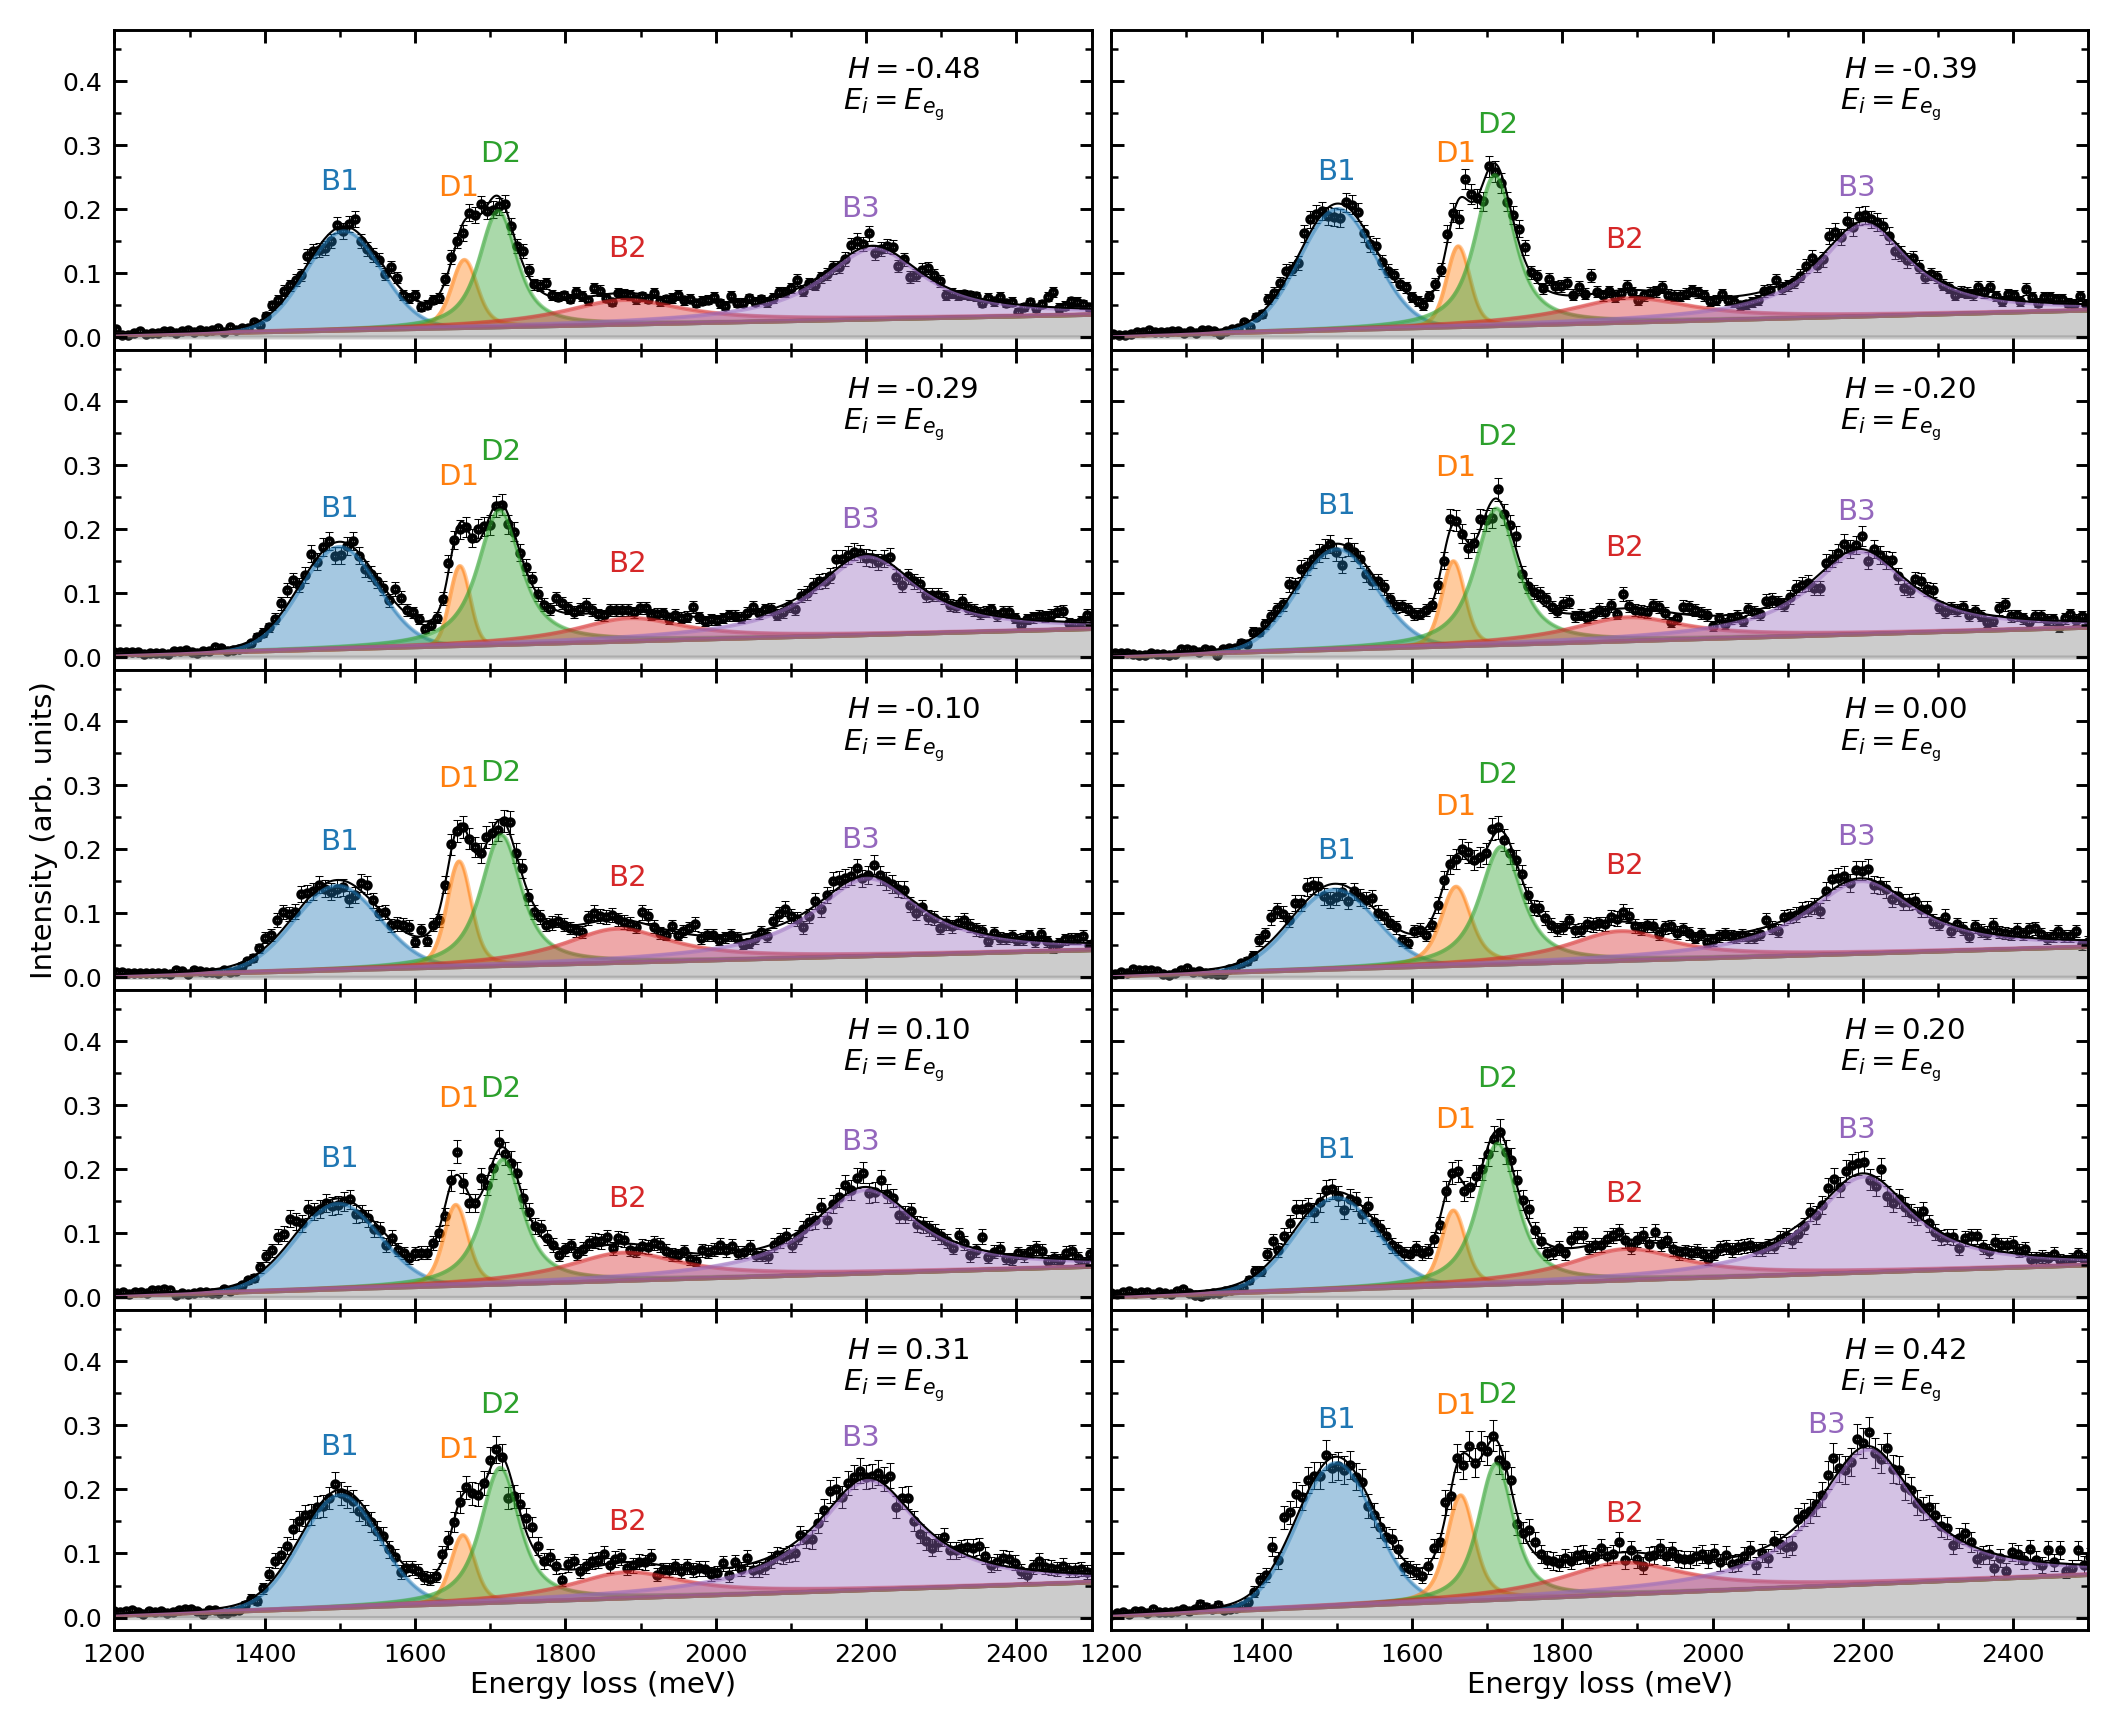

In [25]:
fig, axs = plt.subplots(5, 2, dpi=dpi, figsize=(7,5.8), sharex=True, sharey=True,
                        gridspec_kw=dict(wspace=0.02, hspace=0, left=0.05, right=0.99, bottom=0.07, top=0.99,)
                       )

markersize = 1.5
alpha = 0.4


Hs = spectra_thdep_data['H'][:]
for i, H in enumerate(Hs):
    figIndex0 = i // 2
    figIndex1 = i % 2
    
    x = spectra_thdep_data['E1']['spectra_H_{:.2f}_2pt_per_pixel'.format(H)]['eloss'][:]
    y = spectra_thdep_data['E1']['spectra_H_{:.2f}_2pt_per_pixel'.format(H)]['intensity'][:]
    yerr = spectra_thdep_data['E1']['spectra_H_{:.2f}_2pt_per_pixel'.format(H)]['error'][:]
    
    axs[figIndex0,figIndex1].errorbar(x, y, yerr=yerr,marker='o', fillstyle='none', color='k', ls='',markersize=markersize,
                                      elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=1,zorder=0)
      
    # plot the fit results
    x = spectra_thdep_fits['E1']['fits_H_{:.2f}'.format(H)]['exciton']['x'][:]
    y = spectra_thdep_fits['E1']['fits_H_{:.2f}'.format(H)]['exciton']['y'][:]
    axs[figIndex0,figIndex1].plot(x, y,'-',color='k',zorder=2)
    
    background = spectra_thdep_fits['E1']['fits_H_{:.2f}'.format(H)]['exciton']['bckg'][:]
    axs[figIndex0,figIndex1].plot(x, background,'-',zorder=1, alpha=alpha, color=color_background,)
    axs[figIndex0,figIndex1].fill_between(x, background, y2=0, alpha=alpha, color=color_background,)
    y = spectra_thdep_fits['E1']['fits_H_{:.2f}'.format(H)]['exciton']['peak0'][:]
    axs[figIndex0,figIndex1].plot(x, y+background,'-',color=color_B1,zorder=1, alpha=alpha)
    axs[figIndex0,figIndex1].fill_between(x, y+background, y2=background, color=color_B1, alpha=alpha)
    y = spectra_thdep_fits['E1']['fits_H_{:.2f}'.format(H)]['exciton']['peak1'][:]
    axs[figIndex0,figIndex1].plot(x, y+background,'-',color=color_D1,zorder=1, alpha=alpha)
    axs[figIndex0,figIndex1].fill_between(x, y+background, y2=background, color=color_D1, alpha=alpha)
    y = spectra_thdep_fits['E1']['fits_H_{:.2f}'.format(H)]['exciton']['peak2'][:]
    axs[figIndex0,figIndex1].plot(x, y+background,'-',color=color_D2,zorder=1, alpha=alpha)
    axs[figIndex0,figIndex1].fill_between(x, y+background, y2=background, color=color_D2, alpha=alpha)
    y = spectra_thdep_fits['E1']['fits_H_{:.2f}'.format(H)]['exciton']['peak3'][:]
    axs[figIndex0,figIndex1].plot(x, y+background,'-',color=color_B2,zorder=1, alpha=alpha)
    axs[figIndex0,figIndex1].fill_between(x, y+background, y2=background, color=color_B2, alpha=alpha)
    y = spectra_thdep_fits['E1']['fits_H_{:.2f}'.format(H)]['exciton']['peak4'][:]
    axs[figIndex0,figIndex1].plot(x, y+background,'-',color=color_B3,zorder=1, alpha=alpha)
    axs[figIndex0,figIndex1].fill_between(x, y+background, y2=background, color=color_B3, alpha=alpha)
    
     
    # label
    axs[figIndex0,figIndex1].text(x=0.75, y=0.85, s='$H=${:.2f}'.format(Hs[i]), 
                                  transform=axs[figIndex0,figIndex1].transAxes, color='k')
    axs[figIndex0,figIndex1].text(x=0.746, y=0.75, s=r'$E_i = E_{e_{\rm g}}$', 
                                  transform=axs[figIndex0,figIndex1].transAxes, color='k')
    
    centers = np.array([1.5, 1.658, 1.714, 1.883, 2.192])*1e3
    labels = ['B1', 'D1', 'D2', 'B2', 'B3']
    colors = ['C0', 'C1', 'C2', 'C3', 'C4', ]
    x = spectra_thdep_data['E1']['spectra_H_{:.2f}_2pt_per_pixel'.format(H)]['eloss'][:]
    y = spectra_thdep_data['E1']['spectra_H_{:.2f}_2pt_per_pixel'.format(H)]['intensity'][:]
    for j, x0 in enumerate(centers):
        y0 = y[np.where((x>x0-5) & (x<x0+5))].mean() + 0.06
        if j == 1 or j == 2:
            y0 += 0.01
            if i == 1 and j == 1:
                y0 += 0.01
            if i == 9 and j == 2:
                y0 += 0.02
        if j == 4:
            y0 -= 0.02
            if i == 9:
                y0 -= 0.03
                x0 -= 40
        axs[figIndex0,figIndex1].text(x=x0, y=y0, s=labels[j], ha='center', color=colors[j])


# axis label
for i in range(2):
    axs[4,i].set_xlabel('Energy loss (meV)')
axs[2,0].set_ylabel('Intensity (arb. units)')


# axis range
for ax in axs.flatten():
    ax.vlines(x=0, ymin=-0.2, ymax=6.5, ls='--', colors='k',)
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
axs[0,0].set_xlim(1200,2500)
axs[0,0].set_ylim(-0.02,0.48)

# fig.savefig('SI_dispersion_excitons_fits_Eeg.pdf', dpi=dpi)

# SI Figure 9, dispersion of bright excitons

Text(-0.23, 0.96, '(c)')

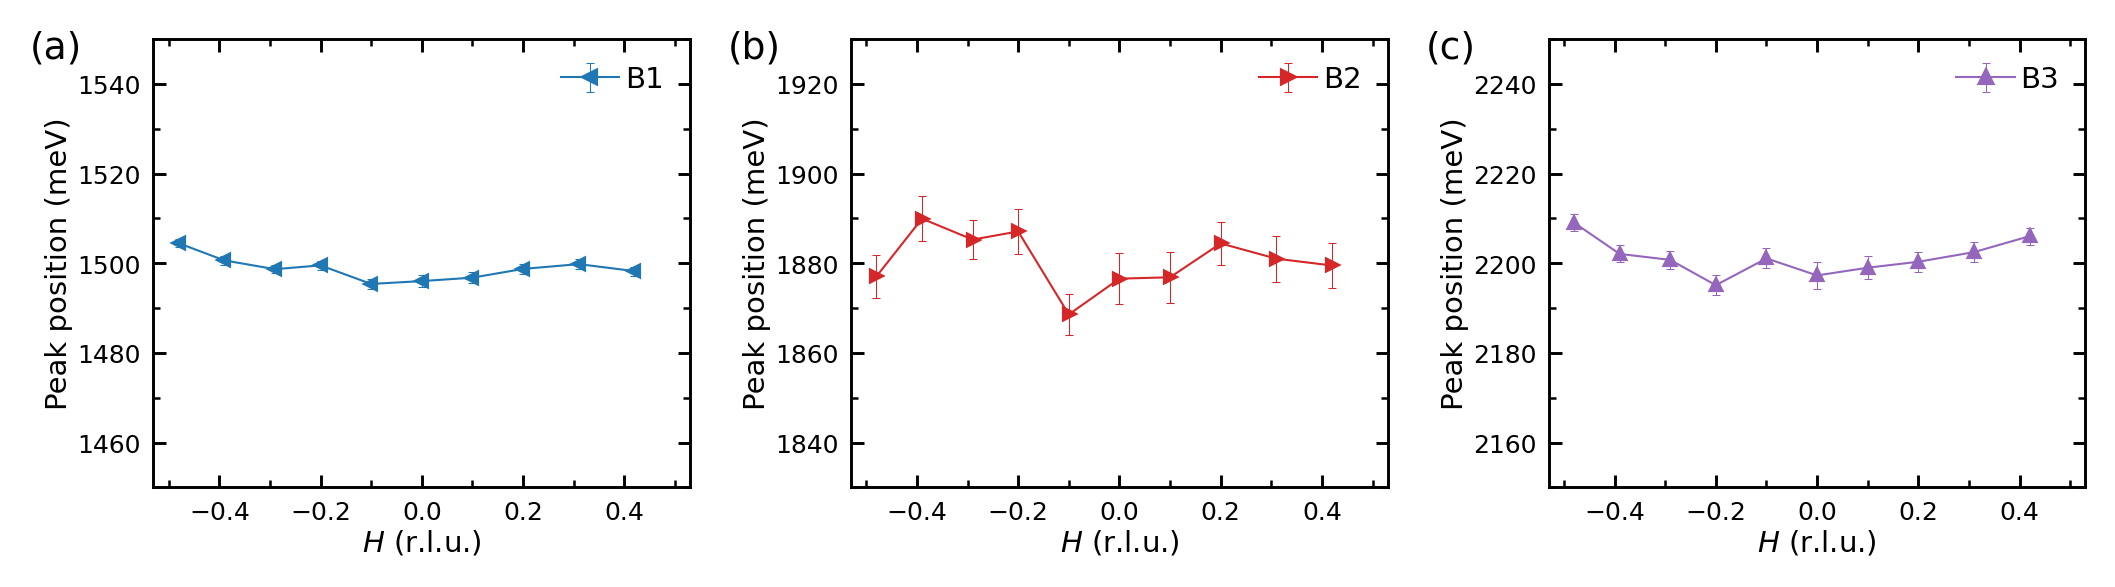

In [26]:
fig, axs = plt.subplots(1, 3, dpi=dpi, figsize=(7, 1.8), 
                        gridspec_kw=dict(wspace=0.3, left=0.07, right=0.99, bottom=0.15, top=0.98)
                       )

markersize = 2.5

x = thdep_fit_result['center']['B1']['x'][:]
y = thdep_fit_result['center']['B1']['y'][:]
y_low = thdep_fit_result['center']['B1']['y_low'][:]
y_high = thdep_fit_result['center']['B1']['y_high'][:]
axs[0].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='B1', marker=marker_B1, color=color_B1, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
x = thdep_fit_result['center']['B2']['x'][:]
y = thdep_fit_result['center']['B2']['y'][:]
y_low = thdep_fit_result['center']['B2']['y_low'][:]
y_high = thdep_fit_result['center']['B2']['y_high'][:]
axs[1].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='B2', marker=marker_B2, color=color_B2, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)
x = thdep_fit_result['center']['B3']['x'][:]
y = thdep_fit_result['center']['B3']['y'][:]
y_low = thdep_fit_result['center']['B3']['y_low'][:]
y_high = thdep_fit_result['center']['B3']['y_high'][:]
axs[2].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='B3', marker=marker_B3, color=color_B3, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)

for ax in axs:
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

for ax in axs:
    ax.set_xlim(-0.53, 0.53)
axs[0].set_ylim(1450,1550)
axs[1].set_ylim(1830,1930)
axs[2].set_ylim(2150,2250)


# axis label
for ax in axs:
    ax.set_xlabel('$H$ (r.l.u.)')
    ax.set_ylabel('Peak position (meV)')

# legend
for ax in axs:
    ax.legend()

# label
x = -0.23
y = 0.96
axs[0].text(x=x, y=y, s='(a)', fontdict=dict(fontsize=9), transform=axs[0].transAxes, color='k')
axs[1].text(x=x, y=y, s='(b)', fontdict=dict(fontsize=9), transform=axs[1].transAxes, color='k')
axs[2].text(x=x, y=y, s='(c)', fontdict=dict(fontsize=9), transform=axs[2].transAxes, color='k')


# fig.savefig('SI_dispersion_bright_excitons.pdf', dpi=dpi)

# SI Figure 10, fits of T-dep, E = 575.1 eV

In [27]:
spectra_Tdep1_data = h5_file('data/RIXS_data/Tdep1_1dSpectra.hdf', 'r')
spectra_Tdep1_fits = h5_file('data/RIXS_fits/Tdep1_fits.hdf', 'r')
spectra_Tdep2_data = h5_file('data/RIXS_data/Tdep2_1dSpectra.hdf', 'r')
spectra_Tdep2_fits = h5_file('data/RIXS_fits/Tdep2_fits.hdf', 'r')

Text(-0.12, 0.99, '(d)')

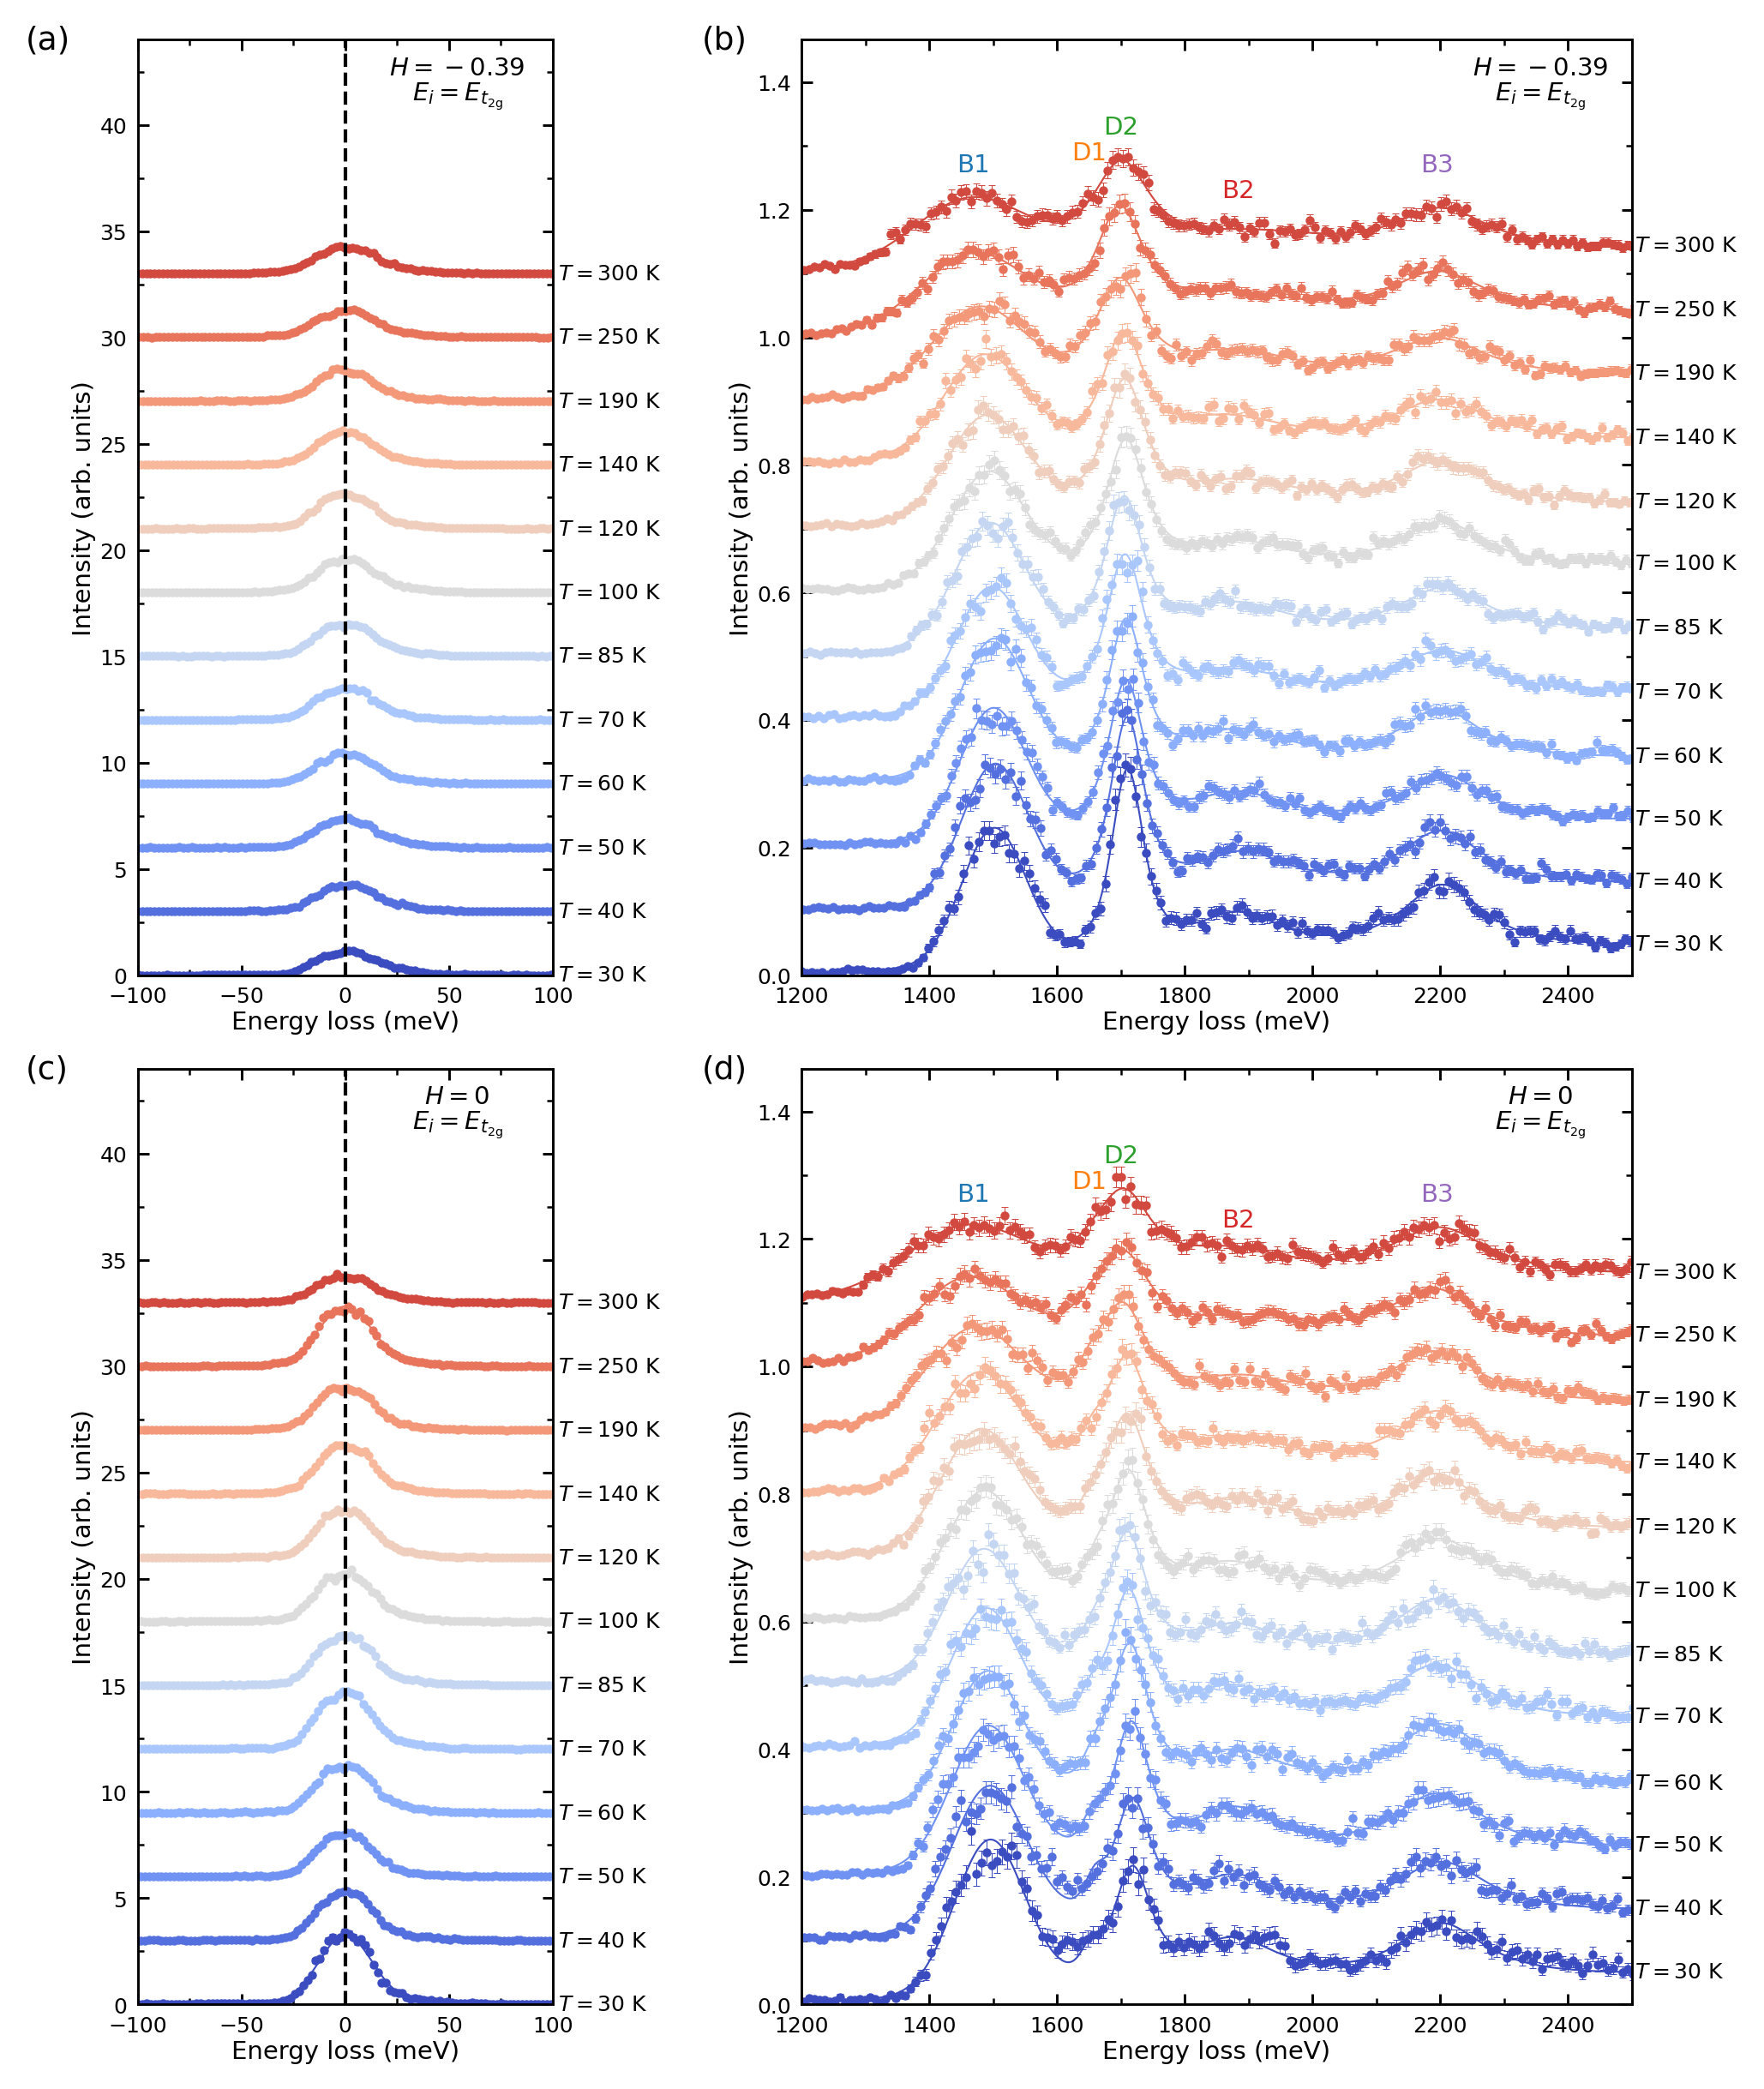

In [28]:
fig, axs = plt.subplots(2, 2, dpi=dpi, figsize=(7, 8), 
                        gridspec_kw=dict(wspace=0.4, hspace=0.1, left=0.07, right=0.9, bottom=0.035, top=0.99, width_ratios=[1, 2],)
                       )

markersize = 1.5
alpha = 1
cmap = gen_cmap(13, cmap='coolwarm')

yshift = 3
Ts = spectra_Tdep1_data['T'][:]
for i, T in enumerate(Ts):
    x = spectra_Tdep1_data['E0']['spectra_T_{:.0f}K_8pt_per_pixel'.format(T)]['eloss'][:]
    y = spectra_Tdep1_data['E0']['spectra_T_{:.0f}K_8pt_per_pixel'.format(T)]['intensity'][:]
    yerr = spectra_Tdep1_data['E0']['spectra_T_{:.0f}K_8pt_per_pixel'.format(T)]['error'][:]
        
    axs[0,0].errorbar(x, y+yshift*i, yerr=yerr,marker='o', color=cmap(i), ls='',markersize=markersize,
                      elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)
      
    # plot the fit results
    x = spectra_Tdep1_fits['E0']['fits_T{:.0f}'.format(T)]['elastic']['x'][:]
    y = spectra_Tdep1_fits['E0']['fits_T{:.0f}'.format(T)]['elastic']['y'][:]
    axs[0,0].plot(x, y+yshift*i,'-',color=cmap(i))
    

    # label
    axs[0,0].text(102.5, y[np.where(x>100)][0]+yshift*i, s='$T=${:.0f} K'.format(T), va='center', fontsize=6, color='k')

yshift = 0.1
Es = spectra_Edep_LH_data['Ei'][:]
for i, T in enumerate(Ts):
    x = spectra_Tdep1_data['E0']['spectra_T_{:.0f}K_2pt_per_pixel'.format(T)]['eloss'][:]
    y = spectra_Tdep1_data['E0']['spectra_T_{:.0f}K_2pt_per_pixel'.format(T)]['intensity'][:]
    yerr = spectra_Tdep1_data['E0']['spectra_T_{:.0f}K_2pt_per_pixel'.format(T)]['error'][:]
        
    axs[0,1].errorbar(x, y+yshift*i, yerr=yerr,marker='o', color=cmap(i), ls='',markersize=markersize,
                      elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)
      
    # plot the fit results
    x = spectra_Tdep1_fits['E0']['fits_T{:.0f}'.format(T)]['exciton']['x'][:]
    y = spectra_Tdep1_fits['E0']['fits_T{:.0f}'.format(T)]['exciton']['y'][:]
    axs[0,1].plot(x, y+yshift*i,'-',color=cmap(i))
    
    # label
    axs[0,1].text(2505, y[np.where(x>2500)][0]+yshift*i, s='$T=${:.0f} K'.format(T), va='center', fontsize=6, color='k')


yshift = 3
Ts = spectra_Tdep2_data['T'][:]
for i, T in enumerate(Ts):
    x = spectra_Tdep2_data['E0']['spectra_T_{:.0f}K_8pt_per_pixel'.format(T)]['eloss'][:]
    y = spectra_Tdep2_data['E0']['spectra_T_{:.0f}K_8pt_per_pixel'.format(T)]['intensity'][:]
    yerr = spectra_Tdep2_data['E0']['spectra_T_{:.0f}K_8pt_per_pixel'.format(T)]['error'][:]
        
    axs[1,0].errorbar(x, y+yshift*i, yerr=yerr,marker='o', color=cmap(i), ls='',markersize=markersize,
                      elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)
      
    # plot the fit results
    x = spectra_Tdep2_fits['E0']['fits_T{:.0f}'.format(T)]['elastic']['x'][:]
    y = spectra_Tdep2_fits['E0']['fits_T{:.0f}'.format(T)]['elastic']['y'][:]
    axs[1,0].plot(x, y+yshift*i,'-',color=cmap(i))
    

    # label
    axs[1,0].text(102.5, y[np.where(x>100)][0]+yshift*i, s='$T=${:.0f} K'.format(T), va='center', fontsize=6, color='k')

yshift = 0.1
Es = spectra_Edep_LH_data['Ei'][:]
for i, T in enumerate(Ts):
    x = spectra_Tdep2_data['E0']['spectra_T_{:.0f}K_2pt_per_pixel'.format(T)]['eloss'][:]
    y = spectra_Tdep2_data['E0']['spectra_T_{:.0f}K_2pt_per_pixel'.format(T)]['intensity'][:]
    yerr = spectra_Tdep2_data['E0']['spectra_T_{:.0f}K_2pt_per_pixel'.format(T)]['error'][:]
        
    axs[1,1].errorbar(x, y+yshift*i, yerr=yerr,marker='o', color=cmap(i), ls='',markersize=markersize,
                      elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)
      
    # plot the fit results
    x = spectra_Tdep2_fits['E0']['fits_T{:.0f}'.format(T)]['exciton']['x'][:]
    y = spectra_Tdep2_fits['E0']['fits_T{:.0f}'.format(T)]['exciton']['y'][:]
    axs[1,1].plot(x, y+yshift*i,'-',color=cmap(i))
    
    # label
    axs[1,1].text(2505, y[np.where(x>2500)][0]+yshift*i, s='$T=${:.0f} K'.format(T), va='center', fontsize=6, color='k')
    
    
ls='--'
axs[0,0].axvline(x=0, ls=ls, lw=1, color='k', zorder=3)
axs[1,0].axvline(x=0, ls=ls, lw=1, color='k', zorder=3)
    

labels = ['B1', 'D1', 'D2', 'B2', 'B3']
colors = ['C0', 'C1', 'C2', 'C3', 'C4', ]
centers = [1468, 1650, 1700, 1884, 2195]
ys = [1.27, 1.29, 1.33, 1.23, 1.27]
for i, center in enumerate(centers):
    axs[0,1].text(x=center, y=ys[i], s=labels[i], va='center', ha='center', color=colors[i])
    axs[1,1].text(x=center, y=ys[i], s=labels[i], va='center', ha='center', color=colors[i])
       
x = 0.77
y = 0.97
axs[0,0].text(x, y, s='$H=-0.39$', transform=axs[0,0].transAxes, color='k', va='center',ha='center')
axs[1,0].text(x, y, s='$H=0$', transform=axs[1,0].transAxes, color='k', va='center',ha='center')
y = 0.94
axs[0,0].text(x, y, s=r'$E_i = E_{t_{\rm 2g}}$', transform=axs[0,0].transAxes, color='k', va='center',ha='center')
axs[1,0].text(x, y, s=r'$E_i = E_{t_{\rm 2g}}$', transform=axs[1,0].transAxes, color='k', va='center',ha='center')
x = 0.89
y = 0.97
axs[0,1].text(x, y, s='$H=-0.39$', transform=axs[0,1].transAxes, color='k', va='center',ha='center')
axs[1,1].text(x, y, s='$H=0$', transform=axs[1,1].transAxes, color='k', va='center',ha='center')
y = 0.94
axs[0,1].text(x, y, s=r'$E_i = E_{t_{\rm 2g}}$', transform=axs[0,1].transAxes, color='k', va='center',ha='center')
axs[1,1].text(x, y, s=r'$E_i = E_{t_{\rm 2g}}$', transform=axs[1,1].transAxes, color='k', va='center',ha='center')


for ax in axs.flatten():
    ax.set_xlabel('Energy loss (meV)')
    ax.set_ylabel('Intensity (arb. units)')
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    
# axis range
for ax in axs[:,0]:
    ax.set_ylim(0,44)
    ax.set_xlim(-100,100)
for ax in axs[:,1]:
    ax.set_ylim(0,44/30)
    ax.set_xlim(1200,2500)


# label
x = -0.27
y = 0.99
axs[0,0].text(x=x, y=y, s='(a)', fontdict=dict(fontsize=9), transform=axs[0,0].transAxes, color='k')
axs[1,0].text(x=x, y=y, s='(c)', fontdict=dict(fontsize=9), transform=axs[1,0].transAxes, color='k')
x = -0.12
axs[0,1].text(x=x, y=y, s='(b)', fontdict=dict(fontsize=9), transform=axs[0,1].transAxes, color='k')
axs[1,1].text(x=x, y=y, s='(d)', fontdict=dict(fontsize=9), transform=axs[1,1].transAxes, color='k')

# fig.savefig('SI_Tdep_fits_Et2g.pdf', dpi=dpi)

# SI Figure 11, fits of T-dep, E = 576.3 eV

Text(-0.12, 0.99, '(d)')

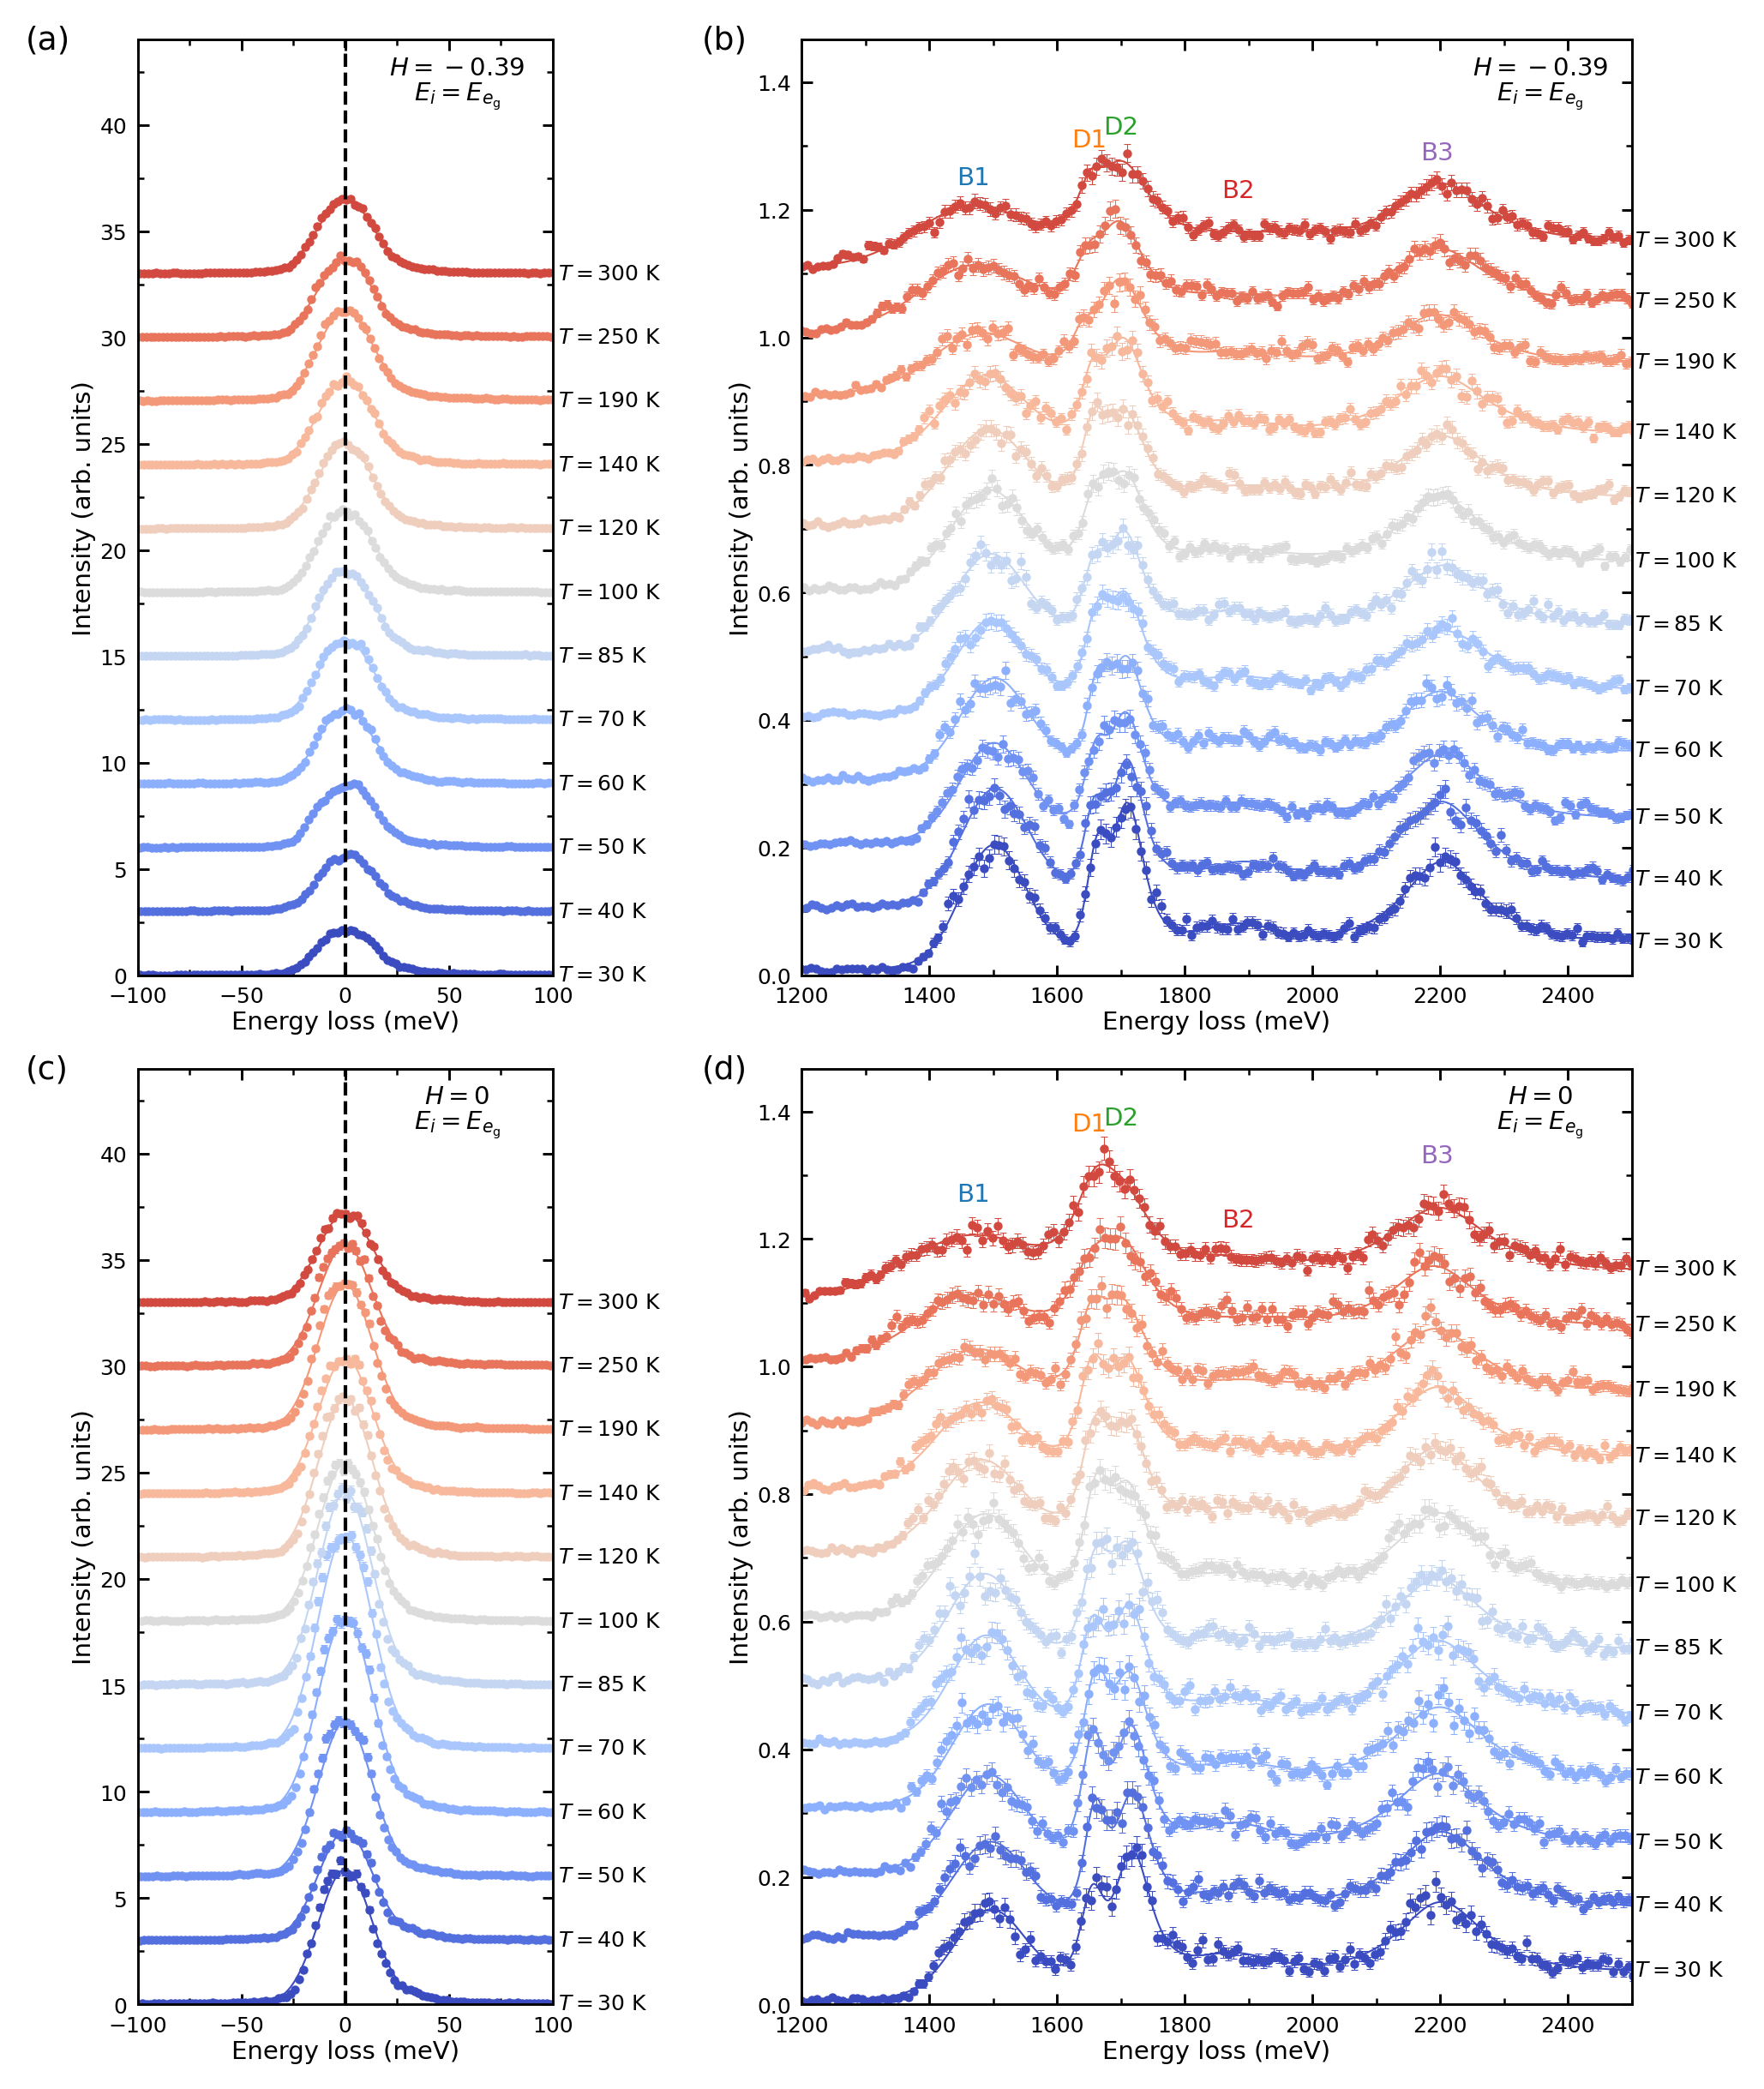

In [29]:
fig, axs = plt.subplots(2, 2, dpi=dpi, figsize=(7, 8), 
                        gridspec_kw=dict(wspace=0.4, hspace=0.1, left=0.07, right=0.9, bottom=0.035, top=0.99, width_ratios=[1, 2],)
                       )
markersize = 1.5
alpha = 1
cmap = gen_cmap(13, cmap='coolwarm')

yshift = 3
Ts = spectra_Tdep1_data['T'][:]
for i, T in enumerate(Ts):
    x = spectra_Tdep1_data['E1']['spectra_T_{:.0f}K_8pt_per_pixel'.format(T)]['eloss'][:]
    y = spectra_Tdep1_data['E1']['spectra_T_{:.0f}K_8pt_per_pixel'.format(T)]['intensity'][:]
    yerr = spectra_Tdep1_data['E1']['spectra_T_{:.0f}K_8pt_per_pixel'.format(T)]['error'][:]
        
    axs[0,0].errorbar(x, y+yshift*i, yerr=yerr,marker='o', color=cmap(i), ls='',markersize=markersize,
                      elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)
      
    # plot the fit results
    x = spectra_Tdep1_fits['E1']['fits_T{:.0f}'.format(T)]['elastic']['x'][:]
    y = spectra_Tdep1_fits['E1']['fits_T{:.0f}'.format(T)]['elastic']['y'][:]
    axs[0,0].plot(x, y+yshift*i,'-',color=cmap(i))
    

    # label
    axs[0,0].text(102.5, y[np.where(x>100)][0]+yshift*i, s='$T=${:.0f} K'.format(T), va='center', fontsize=6, color='k')

yshift = 0.1
Es = spectra_Edep_LH_data['Ei'][:]
for i, T in enumerate(Ts):
    x = spectra_Tdep1_data['E1']['spectra_T_{:.0f}K_2pt_per_pixel'.format(T)]['eloss'][:]
    y = spectra_Tdep1_data['E1']['spectra_T_{:.0f}K_2pt_per_pixel'.format(T)]['intensity'][:]
    yerr = spectra_Tdep1_data['E1']['spectra_T_{:.0f}K_2pt_per_pixel'.format(T)]['error'][:]
        
    axs[0,1].errorbar(x, y+yshift*i, yerr=yerr,marker='o', color=cmap(i), ls='',markersize=markersize,
                      elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)
      
    # plot the fit results
    x = spectra_Tdep1_fits['E1']['fits_T{:.0f}'.format(T)]['exciton']['x'][:]
    y = spectra_Tdep1_fits['E1']['fits_T{:.0f}'.format(T)]['exciton']['y'][:]
    axs[0,1].plot(x, y+yshift*i,'-',color=cmap(i))
    
    # label
    axs[0,1].text(2505, y[np.where(x>2500)][0]+yshift*i, s='$T=${:.0f} K'.format(T), va='center', fontsize=6, color='k')

yshift = 3
Ts = spectra_Tdep2_data['T'][:]
for i, T in enumerate(Ts):
    x = spectra_Tdep2_data['E1']['spectra_T_{:.0f}K_8pt_per_pixel'.format(T)]['eloss'][:]
    y = spectra_Tdep2_data['E1']['spectra_T_{:.0f}K_8pt_per_pixel'.format(T)]['intensity'][:]
    yerr = spectra_Tdep2_data['E1']['spectra_T_{:.0f}K_8pt_per_pixel'.format(T)]['error'][:]
        
    axs[1,0].errorbar(x, y+yshift*i, yerr=yerr,marker='o', color=cmap(i), ls='',markersize=markersize,
                      elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)
      
    # plot the fit results
    x = spectra_Tdep2_fits['E1']['fits_T{:.0f}'.format(T)]['elastic']['x'][:]
    y = spectra_Tdep2_fits['E1']['fits_T{:.0f}'.format(T)]['elastic']['y'][:]
    axs[1,0].plot(x, y+yshift*i,'-',color=cmap(i))
    

    # label
    axs[1,0].text(102.5, y[np.where(x>100)][0]+yshift*i, s='$T=${:.0f} K'.format(T), va='center', fontsize=6, color='k')

yshift = 0.1
Es = spectra_Edep_LH_data['Ei'][:]
for i, T in enumerate(Ts):
    x = spectra_Tdep2_data['E1']['spectra_T_{:.0f}K_2pt_per_pixel'.format(T)]['eloss'][:]
    y = spectra_Tdep2_data['E1']['spectra_T_{:.0f}K_2pt_per_pixel'.format(T)]['intensity'][:]
    yerr = spectra_Tdep2_data['E1']['spectra_T_{:.0f}K_2pt_per_pixel'.format(T)]['error'][:]
        
    axs[1,1].errorbar(x, y+yshift*i, yerr=yerr,marker='o', color=cmap(i), ls='',markersize=markersize,
                      elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)
      
    # plot the fit results
    x = spectra_Tdep2_fits['E1']['fits_T{:.0f}'.format(T)]['exciton']['x'][:]
    y = spectra_Tdep2_fits['E1']['fits_T{:.0f}'.format(T)]['exciton']['y'][:]
    axs[1,1].plot(x, y+yshift*i,'-',color=cmap(i))
    
    # label
    axs[1,1].text(2505, y[np.where(x>2500)][0]+yshift*i, s='$T=${:.0f} K'.format(T), va='center', fontsize=6, color='k')
    
ls='--'
axs[0,0].axvline(x=0, ls=ls, lw=1, color='k', zorder=3)
axs[1,0].axvline(x=0, ls=ls, lw=1, color='k', zorder=3)
    

labels = ['B1', 'D1', 'D2', 'B2', 'B3']
colors = ['C0', 'C1', 'C2', 'C3', 'C4', ]
centers = [1468, 1650, 1700, 1884, 2195]
ys = [1.25, 1.31, 1.33, 1.23, 1.29]
for i, center in enumerate(centers):
    axs[0,1].text(x=center, y=ys[i], s=labels[i], va='center', ha='center', color=colors[i])
ys = [1.27, 1.38, 1.39, 1.23, 1.33]
for i, center in enumerate(centers):
    axs[1,1].text(x=center, y=ys[i], s=labels[i], va='center', ha='center', color=colors[i])
       
x = 0.77
y = 0.97
axs[0,0].text(x, y, s='$H=-0.39$', transform=axs[0,0].transAxes, color='k', va='center',ha='center')
axs[1,0].text(x, y, s='$H=0$', transform=axs[1,0].transAxes, color='k', va='center',ha='center')
y = 0.94
axs[0,0].text(x, y, s=r'$E_i = E_{e_{\rm g}}$', transform=axs[0,0].transAxes, color='k', va='center',ha='center')
axs[1,0].text(x, y, s=r'$E_i = E_{e_{\rm g}}$', transform=axs[1,0].transAxes, color='k', va='center',ha='center')
x = 0.89
y = 0.97
axs[0,1].text(x, y, s='$H=-0.39$', transform=axs[0,1].transAxes, color='k', va='center',ha='center')
axs[1,1].text(x, y, s='$H=0$', transform=axs[1,1].transAxes, color='k', va='center',ha='center')
y = 0.94
axs[0,1].text(x, y, s=r'$E_i = E_{e_{\rm g}}$', transform=axs[0,1].transAxes, color='k', va='center',ha='center')
axs[1,1].text(x, y, s=r'$E_i = E_{e_{\rm g}}$', transform=axs[1,1].transAxes, color='k', va='center',ha='center')


for ax in axs.flatten():
    ax.set_xlabel('Energy loss (meV)')
    ax.set_ylabel('Intensity (arb. units)')
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    
# axis range
for ax in axs[:,0]:
    ax.set_ylim(0,44)
    ax.set_xlim(-100,100)
for ax in axs[:,1]:
    ax.set_ylim(0,44/30)
    ax.set_xlim(1200,2500)

# label
x = -0.27
y = 0.99
axs[0,0].text(x=x, y=y, s='(a)', fontdict=dict(fontsize=9), transform=axs[0,0].transAxes, color='k')
axs[1,0].text(x=x, y=y, s='(c)', fontdict=dict(fontsize=9), transform=axs[1,0].transAxes, color='k')
x = -0.12
axs[0,1].text(x=x, y=y, s='(b)', fontdict=dict(fontsize=9), transform=axs[0,1].transAxes, color='k')
axs[1,1].text(x=x, y=y, s='(d)', fontdict=dict(fontsize=9), transform=axs[1,1].transAxes, color='k')

# fig.savefig('SI_Tdep_fits_Eeg.pdf', dpi=dpi)

# SI Figure 13, ED RIXS comparison

In [30]:
Atomic_Emap = h5_file('data/edrixs/Atomic_RIXS_Edep_LH.hdf', 'r')

Text(-0.17, 1.03, '(c)')

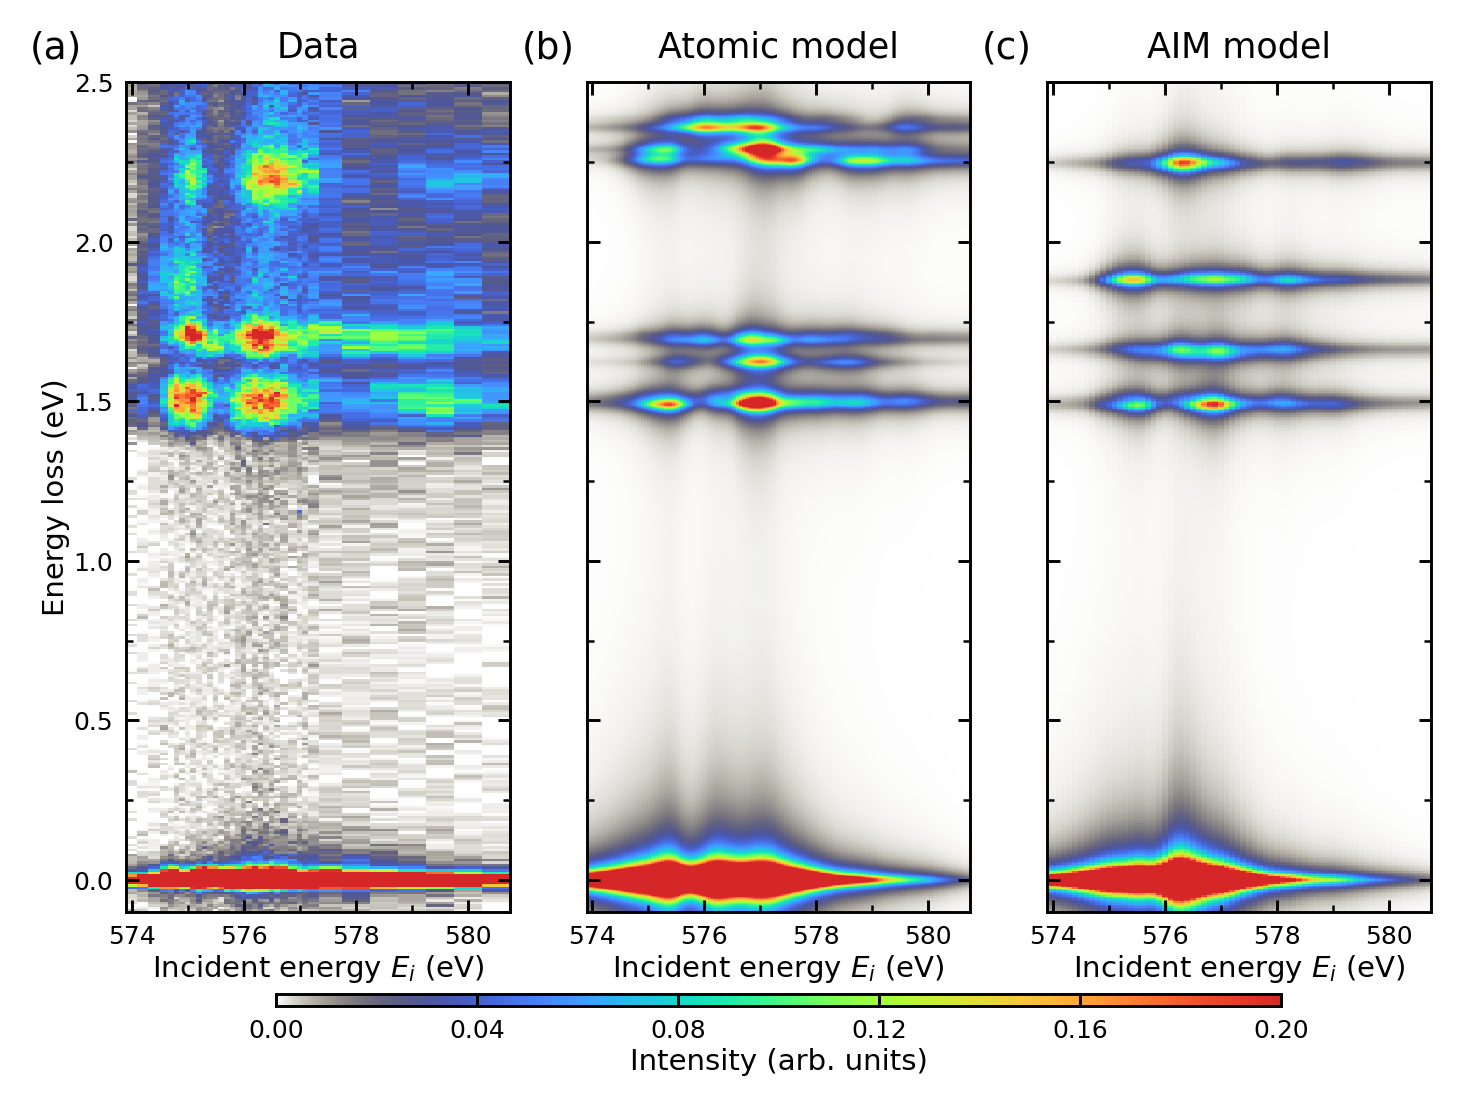

In [31]:
fig, axs = plt.subplots(1, 3, dpi=dpi, figsize=(5, 3.5), 
                        gridspec_kw=dict(wspace=0.2, left=0.08, right=0.95, bottom=0.16, top=0.95, width_ratios=[1, 1, 1],)
                       )
cax = fig.add_axes([0.08+0.1, 0.07, 0.95-0.08-0.1*2, 0.012]) # axis for colorbar

colormap=turbo_w()

ims = [0,0,0]
ims[0] = plot2d(ax=axs[0], x=Emap_data_LH['Ei'][:], y=Emap_data_LH['eloss'][:], Int=Emap_data_LH['intensity'][:], colormap=colormap, rasterized=True)
ims[1] = plot2d(ax=axs[1], x=Atomic_Emap['Ei'][:], y=Atomic_Emap['eloss'][:], Int=Atomic_Emap['intensity'][:]*scale_RIXS, colormap=colormap, rasterized=True)
ims[2] = plot2d(ax=axs[2], x=AIM_Emap['Ei'][:], y=AIM_Emap['eloss'][:], Int=AIM_Emap['intensity'][:]*scale_RIXS, colormap=colormap, rasterized=True)

# axis range and ticks
for ax in axs:
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
for ax in axs:
    ax.set_xlim(573.9, 580.75)
    ax.set_ylim(-0.1, 2.5)
axs[1].set_yticklabels([])
axs[2].set_yticklabels([])


# axis label
for ax in axs:
    ax.set_xlabel('Incident energy $E_i$ (eV)')
axs[0].set_ylabel('Energy loss (eV)')


# title
axs[0].set_title('Data',)
axs[1].set_title('Atomic model')
axs[2].set_title('AIM model')


# colorbar
for im in ims:
    im.set_clim(0, 0.2)
cbar = plt.colorbar(ims[0], cax=cax, orientation='horizontal')
cbar.set_ticks(np.arange(0, 0.21, 0.04))
cbar.set_label('Intensity (arb. units)')


# label
x = -0.25
y = 1.03
axs[0].text(x=x, y=y, s='(a)', fontdict=dict(fontsize=9), transform=axs[0].transAxes, color='k')
x = -0.17
axs[1].text(x=x, y=y, s='(b)', fontdict=dict(fontsize=9), transform=axs[1].transAxes, color='k')
x = -0.17
axs[2].text(x=x, y=y, s='(c)', fontdict=dict(fontsize=9), transform=axs[2].transAxes, color='k')


# fig.savefig('SI_ED.pdf', dpi=dpi)

# SI Figure 14, ED RIXS angular dependence

In [32]:
AIM_thdep = h5_file('data/edrixs/AIM_RIXS_thdep_LH.hdf', 'r')
data_thdep = h5_file('data/RIXS_fits/thdep_D1_amplitude.hdf', 'r')

Text(-0.19, 0.92, '(b)')

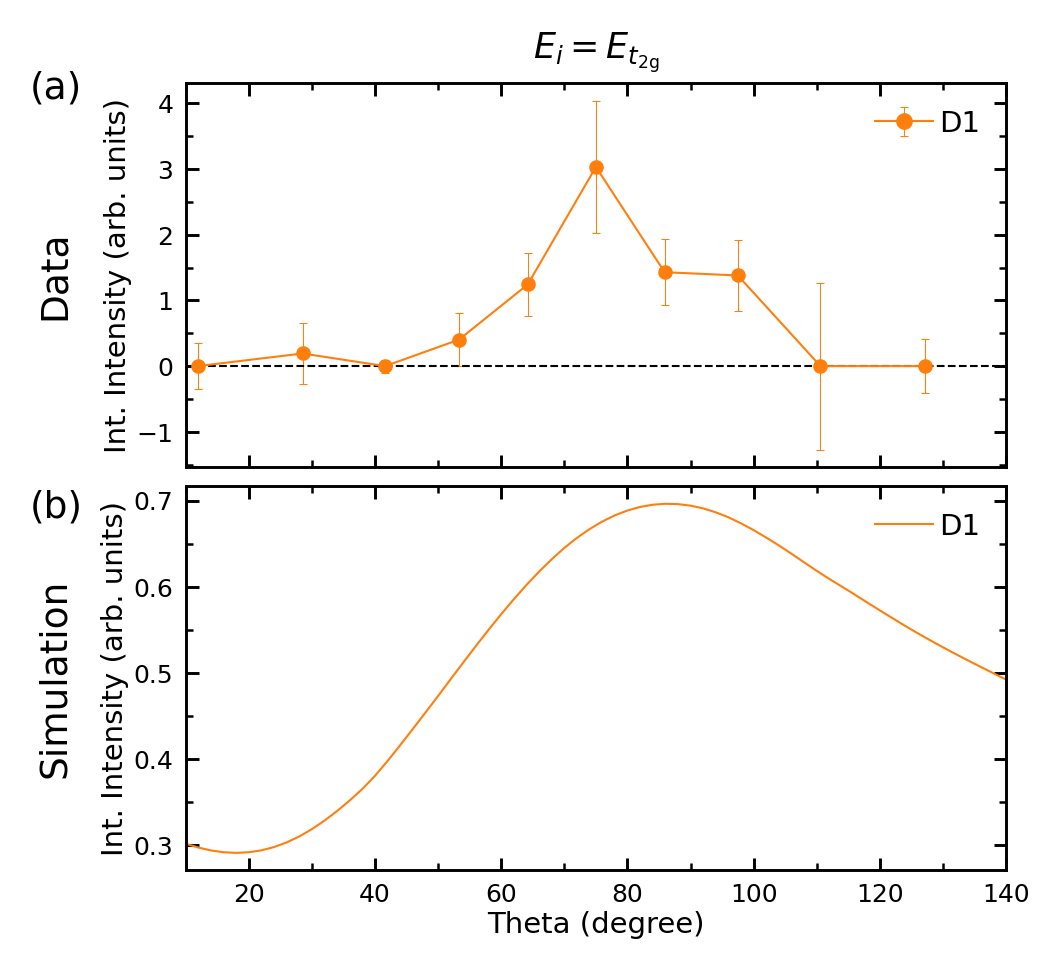

In [33]:
fig, axs = plt.subplots(2, 1, dpi=dpi, figsize=(3.375, 3.2),
                        gridspec_kw=dict(wspace=0.1, hspace=0.05, left=0.16, right=0.97, bottom=0.1, top=0.92)
                       )

markersize = 2.5

x = data_thdep['x'][:]
y = data_thdep['y'][:]
y_low = data_thdep['y_low'][:]
y_high = data_thdep['y_high'][:]
axs[0].errorbar(x, y, yerr=(y_low, y_high),fmt='-', label='D1', marker=marker_D1, color=color_D1, markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,)

axs[0].axhline(y=0, color='k', ls='--')


thins = AIM_thdep['theta'][:]
eloss = AIM_thdep['eloss'][:]
select = (eloss<1.653) & (eloss>1.62)
y = np.sum(AIM_thdep['intensity'][:,select], axis=1)*scale_RIXS
axs[1].plot(thins, y, label='D1', color=color_D1)

for ax in axs:
    ax.legend()

# axis range and ticks
for ax in axs:
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.set_xlim(10, 140)
axs[0].set_xticklabels([])

# title
axs[0].set_title(r'$E_i = E_{t_{\rm 2g}}$')

x = -0.16
y = 0.5
axs[0].text(x=x, y=y, s='Data', transform=axs[0].transAxes, fontsize=9, ha='center', va='center', rotation='vertical')
axs[1].text(x=x, y=y, s='Simulation', transform=axs[1].transAxes, fontsize=9, ha='center', va='center', rotation='vertical')

# axis label
for ax in axs:
    ax.set_ylabel('Int. Intensity (arb. units)')
    
axs[1].set_xlabel('Theta (degree)')

# label
x = -0.19
y = 0.96
axs[0].text(x=x, y=y, s='(a)', fontdict=dict(fontsize=9), transform=axs[0].transAxes, color='k')
y = 0.92
axs[1].text(x=x, y=y, s='(b)', fontdict=dict(fontsize=9), transform=axs[1].transAxes, color='k')

# fig.savefig('SI_ED_thdep.pdf', dpi=dpi)

# SI Figure 15, ED RIXS spin direction dependence

In [34]:
AIM_spin_dir_dep1 = h5_file('data/edrixs/AIM_RIXS_LH_spin_dir_dep1.hdf', 'r')
AIM_spin_dir_dep2 = h5_file('data/edrixs/AIM_RIXS_LH_spin_dir_dep2.hdf', 'r')

Text(-0.05, 0.92, '(d)')

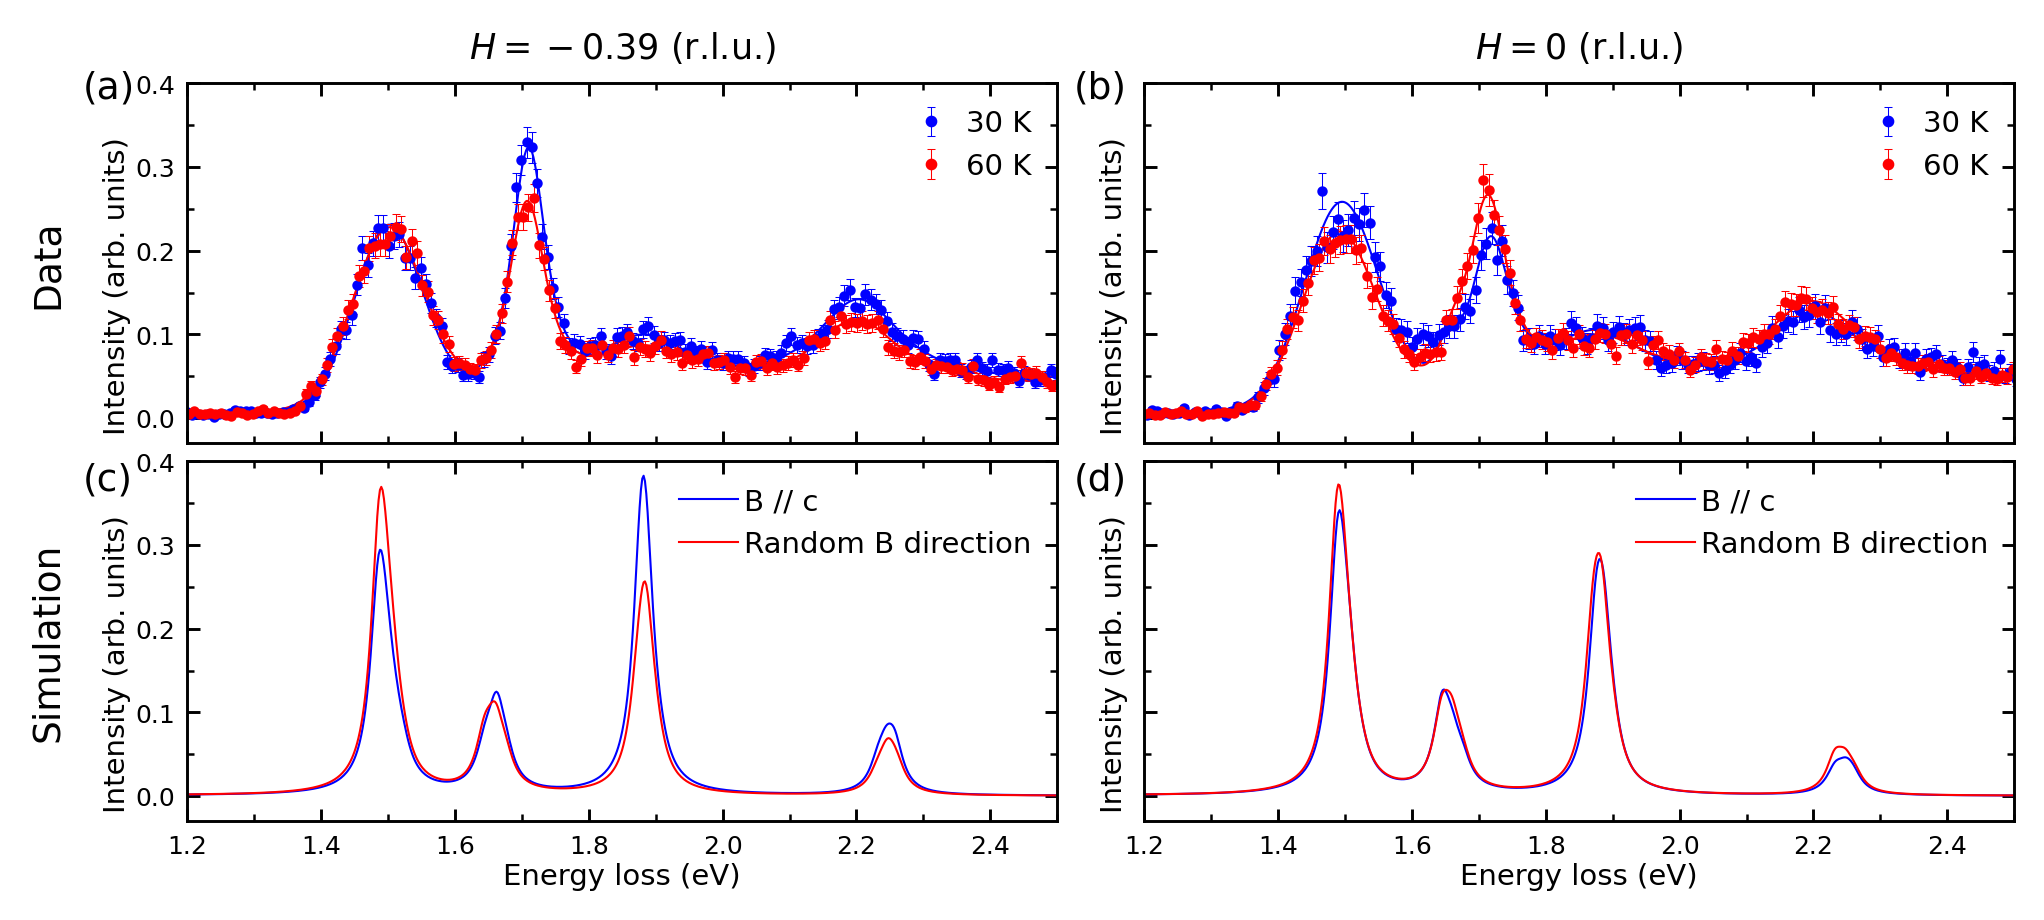

In [35]:
fig, axs = plt.subplots(2, 2, dpi=dpi, figsize=(7, 3), 
                        gridspec_kw=dict(wspace=0.1, hspace=0.05, left=0.08, right=0.95, bottom=0.1, top=0.92)
                       )

markersize = 1.5

Ts = [30, 60]
colors = ['b', 'r']
alpha = 1
for i, T in enumerate(Ts):
    x = spectra_Tdep1_data['E0']['spectra_T_{:.0f}K_2pt_per_pixel'.format(T)]['eloss'][:]
    y = spectra_Tdep1_data['E0']['spectra_T_{:.0f}K_2pt_per_pixel'.format(T)]['intensity'][:]
    yerr = spectra_Tdep1_data['E0']['spectra_T_{:.0f}K_2pt_per_pixel'.format(T)]['error'][:]
        
    axs[0,0].errorbar(x/1e3, y, yerr=yerr,marker='o', color=colors[i], ls='',markersize=markersize,
                      elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha, label='{:.0f} K'.format(T))
      
    # plot the fit results
    x = spectra_Tdep1_fits['E0']['fits_T{:.0f}'.format(T)]['exciton']['x'][:]
    y = spectra_Tdep1_fits['E0']['fits_T{:.0f}'.format(T)]['exciton']['y'][:]
    axs[0,0].plot(x/1e3, y, '-', color=colors[i])
    
for i, T in enumerate(Ts):
    x = spectra_Tdep2_data['E0']['spectra_T_{:.0f}K_2pt_per_pixel'.format(T)]['eloss'][:]
    y = spectra_Tdep2_data['E0']['spectra_T_{:.0f}K_2pt_per_pixel'.format(T)]['intensity'][:]
    yerr = spectra_Tdep2_data['E0']['spectra_T_{:.0f}K_2pt_per_pixel'.format(T)]['error'][:]
        
    axs[0,1].errorbar(x/1e3, y, yerr=yerr,marker='o', color=colors[i], ls='',markersize=markersize,
                      elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha, label='{:.0f} K'.format(T))
      
    # plot the fit results
    x = spectra_Tdep2_fits['E0']['fits_T{:.0f}'.format(T)]['exciton']['x'][:]
    y = spectra_Tdep2_fits['E0']['fits_T{:.0f}'.format(T)]['exciton']['y'][:]
    axs[0,1].plot(x/1e3, y, '-', color=colors[i])
    
x = AIM_spin_dir_dep1['eloss'][:]
y = AIM_spin_dir_dep1['intensity'][:]
axs[1,0].plot(x, y[2,:]*scale_RIXS*2.5, '-', color=colors[0], label='B // c')
axs[1,0].plot(x, np.mean(y,axis=0)*scale_RIXS*2.5, '-', color=colors[1], label='Random B direction')

x = AIM_spin_dir_dep2['eloss'][:]
y = AIM_spin_dir_dep2['intensity'][:]
axs[1,1].plot(x, y[2,:]*scale_RIXS*2.5, '-', color=colors[0], label='B // c')
axs[1,1].plot(x, np.mean(y,axis=0)*scale_RIXS*2.5, '-', color=colors[1], label='Random B direction')
    
    
# axis range and ticks
for ax in axs.flatten():
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    
for ax in axs.flatten():
    ax.set_xlim(1.2, 2.5)
    ax.set_ylim(-0.03, 0.4)
     
for ax in axs[:,1]:
    ax.set_yticklabels([])
    
for ax in axs[0,:]:
    ax.set_xticklabels([])

# legend
for ax in axs.flatten():
    ax.legend(loc='best')

# axis label
for ax in axs[1,:]:
    ax.set_xlabel('Energy loss (eV)')
for ax in axs.flatten():
    ax.set_ylabel('Intensity (arb. units)', y=0.44)


# title
axs[0,0].set_title('$H=-0.39$ (r.l.u.)',)
axs[0,1].set_title('$H=0$ (r.l.u.)',)

x = -0.16
y = 0.5
axs[0,0].text(x=x, y=y, s='Data', transform=axs[0,0].transAxes, fontsize=9, ha='center', va='center', rotation='vertical')
axs[1,0].text(x=x, y=y, s='Simulation', transform=axs[1,0].transAxes, fontsize=9, ha='center', va='center', rotation='vertical')


# label
x = -0.12
y = 0.96
axs[0,0].text(x=x, y=y, s='(a)', fontdict=dict(fontsize=9), transform=axs[0,0].transAxes, color='k')
x = -0.05
axs[0,1].text(x=x, y=y, s='(b)', fontdict=dict(fontsize=9), transform=axs[0,1].transAxes, color='k', ha='center')
x = -0.12
y = 0.92
axs[1,0].text(x=x, y=y, s='(c)', fontdict=dict(fontsize=9), transform=axs[1,0].transAxes, color='k')
x = -0.05
axs[1,1].text(x=x, y=y, s='(d)', fontdict=dict(fontsize=9), transform=axs[1,1].transAxes, color='k', ha='center')


# fig.savefig('SI_ED_spin_direction_dep.pdf', dpi=dpi)